In [3]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd

BIGDATA=pd.read_excel('Pepechum.xlsx',sheet_name='BIGDATA',index_col='Nombre')
GLOBAL=pd.read_excel('Pupeta.xlsx',sheet_name='GLOBAL',index_col='Unnamed: 0').T
Tiempo1=pd.read_excel('Pupeta.xlsx',sheet_name='1TIEMPO',index_col='Unnamed: 0').T
Tiempo2=pd.read_excel('Pupeta.xlsx',sheet_name='2TIEMPO',index_col='Unnamed: 0').T
GLOBAL = GLOBAL[GLOBAL['Regates'].notna()]
Vacios = GLOBAL[ GLOBAL['Posesión de balón'] == ' ' ].index
GLOBAL.drop(Vacios , inplace=True)
Tiempo1 = Tiempo1[Tiempo1['Regates'].notna()]
Vacios = Tiempo1[ Tiempo1['Posesión de balón'] == ' ' ].index
Tiempo1.drop(Vacios , inplace=True)
Tiempo2 = Tiempo2[Tiempo2['Regates'].notna()]
Vacios = Tiempo2[ Tiempo2['Posesión de balón'] == ' ' ].index
Tiempo2.drop(Vacios , inplace=True)
#### Agregado de Rival-Resultado-Condicion a BIGDATA
Fixture=pd.read_excel('Pumpet.xlsx')
ContadorFixture=0
inicio=0
BIGDATA['Resultado']=""
BIGDATA['Rival']=''
BIGDATA['Condicion']=''
BIGDATA['Local']=''
BIGDATA['Visitante']=''
BIGDATA['Partido']=''
for i in range(0,len(BIGDATA.index)):
    if BIGDATA['Equipo'].iloc[i]==Fixture['Local'][ContadorFixture]:
        BIGDATA['Rival'][i]=Fixture['Visitante'][ContadorFixture]
        BIGDATA['Condicion'][i]='Home'
        BIGDATA['Local'][i]=Fixture['L'][ContadorFixture]
        BIGDATA['Visitante'][i]=Fixture['V'][ContadorFixture]
        BIGDATA['Partido'][i]=BIGDATA['Equipo'][i]+'-'+BIGDATA['Rival'][i]
    elif BIGDATA['Equipo'].iloc[i]==Fixture['Visitante'][ContadorFixture]:
        BIGDATA['Rival'][i]=Fixture['Local'][ContadorFixture]
        BIGDATA['Condicion'][i]='Away'
        BIGDATA['Local'][i]=Fixture['L'][ContadorFixture]
        BIGDATA['Visitante'][i]=Fixture['V'][ContadorFixture]
        BIGDATA['Partido'][i]=BIGDATA['Rival'][i]+'-'+BIGDATA['Equipo'][i]
    else:
        for a in range(inicio,i):
            BIGDATA['Resultado'][a]=Fixture['Resultado'][ContadorFixture]      
        inicio=i
        ContadorFixture=ContadorFixture+1
        if BIGDATA['Equipo'].iloc[i]==Fixture['Local'][ContadorFixture]:
            BIGDATA['Rival'][i]=Fixture['Visitante'][ContadorFixture]
            BIGDATA['Condicion'][i]='Home'
            BIGDATA['Local'][i]=Fixture['L'][ContadorFixture]
            BIGDATA['Visitante'][i]=Fixture['V'][ContadorFixture]
            BIGDATA['Partido'][i]=BIGDATA['Equipo'][i]+'-'+BIGDATA['Rival'][i]   
        else:
            BIGDATA['Rival'][i]=Fixture['Local'][ContadorFixture]
            BIGDATA['Condicion'][i]='Away'
            BIGDATA['Local'][i]=Fixture['L'][ContadorFixture]
            BIGDATA['Visitante'][i]=Fixture['V'][ContadorFixture]
            BIGDATA['Partido'][i]=BIGDATA['Rival'][i]+'-'+BIGDATA['Equipo'][i]
for a in range(inicio,i+1):
    BIGDATA['Resultado'][a]=BIGDATA['Resultado'][a]=Fixture['Resultado'][ContadorFixture]   
####
BIGDATA.insert(loc = 4, column = 'Goles y Asistencias', value = BIGDATA['Goles']+BIGDATA['Asistencias'])
### Numerizando GLOBAL
GLOBAL['Posesión de balón']=GLOBAL['Posesión de balón'].astype('float64')*100
GLOBAL[['Tiros totales', 'Tiros a puerta', 'Tiros fuera','Disparos bloqueados', 'Saques de esquina', 'Fueras de juego',
        'Faltas','Tarjetas amarillas', 'Tarjetas rojas', 'Ocasiones claras','Ocasiones claras falladas', 'Disparos al Palo',
        'Contraataques','Tiros en contraataque', 'Goles en contraataque','Tiros dentro del área',
        'Tiros desde fuera del área', 'Paradas','Pases', 'Pases totales', 'Porc. Pases efectivos','Pases largos efectivos',
        'Pases largos totales','Porc. Pases largos efectivos', 'Centros completados','Centros intentados',
        'Porc. Centros completados','Regates completados', 'Regates intentados', 'Porc. Regates efectivos','Posesión perdida',
        'Duelos ganados', 'Balones aéreos ganados','Entradas', 'Intercepciones', 'Despejes']]=GLOBAL[['Tiros totales', 'Tiros a puerta', 'Tiros fuera',
       'Disparos bloqueados', 'Saques de esquina', 'Fueras de juego', 'Faltas','Tarjetas amarillas', 'Tarjetas rojas','Ocasiones claras',
       'Ocasiones claras falladas', 'Disparos al Palo', 'Contraataques','Tiros en contraataque', 'Goles en contraataque',
       'Tiros dentro del área', 'Tiros desde fuera del área', 'Paradas','Pases', 'Pases totales', 'Porc. Pases efectivos',
       'Pases largos efectivos', 'Pases largos totales','Porc. Pases largos efectivos', 'Centros completados',
       'Centros intentados', 'Porc. Centros completados','Regates completados', 'Regates intentados', 'Porc. Regates efectivos',
       'Posesión perdida', 'Duelos ganados', 'Balones aéreos ganados','Entradas', 'Intercepciones', 'Despejes']].astype('int64')
####
pd.options.display.max_columns = None

In [4]:
GLOBAL=GLOBAL.loc[GLOBAL['Posesión de balón']>0]
GLOBAL.rename(columns={'Pases totales':'Pases acertados','Disparos al Palo':'Disparos al palo','Pases':'Pases totales'},inplace=True)
GLOBAL=GLOBAL.drop(['Centros', 'Regates','Pases acierte','Pases largos'], axis=1)
GLOBAL['Porc. Tiros a puerta']=GLOBAL['Tiros a puerta']/GLOBAL['Tiros totales']
GLOBAL['Pases por cada perdida']=GLOBAL['Pases totales']/GLOBAL['Posesión perdida']
GLOBAL['Porc. Tiros dentro del área']=GLOBAL['Tiros dentro del área']/GLOBAL['Tiros totales']
GLOBAL['Porc. Tiros fuera del área']=GLOBAL['Tiros desde fuera del área']/GLOBAL['Tiros totales']
Rival=['Posesión de balón Rival', 'Tiros totales Rival', 'Tiros a puerta Rival', 'Tiros fuera Rival',
       'Disparos bloqueados Rival', 'Saques de esquina Rival', 'Fueras de juego Rival', 'Faltas Rival',
       'Tarjetas amarillas Rival', 'Tarjetas rojas Rival', 'Ocasiones claras Rival',
       'Ocasiones claras falladas Rival', 'Disparos al palo Rival', 'Contraataques Rival',
       'Tiros en contraataque Rival', 'Goles en contraataque Rival',
       'Tiros dentro del área Rival', 'Tiros desde fuera del área Rival', 'Paradas Rival',
       'Pases totales Rival', 'Pases acertados Rival', 'Porc. Pases efectivos Rival',
       'Pases largos efectivos Rival', 'Pases largos totales Rival',
       'Porc. Pases largos efectivos Rival', 'Centros completados Rival',
       'Centros intentados Rival', 'Porc. Centros completados Rival',
       'Regates completados Rival', 'Regates intentados Rival', 'Porc. Regates efectivos Rival',
       'Posesión perdida Rival', 'Duelos ganados Rival', 'Balones aéreos ganados Rival',
       'Entradas Rival', 'Intercepciones Rival', 'Despejes Rival', 'Rival',
       'Porc. Tiros a puerta Rival','Pases por cada perdida Rival',
       'Porc. Tiros dentro del área Rival','Porc. Tiros fuera del área Rival']
Lista=['Posesión de balón', 'Tiros totales', 'Tiros a puerta', 'Tiros fuera',
       'Disparos bloqueados', 'Saques de esquina', 'Fueras de juego', 'Faltas',
       'Tarjetas amarillas', 'Tarjetas rojas', 'Ocasiones claras',
       'Ocasiones claras falladas', 'Disparos al palo', 'Contraataques',
       'Tiros en contraataque', 'Goles en contraataque',
       'Tiros dentro del área', 'Tiros desde fuera del área', 'Paradas',
       'Pases totales', 'Pases acertados', 'Porc. Pases efectivos',
       'Pases largos efectivos', 'Pases largos totales',
       'Porc. Pases largos efectivos', 'Centros completados',
       'Centros intentados', 'Porc. Centros completados',
       'Regates completados', 'Regates intentados', 'Porc. Regates efectivos',
       'Posesión perdida', 'Duelos ganados', 'Balones aéreos ganados',
       'Entradas', 'Intercepciones', 'Despejes', 'equipo',
       'Porc. Tiros a puerta','Pases por cada perdida','Porc. Tiros dentro del área','Porc. Tiros fuera del área']
GLOBAL[Rival]=0
for a,b in zip(Lista,Rival):  
    for i in range(1,int(len(GLOBAL)/2)+1):
        GLOBAL[b][i*2-1]=GLOBAL[a][i*2]
        GLOBAL[b][i*2]=GLOBAL[a][i*2-1]
GLOBAL['Goles Rival']=GLOBAL['Tiros a puerta Rival']-GLOBAL['Paradas']
GLOBAL['Goles']=GLOBAL['Tiros a puerta']-GLOBAL['Paradas Rival']
GLOBAL['Goles x Tiros totales']=GLOBAL['Goles']/GLOBAL['Tiros totales']
GLOBAL['Goles x Tiros a puerta']=GLOBAL['Goles']/GLOBAL['Tiros a puerta']
GLOBAL['Goles x Tiros totales Rival']=GLOBAL['Goles Rival']/GLOBAL['Tiros totales Rival']
GLOBAL['Goles x Tiros a puerta Rival']=GLOBAL['Goles Rival']/GLOBAL['Tiros a puerta Rival']

#'Posesión de balón',
#'Porc. Pases efectivos','Porc. Pases largos efectivos', 'Porc. Centros completados', 'Porc. Regates efectivos'
#'Porc. Tiros a puerta','Pases por cada perdida','Porc. Tiros dentro del área','Porc. Tiros fuera del área',
#'Goles/Tiros totales','Goles/Tiros a puerta'

#'Posesión de balón Rival',
#'Porc. Pases efectivos Rival','Porc. Pases largos efectivos Rival', 'Porc. Centros completados Rival',
#'Porc. Regates efectivos Rival','Porc. Tiros a puerta Rival','Pases por cada perdida Rival',
#'Porc. Tiros dentro del área Rival','Porc. Tiros fuera del área Rival','Goles/Tiros totales Rival',
#'Goles/Tiros a puerta Rival'

In [3]:
GLOBAL

Posesión de balón  Tiros totales  Tiros a puerta  Tiros fuera  \
1                 26.0             11               4            6   
2                 74.0              7               2            4   
3                 46.0             17               8            6   
4                 54.0             15               4            5   
5                 34.0              8               2            4   
..                 ...            ...             ...          ...   
136               54.0             10               5            3   
137               46.0             14               2            7   
138               54.0              9               3            3   
139               50.0             20               5            9   
140               50.0              7               1            5   

     Disparos bloqueados  Saques de esquina  Fueras de juego  Faltas  \
1                      1                  3                0      12   
2                      1                  6                4      10   
3                      3                  9                1      13   
4                      6                  6                1      15   
5                      2                  3                2      11   
..                   ...                ...              ...     ...   
136                    2                  6                0       9   
137                    5                  9                5      20   
138                    3                  5                3      16   
139                    6                  2                0      11   
140                    1                  7                3       9   

     Tarjetas amarillas  Tarjetas rojas  Ocasiones claras  \
1                     2               0                 3   
2                     4               0                 1   
3                     2               0                 1   
4                     4               0                 1   
5                     2               0                 0   
..                  ...             ...               ...   
136                   4               0                 3   
137                   3               0                 2   
138                   4               0                 2   
139                   2               0                 0   
140                   2               0                 0   

     Ocasiones claras falladas  Disparos al palo  Contraataques  \
1                            2                 0              0   
2                            1                 1              0   
3                            0                 0              0   
4                            1                 0              0   
5                            0                 0              0   
..                         ...               ...            ...   
136                          1                 0              0   
137                          1                 0              0   
138                          1                 1              0   
139                          0                 0              4   
140                          0                 0              0   

     Tiros en contraataque  Goles en contraataque  Tiros dentro del área  \
1                        0                      0                      9   
2                        0                      0                      5   
3                        0                      0                      8   
4                        0                      0                      6   
5                        0                      0                      6   
..                     ...                    ...                    ...   
136                      0                      0                      7   
137                      0                      0                      8   
138                      0                      0                      5   
1

In [5]:
Partidos=GLOBAL.groupby('equipo').count()['Posesión de balón'][0]
GLOBAL=GLOBAL.groupby('equipo').sum()
#'Posesión de balón',
#'Porc. Pases efectivos','Porc. Pases largos efectivos', 'Porc. Centros completados', 'Porc. Regates efectivos'
#


#'Posesión de balón Rival',
#'Porc. Pases efectivos Rival','Porc. Pases largos efectivos Rival', 'Porc. Centros completados Rival',
#'Porc. Regates efectivos Rival',
GLOBAL['Goles x Tiros totales']=GLOBAL['Goles']/GLOBAL['Tiros totales']
GLOBAL['Goles x Tiros a puerta']=GLOBAL['Goles']/GLOBAL['Tiros a puerta']
GLOBAL['Goles x Tiros totales Rival']=GLOBAL['Goles Rival']/GLOBAL['Tiros totales Rival']
GLOBAL['Goles x Tiros a puerta Rival']=GLOBAL['Goles Rival']/GLOBAL['Tiros a puerta Rival']
GLOBAL['Porc. Tiros a puerta']=GLOBAL['Tiros a puerta']/GLOBAL['Tiros totales']
GLOBAL['Pases por cada perdida']=GLOBAL['Pases totales']/GLOBAL['Posesión perdida']
GLOBAL['Porc. Tiros dentro del área']=GLOBAL['Tiros dentro del área']/GLOBAL['Tiros totales']
GLOBAL['Porc. Tiros fuera del área']=GLOBAL['Tiros desde fuera del área']/GLOBAL['Tiros totales']
GLOBAL['Porc. Tiros a puerta Rival']=GLOBAL['Tiros a puerta Rival']/GLOBAL['Tiros totales Rival']
GLOBAL['Pases por cada perdida Rival']=GLOBAL['Pases totales Rival']/GLOBAL['Posesión perdida Rival']
GLOBAL['Porc. Tiros dentro del área Rival']=GLOBAL['Tiros dentro del área Rival']/GLOBAL['Tiros totales Rival']
GLOBAL['Porc. Tiros fuera del área Rival']=GLOBAL['Tiros desde fuera del área Rival']/GLOBAL['Tiros totales Rival']
GLOBAL['Posesión de balón']=GLOBAL['Posesión de balón']/Partidos
GLOBAL['Posesión de balón Rival']=GLOBAL['Posesión de balón Rival']/Partidos
GLOBAL['Porc. Pases efectivos']=GLOBAL['Pases acertados']/GLOBAL['Pases totales']
GLOBAL['Porc. Pases largos efectivos']=GLOBAL['Pases largos efectivos']/GLOBAL['Pases largos totales']
GLOBAL['Porc. Centros completados']=GLOBAL['Centros intentados']/GLOBAL['Centros completados']
GLOBAL['Porc. Regates efectivos']=GLOBAL['Regates completados']/GLOBAL['Regates intentados']
GLOBAL['Porc. Pases efectivos Rival']=GLOBAL['Pases acertados Rival']/GLOBAL['Pases totales Rival']
GLOBAL['Porc. Pases largos efectivos Rival']=GLOBAL['Pases largos efectivos Rival']/GLOBAL['Pases largos totales Rival']
GLOBAL['Porc. Centros completados Rival']=GLOBAL['Centros intentados Rival']/GLOBAL['Centros completados Rival']
GLOBAL['Porc. Regates efectivos Rival']=GLOBAL['Regates completados Rival']/GLOBAL['Regates intentados Rival']

Index(['Posesión de balón', 'Tiros totales', 'Tiros a puerta', 'Tiros fuera',
       'Disparos bloqueados', 'Saques de esquina', 'Fueras de juego', 'Faltas',
       'Tarjetas amarillas', 'Tarjetas rojas', 'Ocasiones claras',
       'Ocasiones claras falladas', 'Disparos al palo', 'Contraataques',
       'Tiros en contraataque', 'Goles en contraataque',
       'Tiros dentro del área', 'Tiros desde fuera del área', 'Paradas',
       'Pases totales', 'Pases acertados', 'Porc. Pases efectivos',
       'Pases largos efectivos', 'Pases largos totales',
       'Porc. Pases largos efectivos', 'Centros completados',
       'Centros intentados', 'Porc. Centros completados',
       'Regates completados', 'Regates intentados', 'Porc. Regates efectivos',
       'Posesión perdida', 'Duelos ganados', 'Balones aéreos ganados',
       'Entradas', 'Intercepciones', 'Despejes', 'Porc. Tiros a puerta',
       'Pases por cada perdida', 'Porc. Tiros dentro del área',
       'Porc. Tiros fuera del área', 'Po

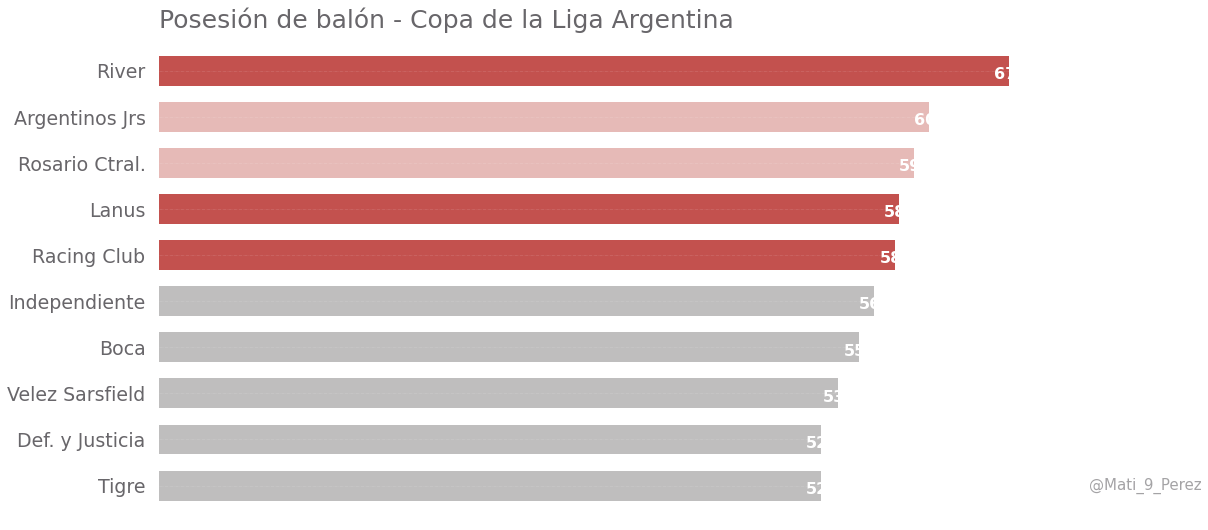

transData(0,0) = [144.  81.]


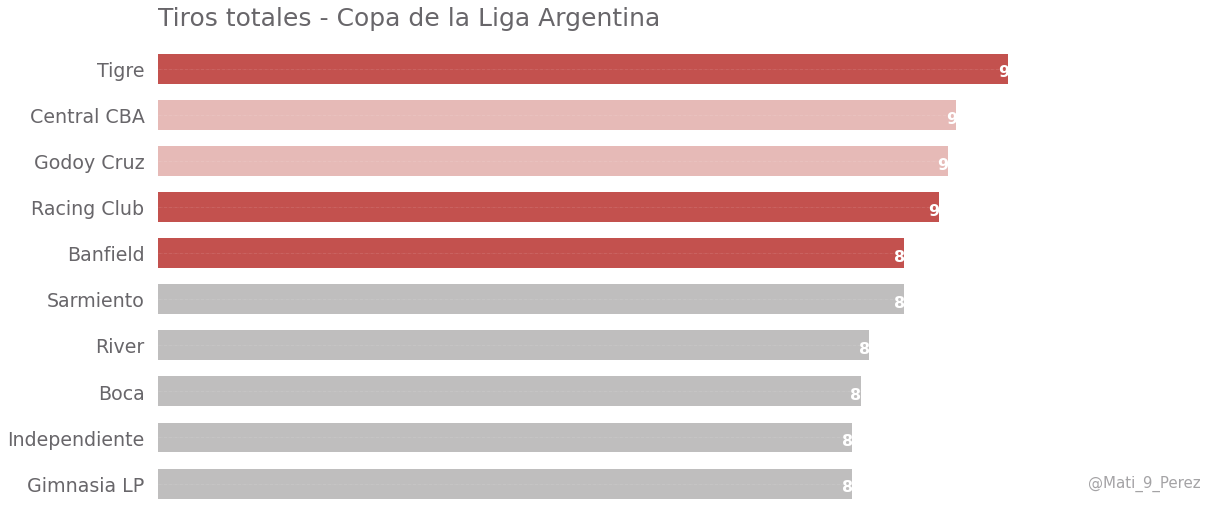

transData(0,0) = [144.  81.]


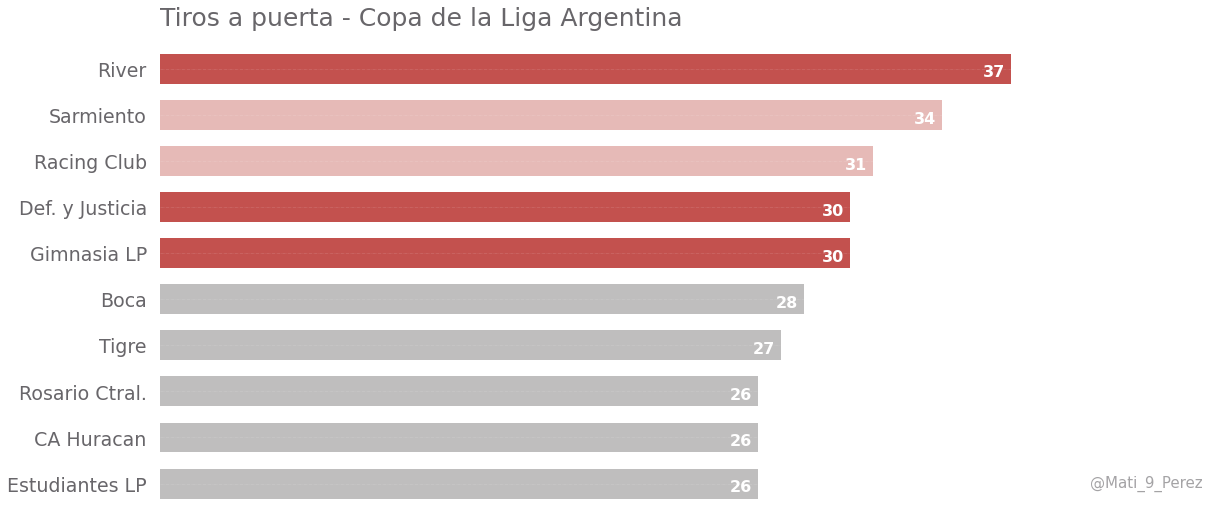

transData(0,0) = [144.  81.]


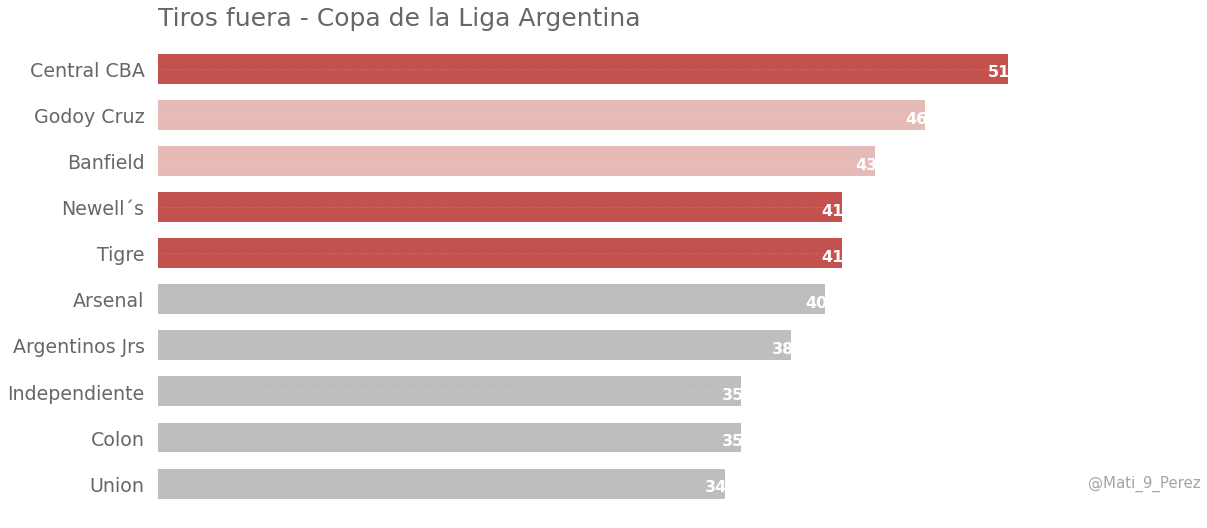

transData(0,0) = [144.  81.]


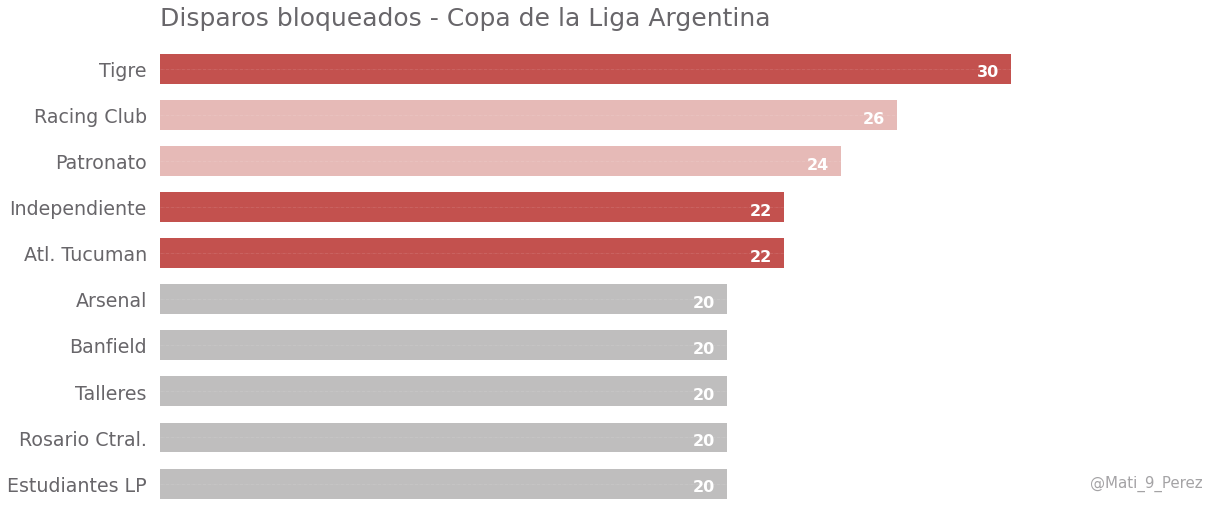

transData(0,0) = [144.  81.]


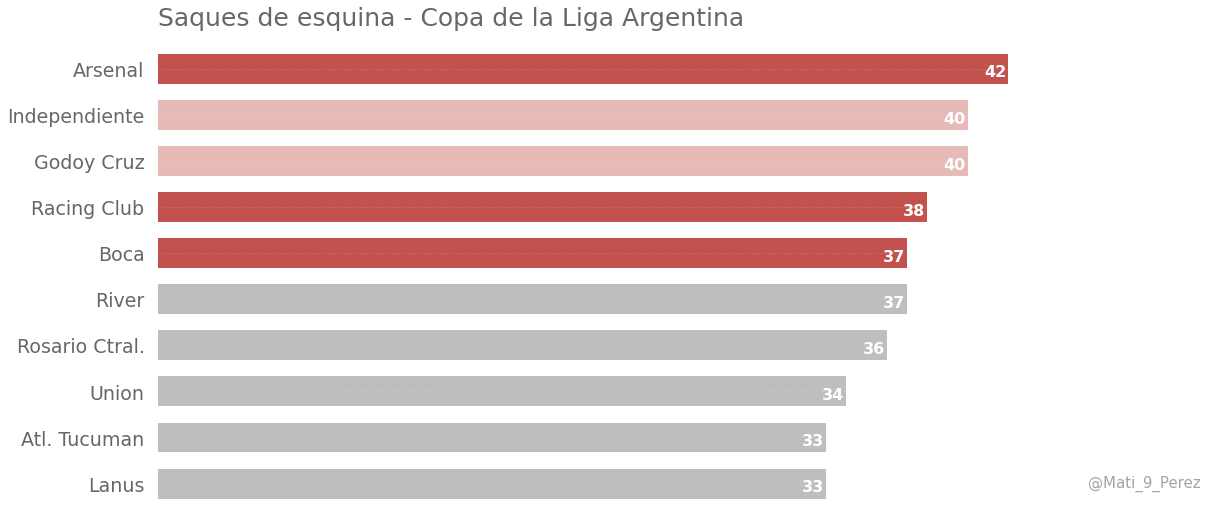

transData(0,0) = [144.  81.]


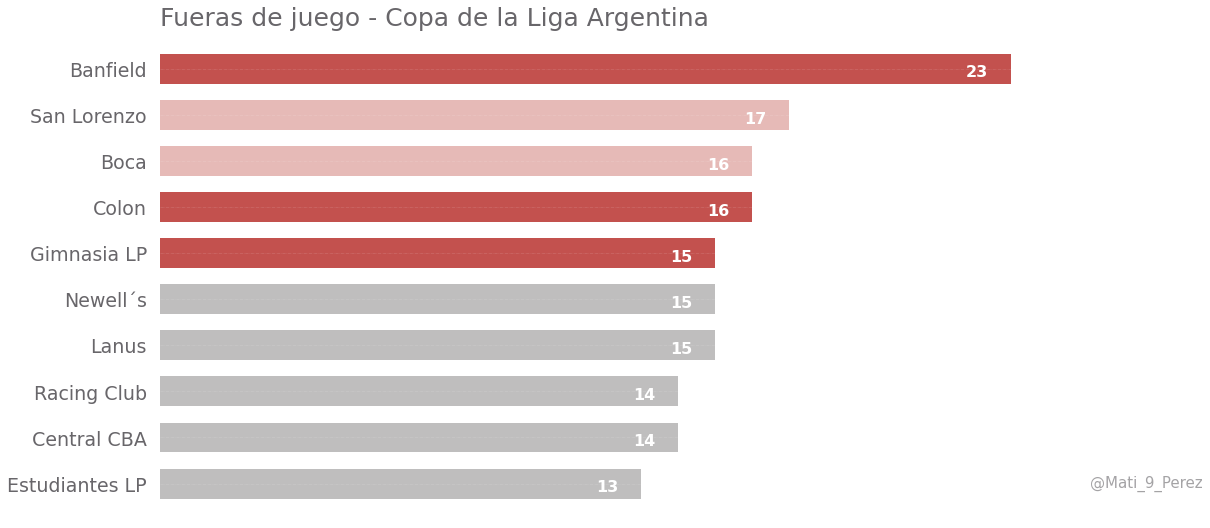

transData(0,0) = [144.  81.]


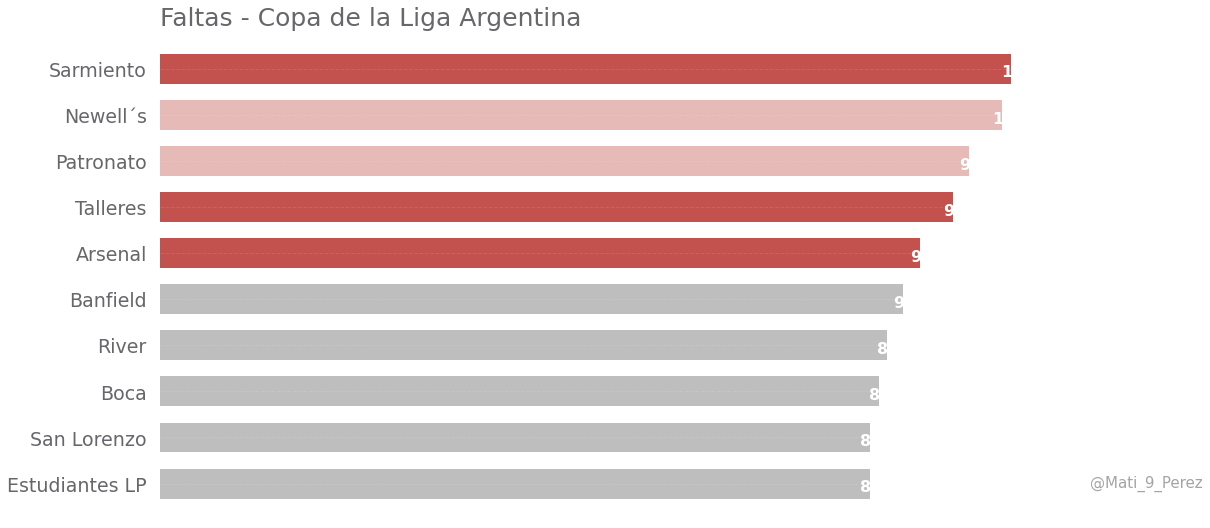

transData(0,0) = [144.  81.]


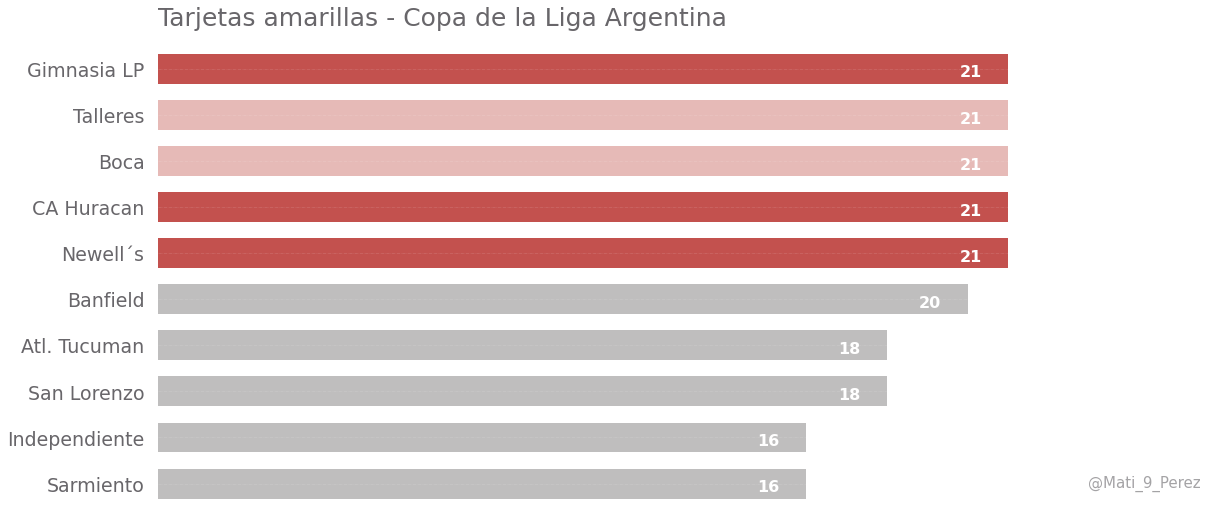

transData(0,0) = [144.  81.]


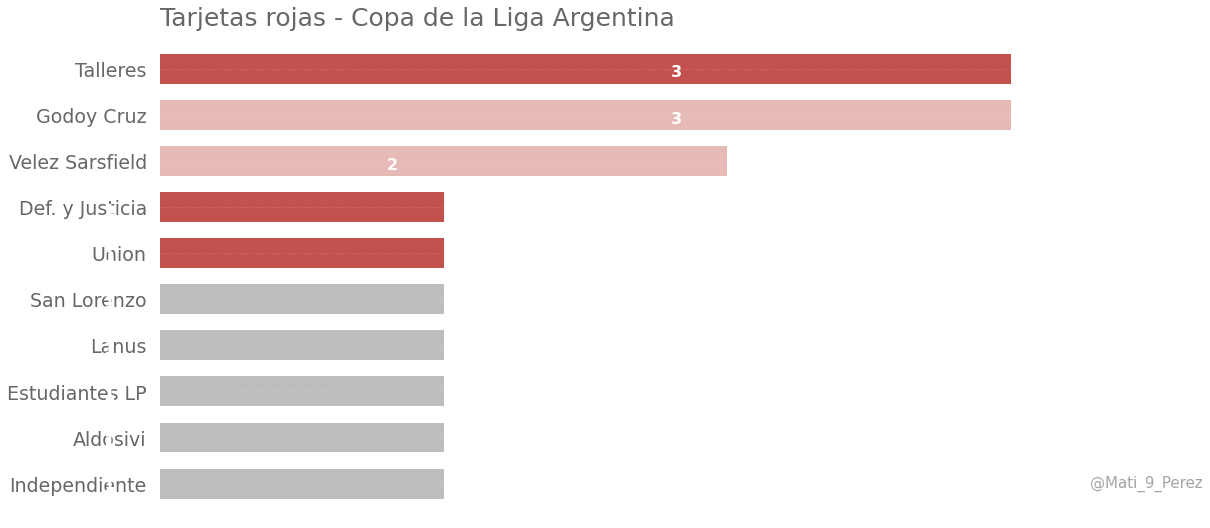

transData(0,0) = [144.  81.]


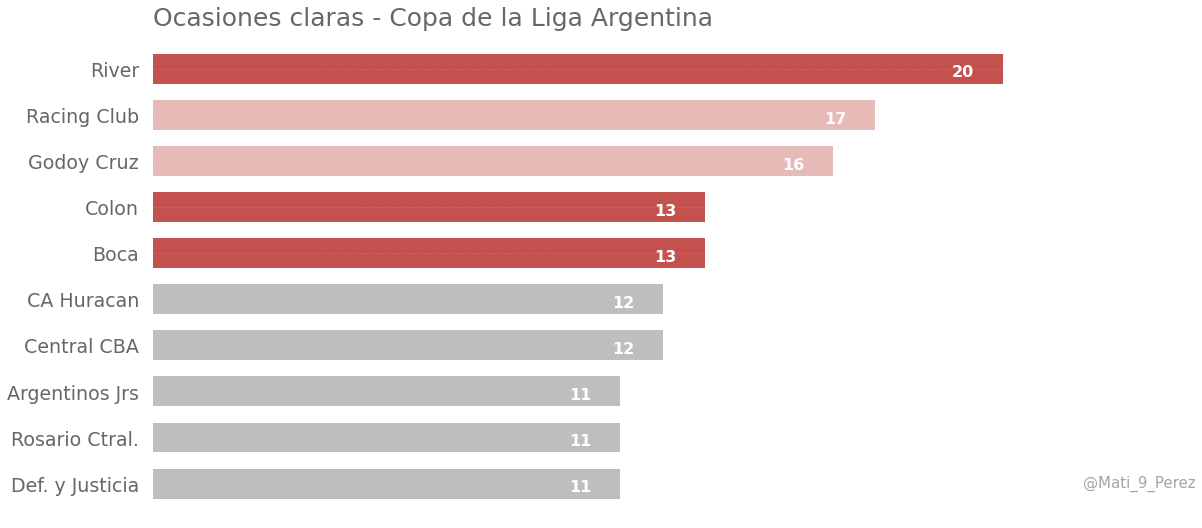

transData(0,0) = [144.  81.]


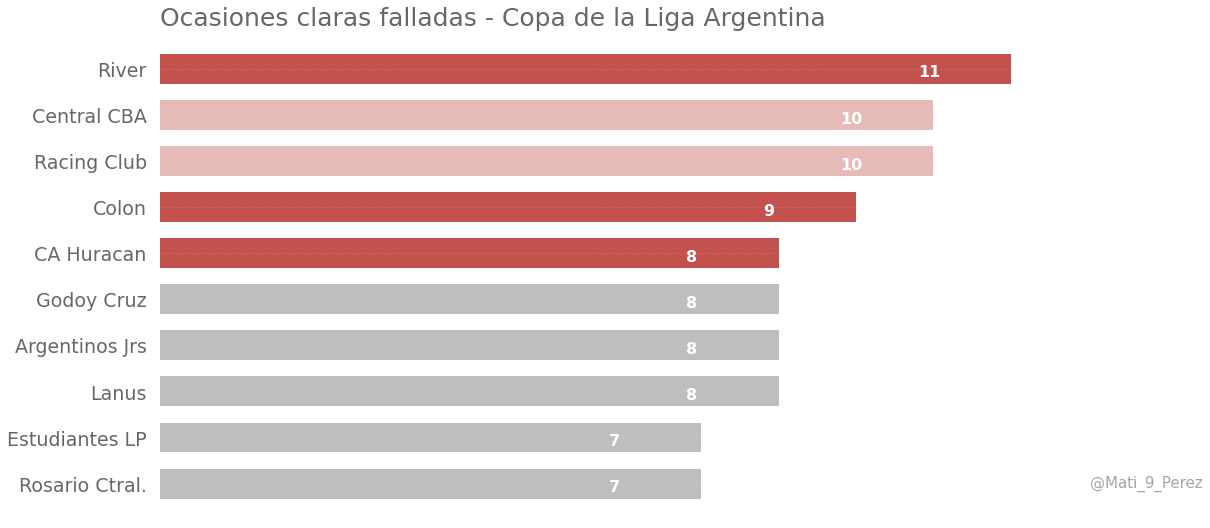

transData(0,0) = [144.  81.]


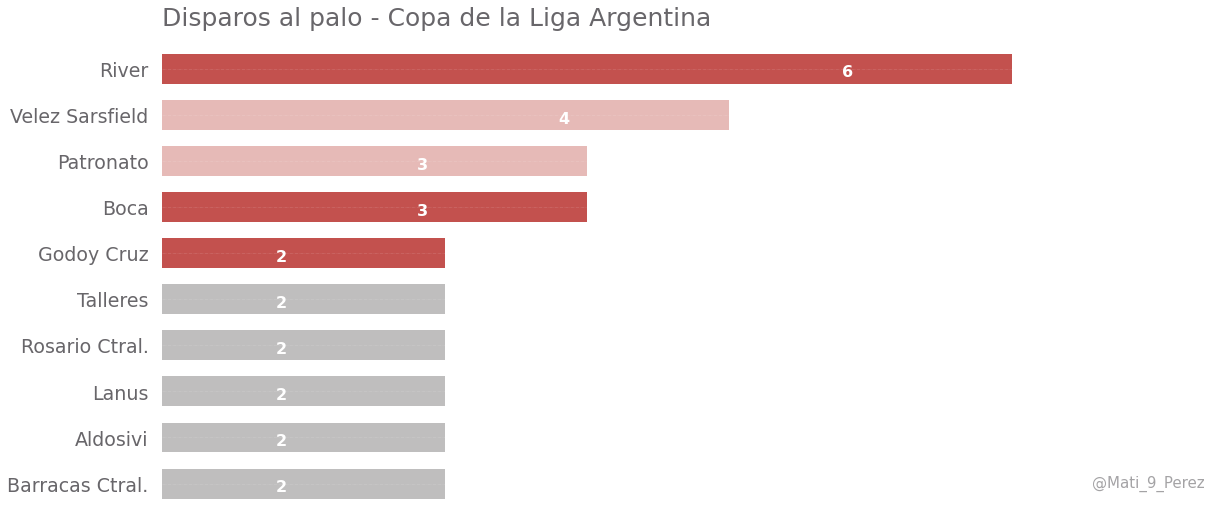

transData(0,0) = [144.  81.]


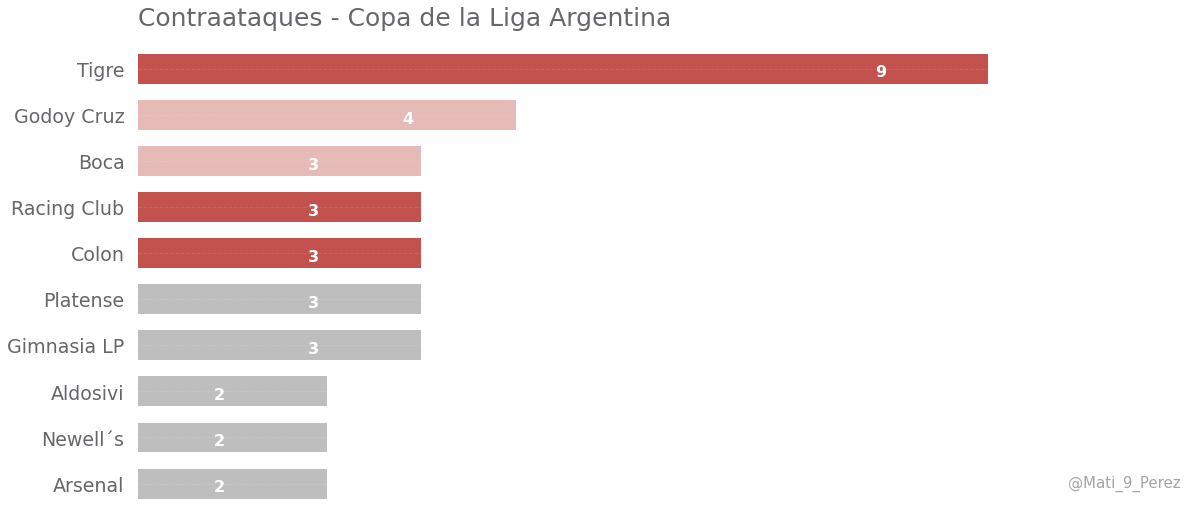

transData(0,0) = [144.  81.]


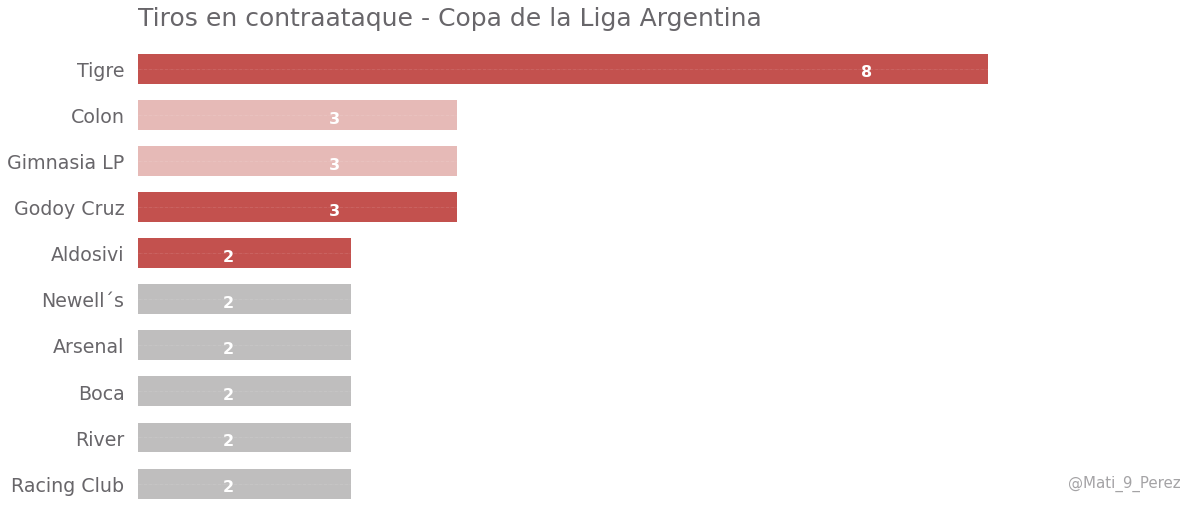

transData(0,0) = [144.  81.]


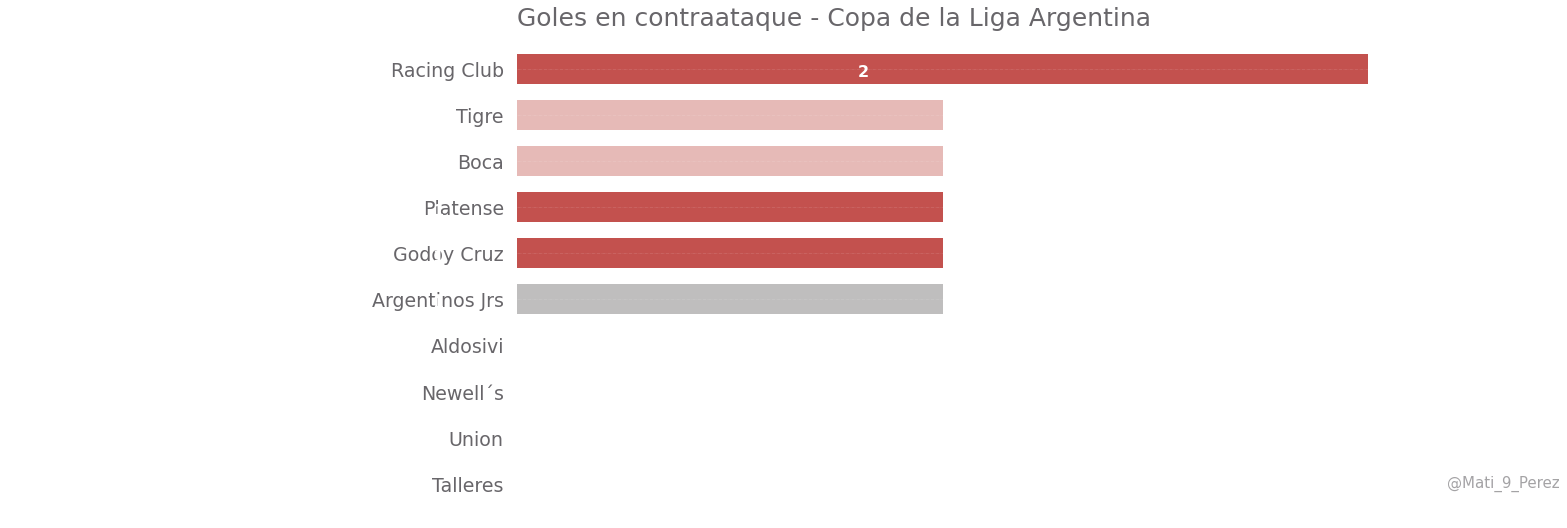

transData(0,0) = [144.  81.]


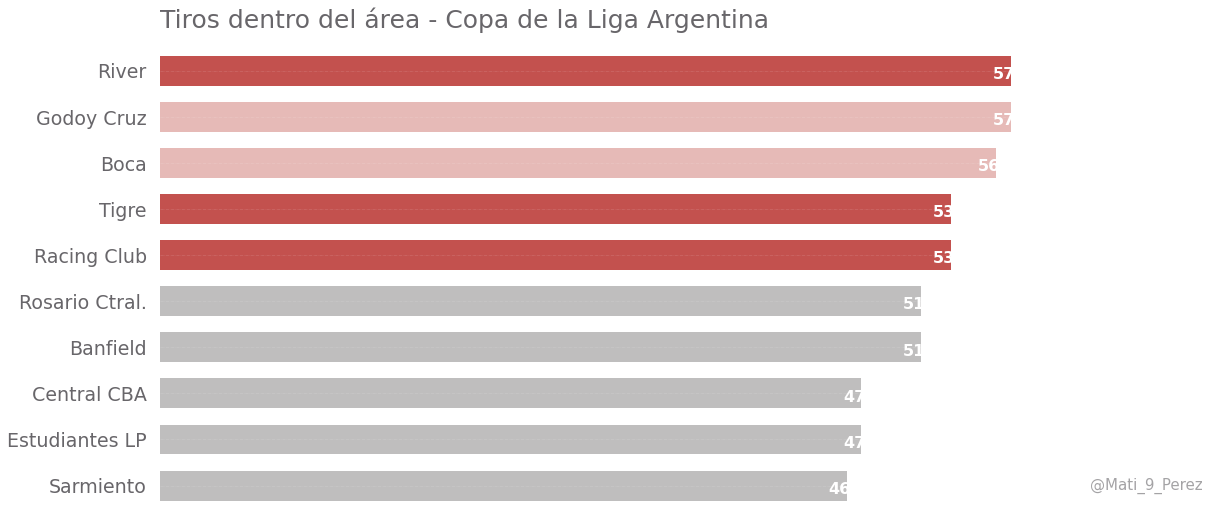

transData(0,0) = [144.  81.]


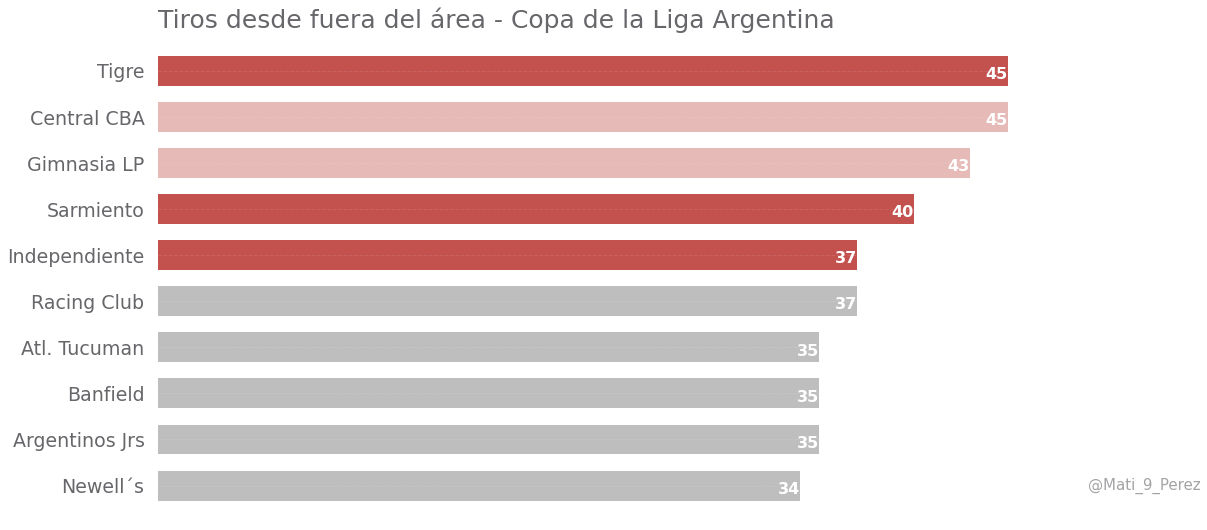

transData(0,0) = [144.  81.]


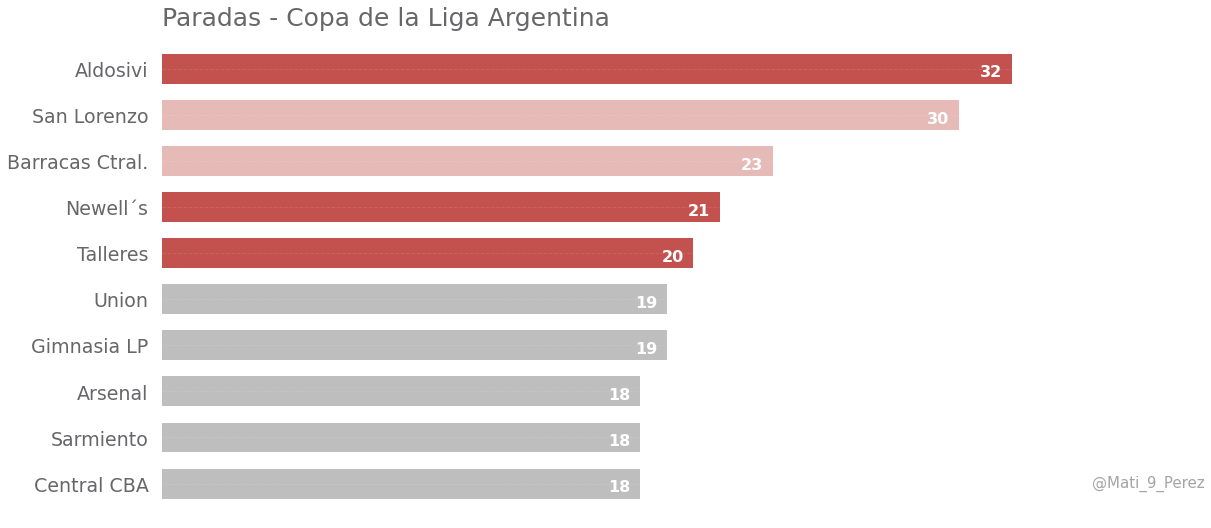

transData(0,0) = [144.  81.]


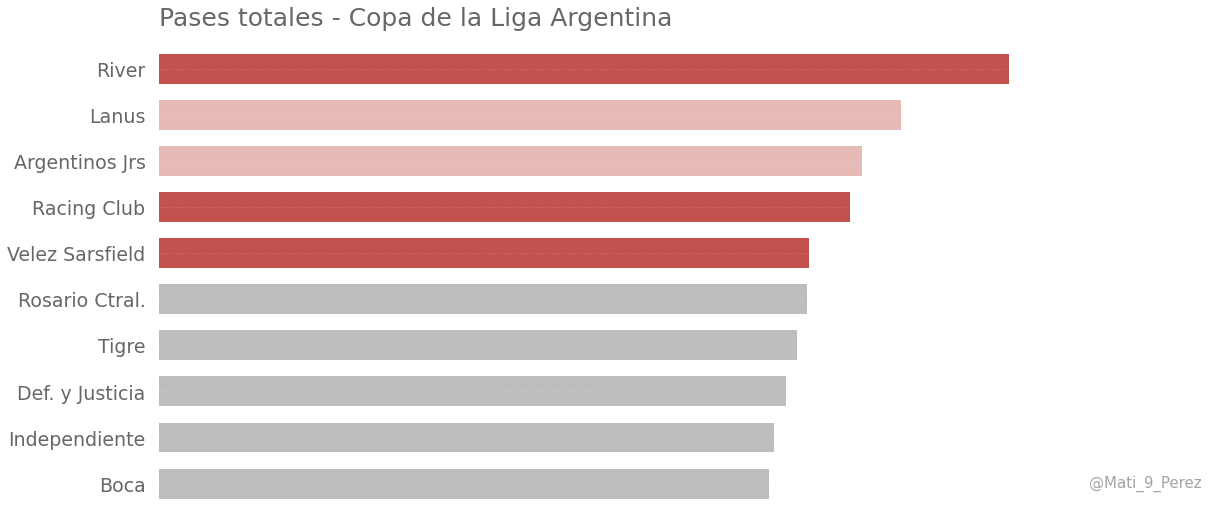

transData(0,0) = [144.  81.]


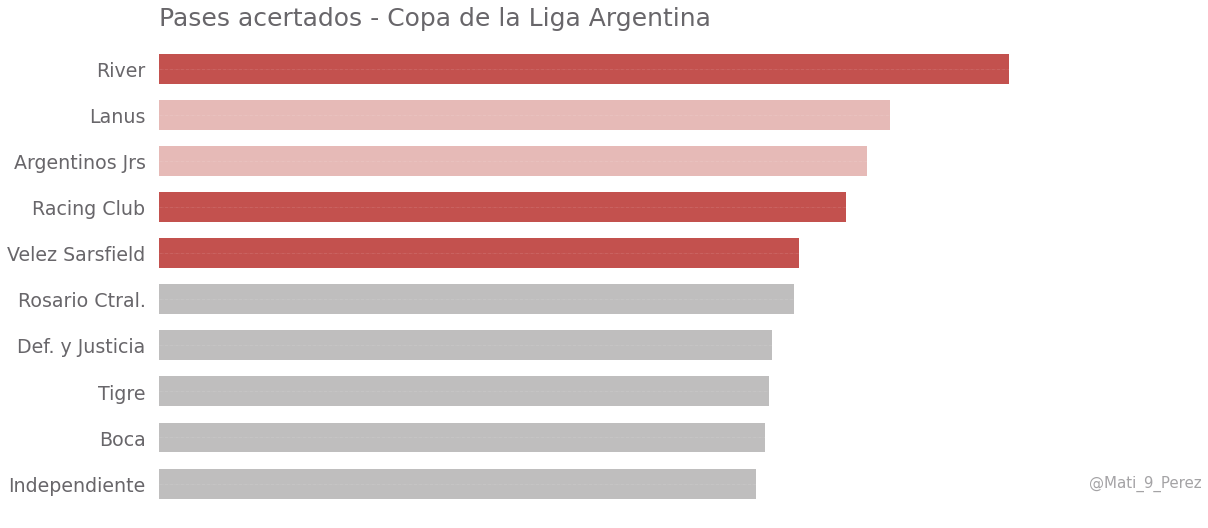

transData(0,0) = [144.  81.]


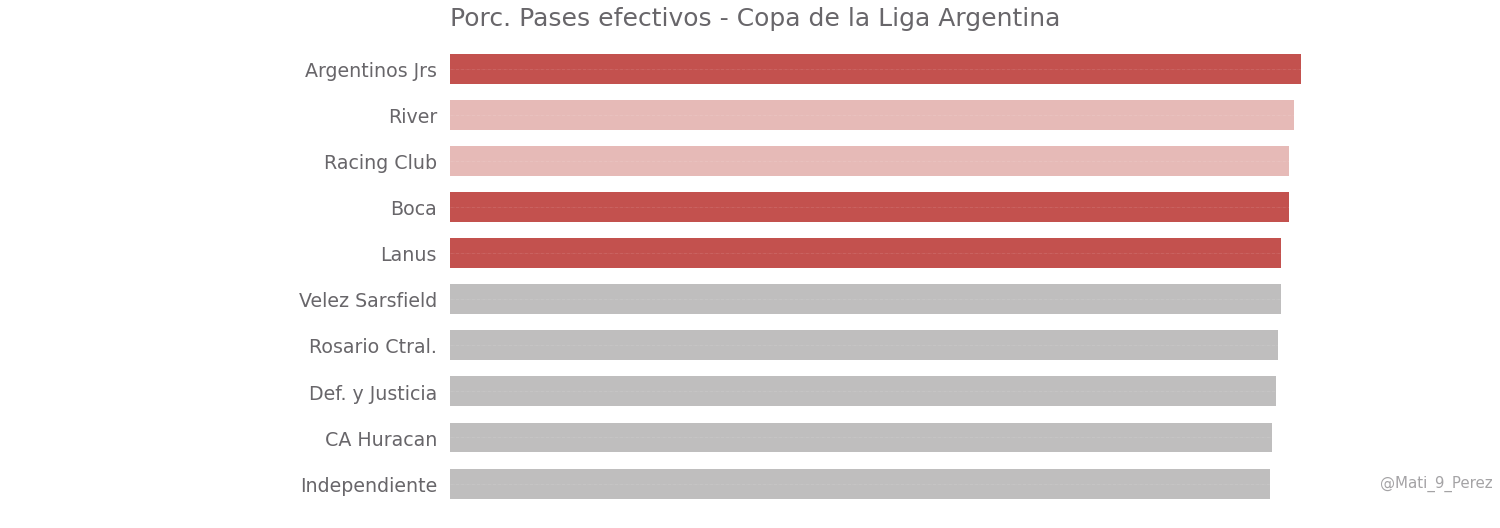

transData(0,0) = [144.  81.]


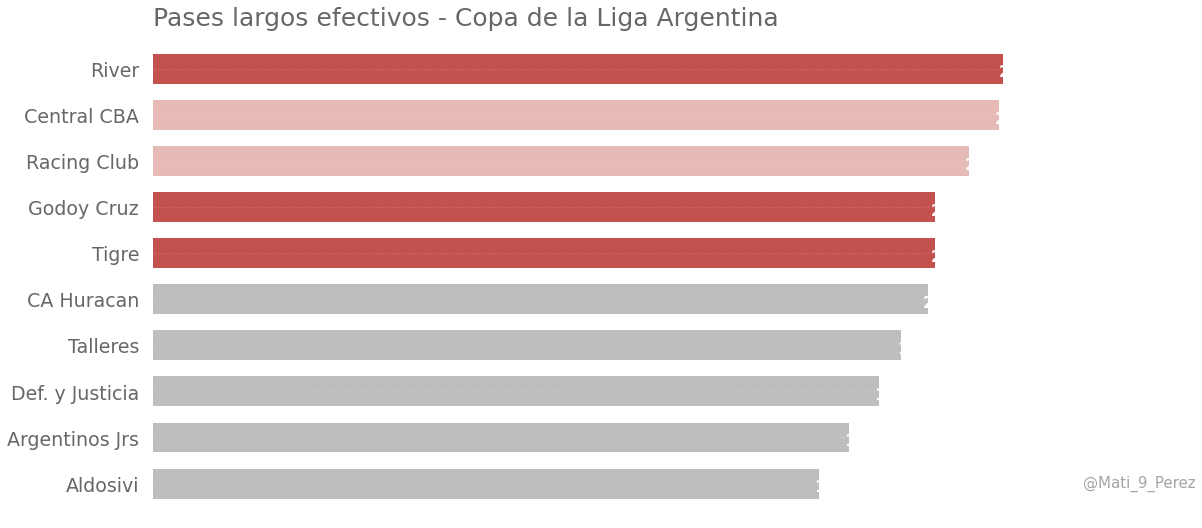

transData(0,0) = [144.  81.]


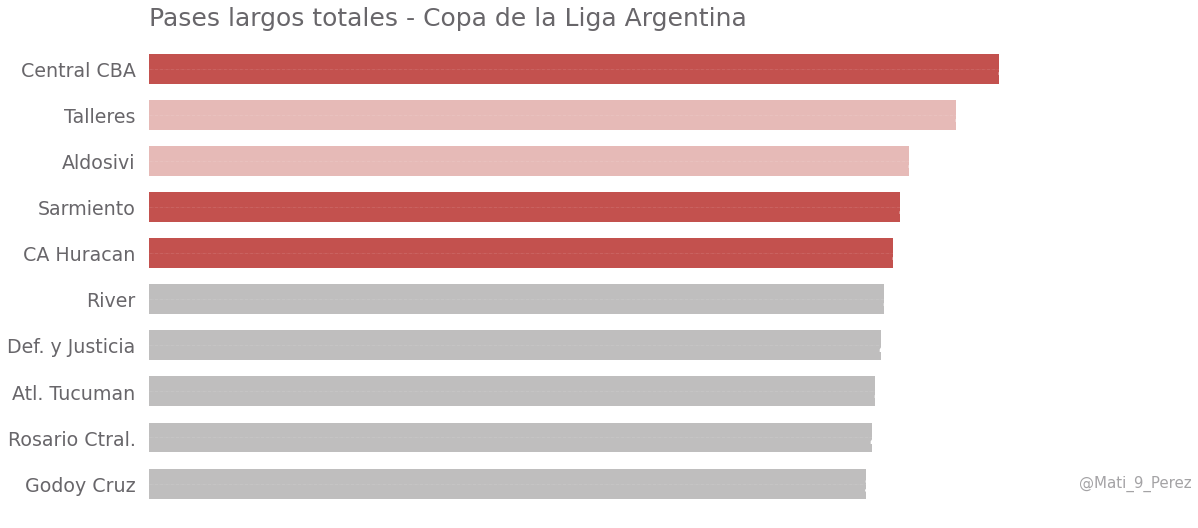

transData(0,0) = [144.  81.]


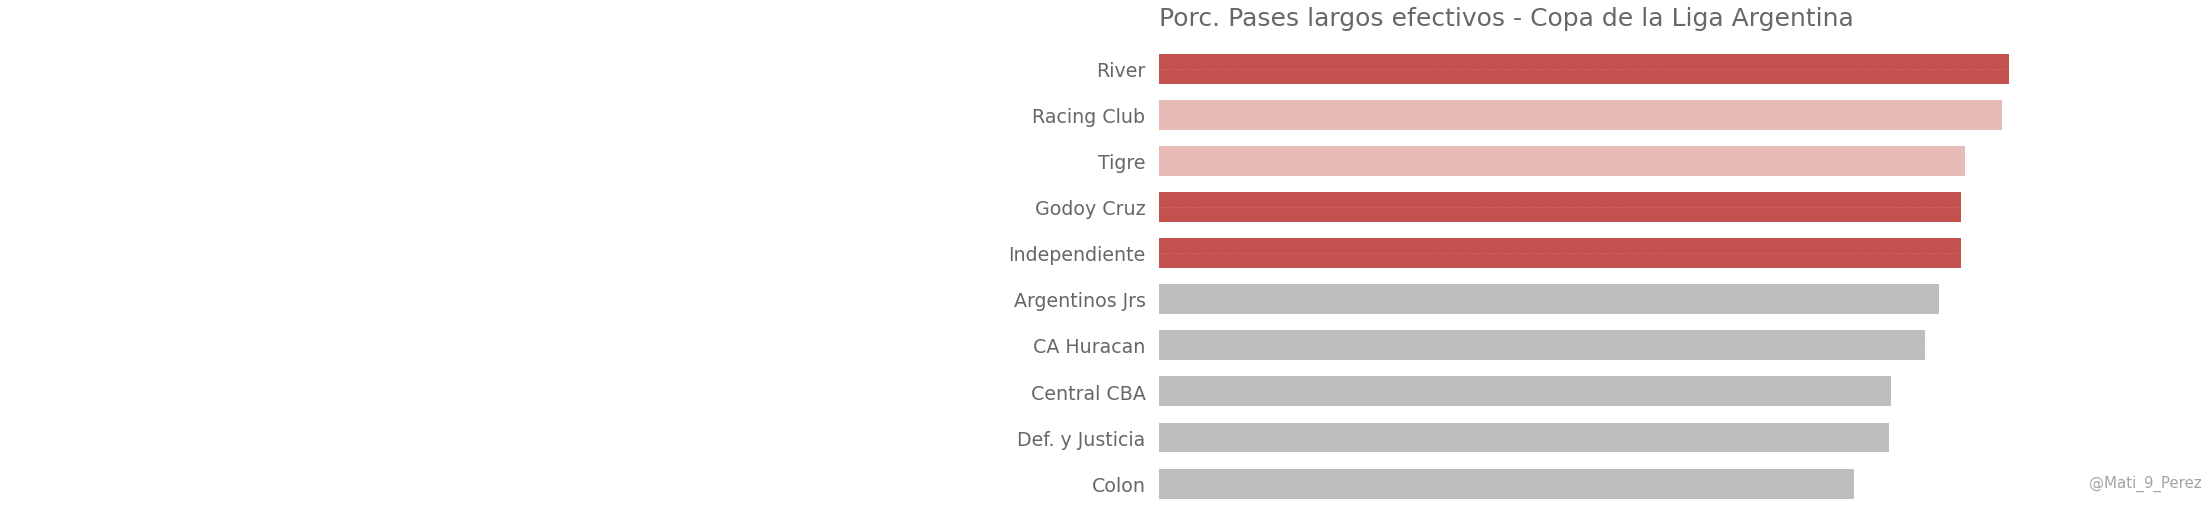

transData(0,0) = [144.  81.]


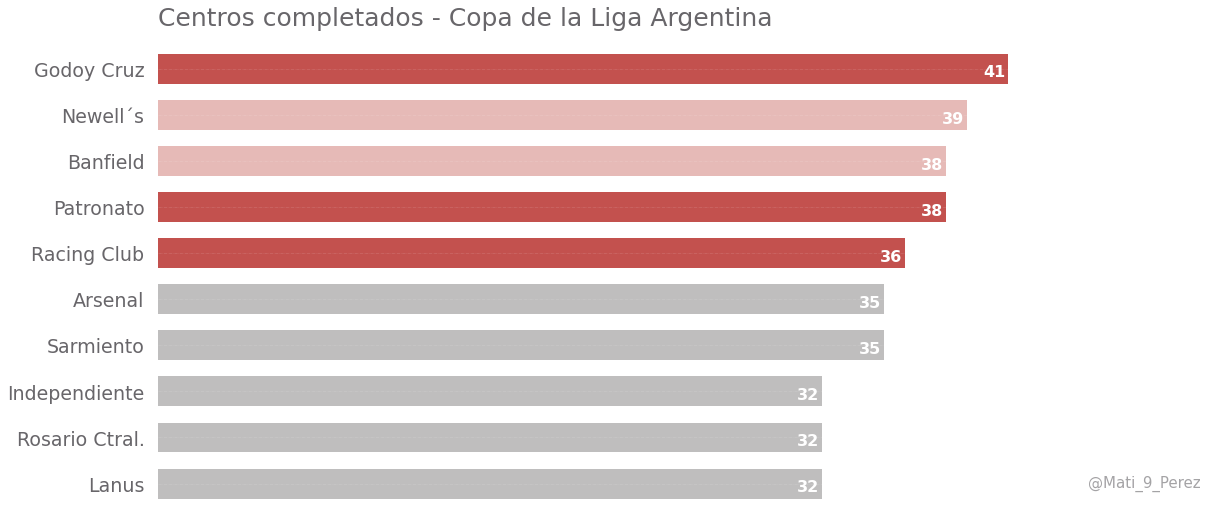

transData(0,0) = [144.  81.]


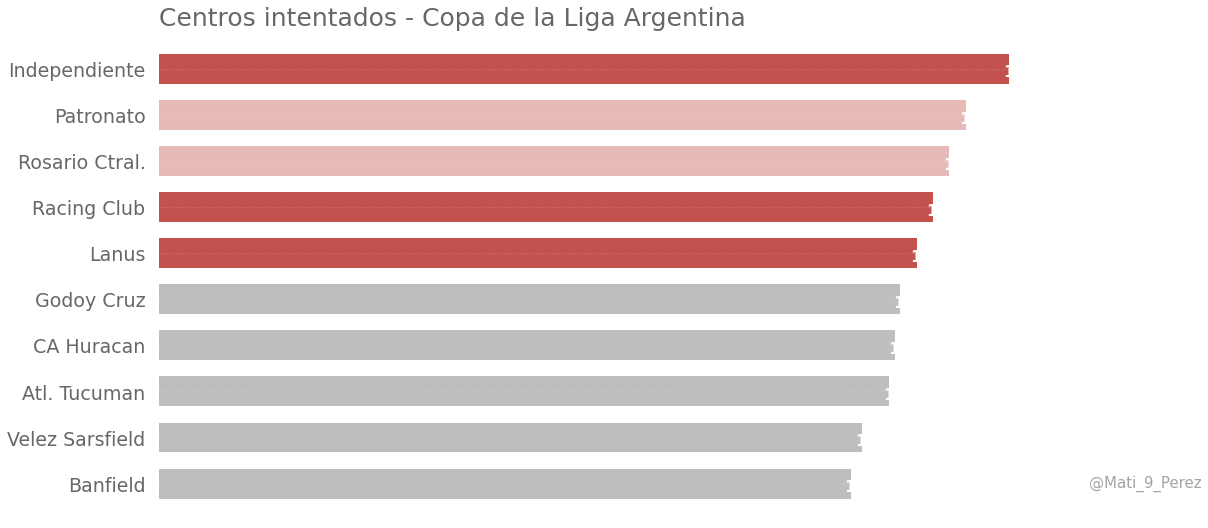

transData(0,0) = [144.  81.]


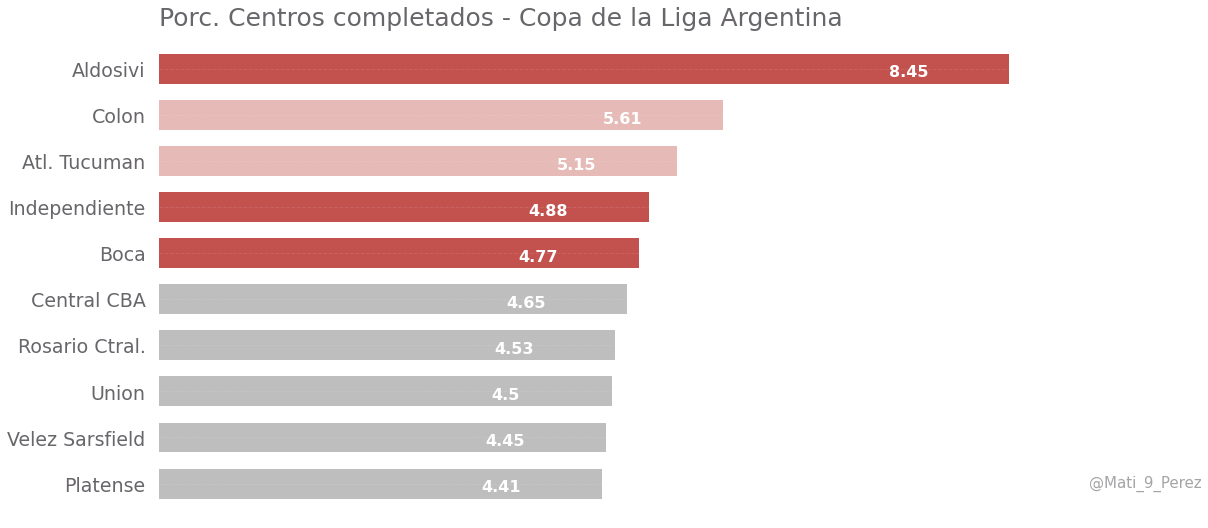

transData(0,0) = [144.  81.]


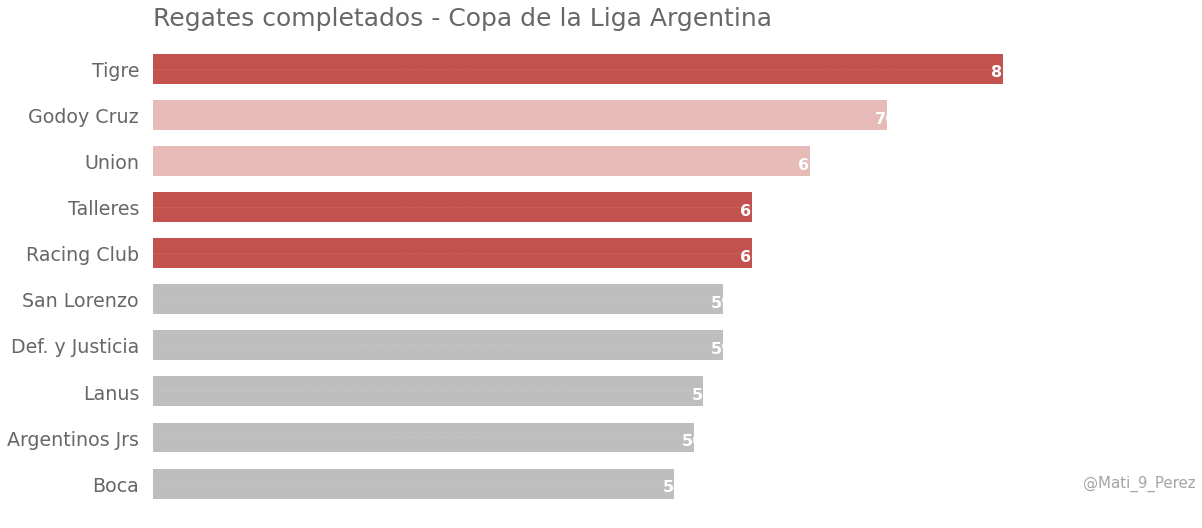

transData(0,0) = [144.  81.]


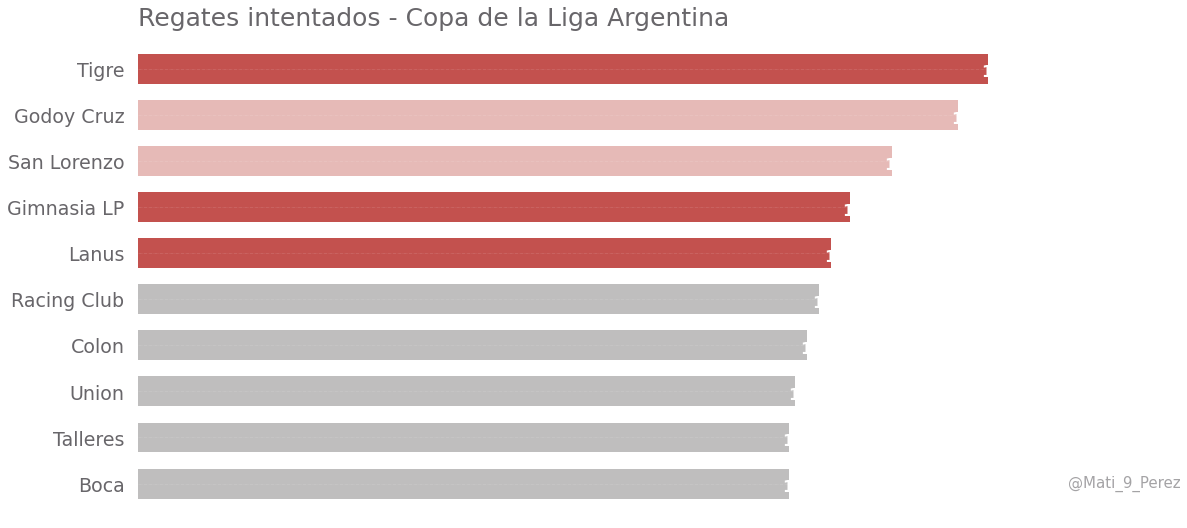

transData(0,0) = [144.  81.]


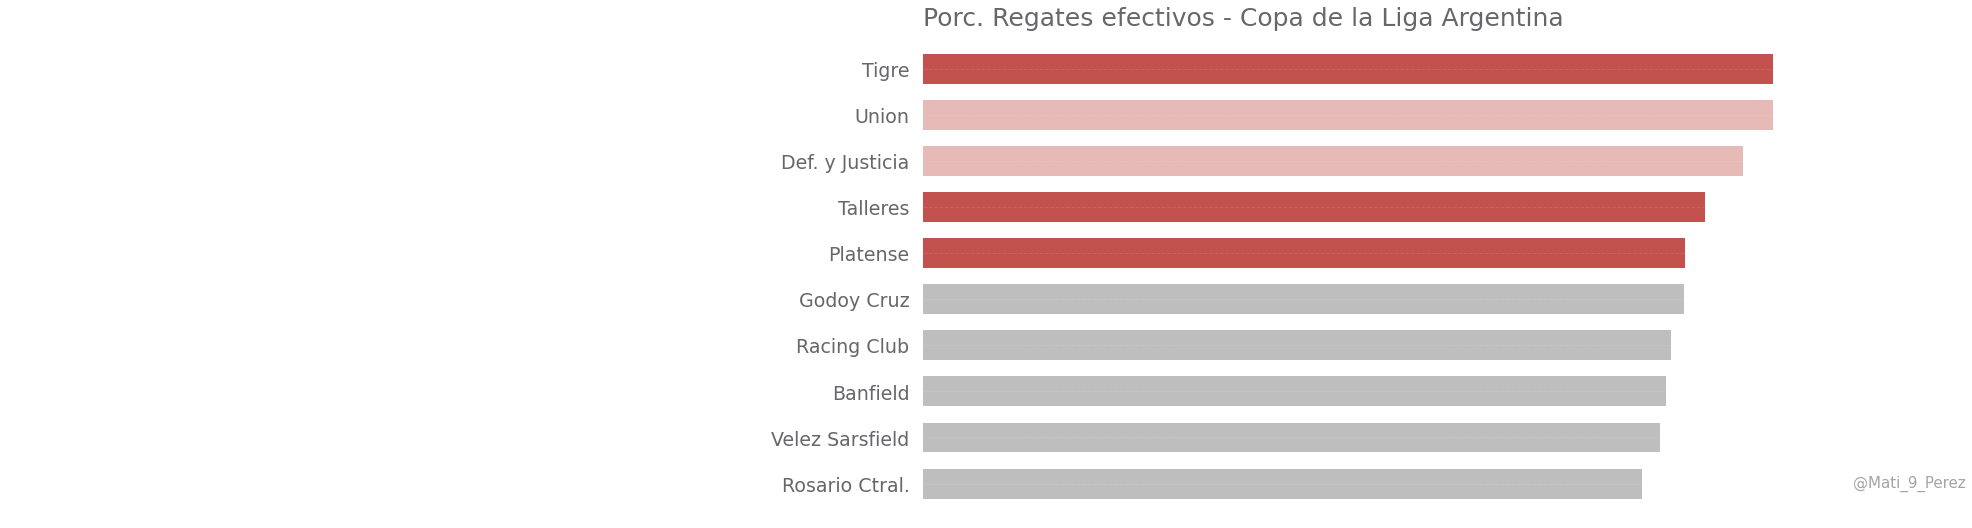

transData(0,0) = [144.  81.]


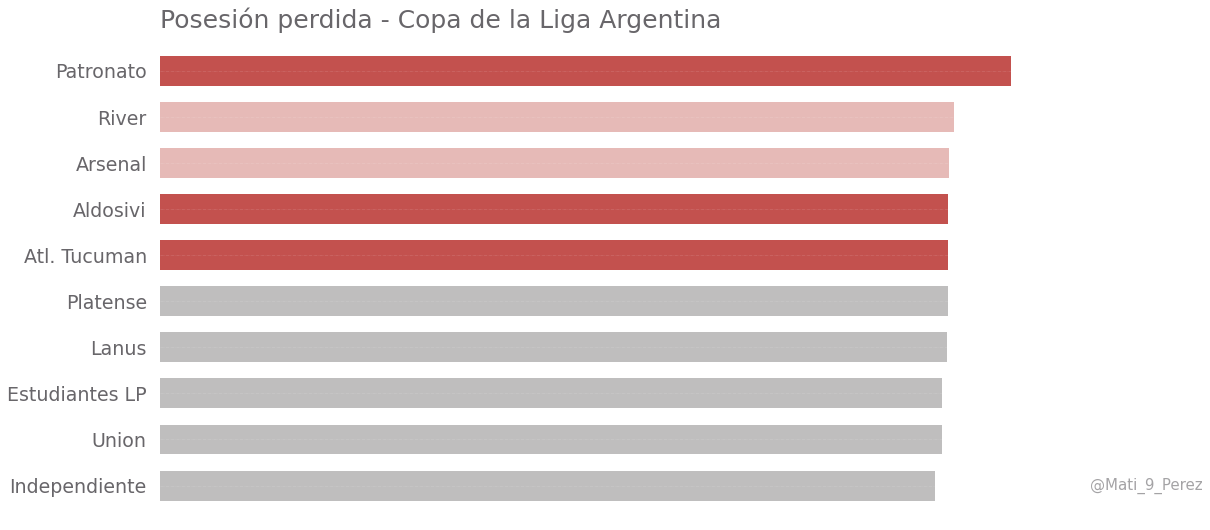

transData(0,0) = [144.  81.]


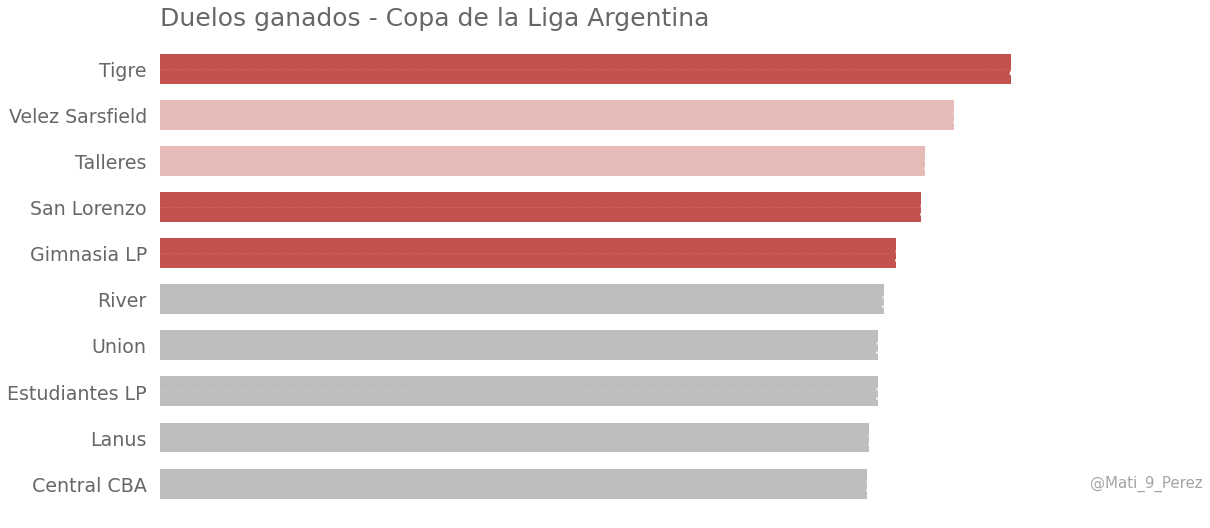

transData(0,0) = [144.  81.]


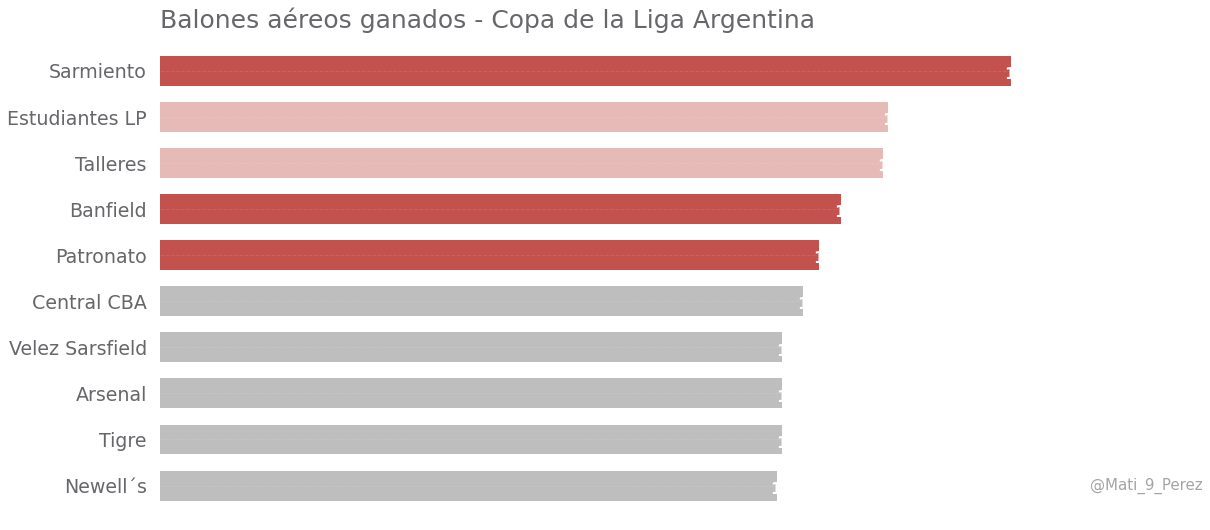

transData(0,0) = [144.  81.]


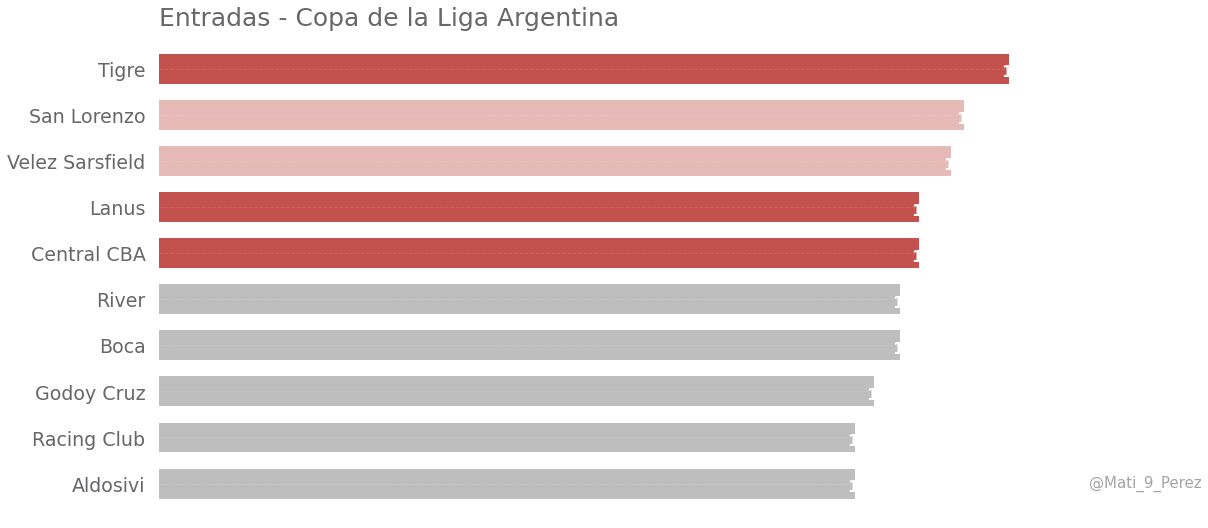

transData(0,0) = [144.  81.]


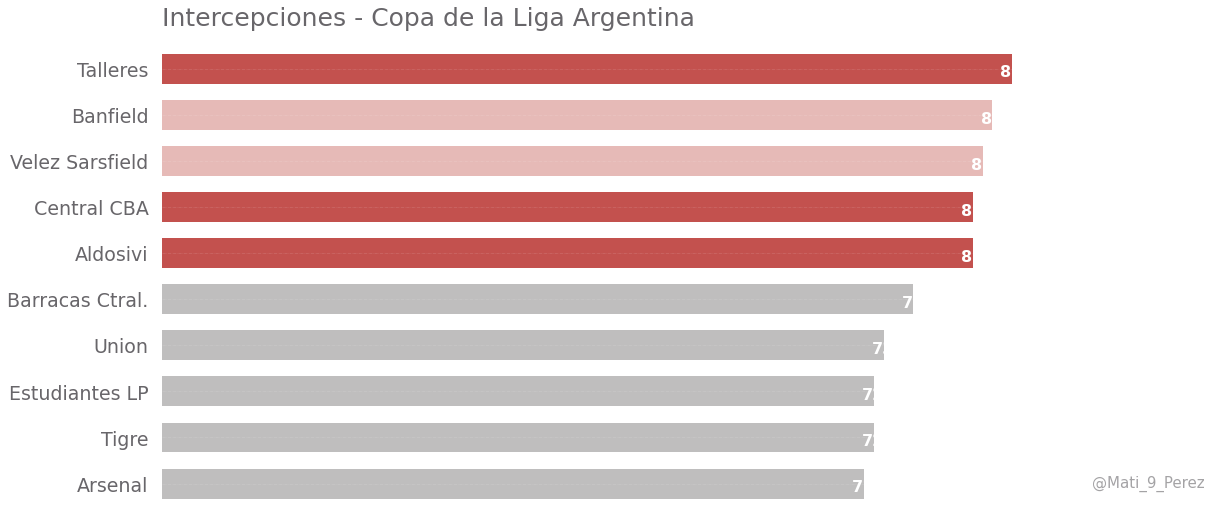

transData(0,0) = [144.  81.]


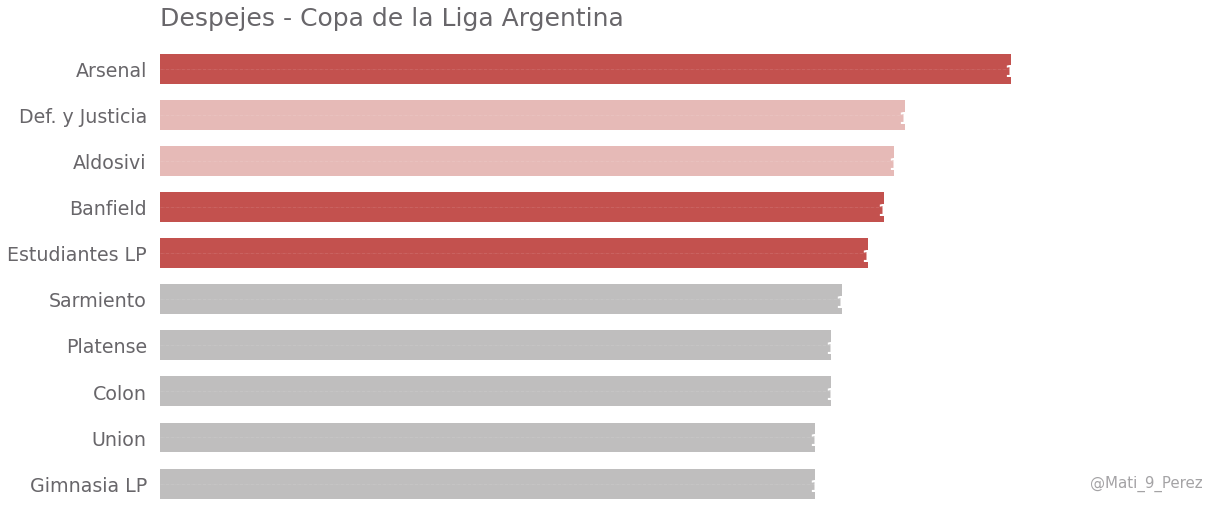

transData(0,0) = [144.  81.]


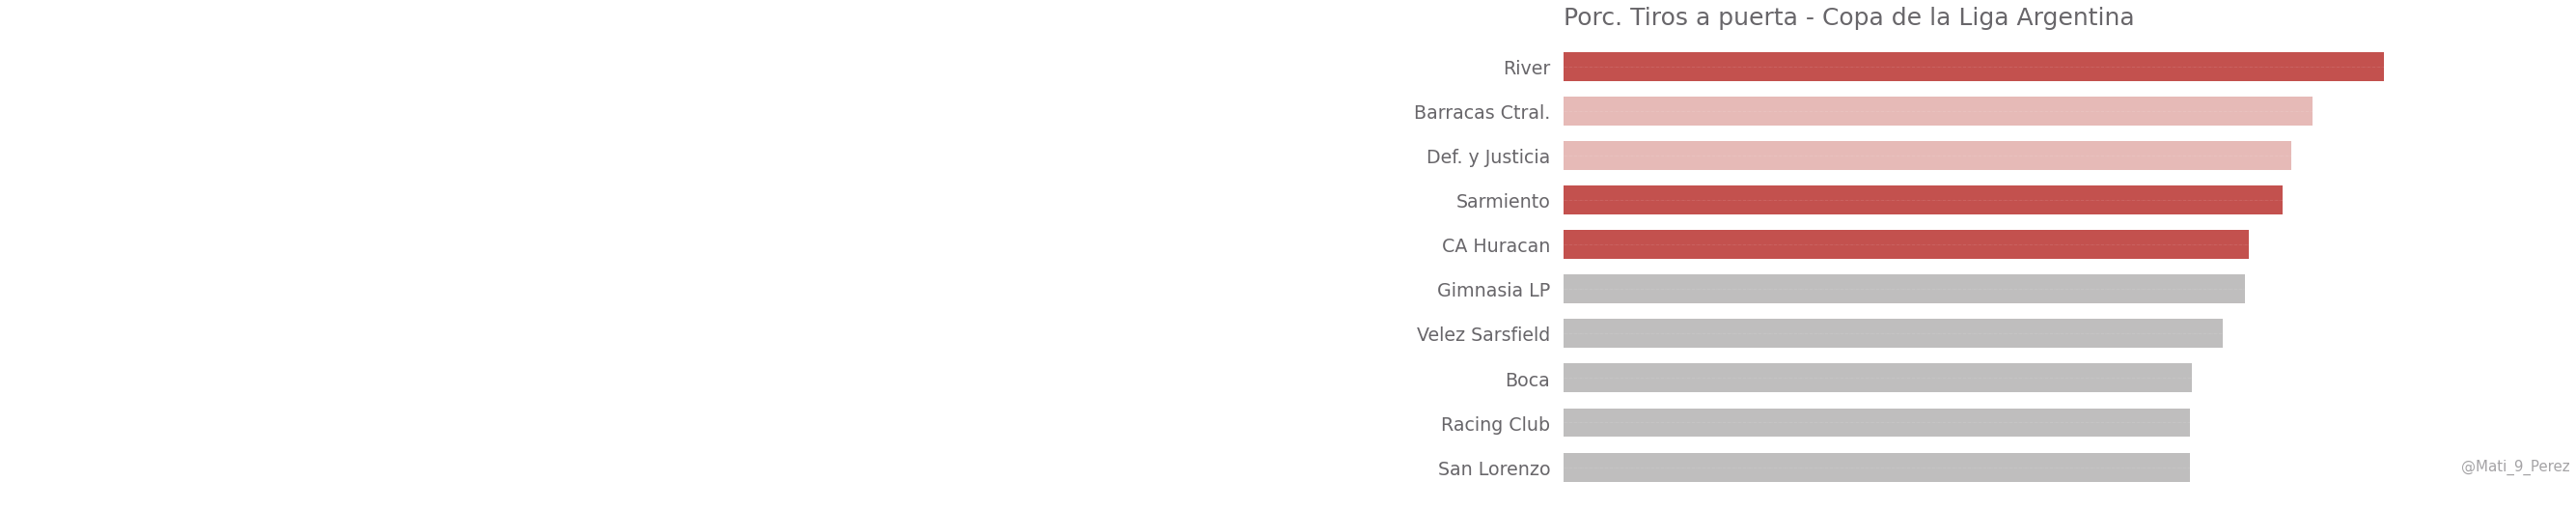

transData(0,0) = [144.  81.]


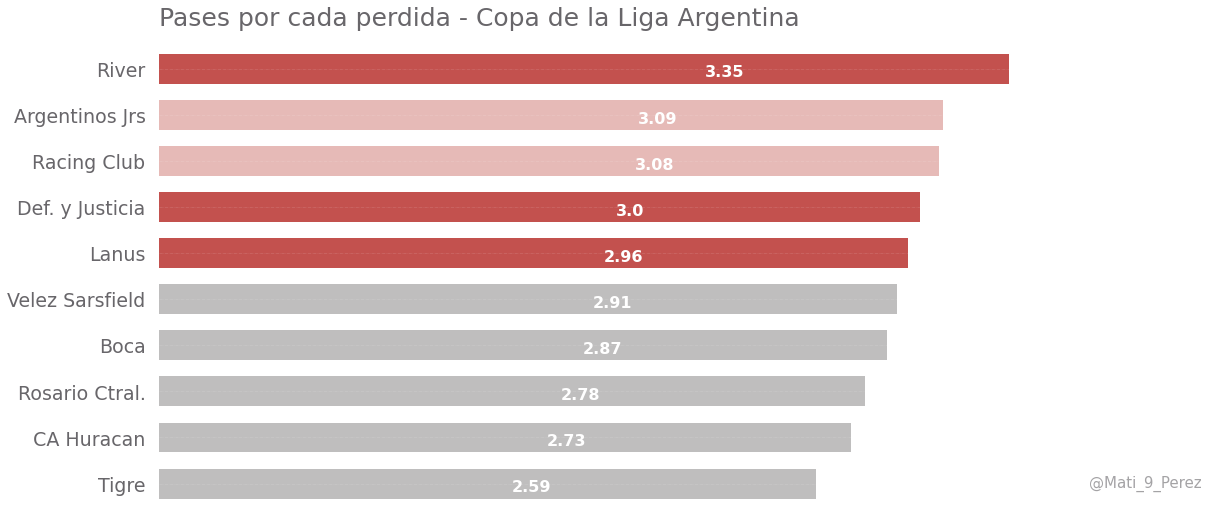

transData(0,0) = [144.  81.]


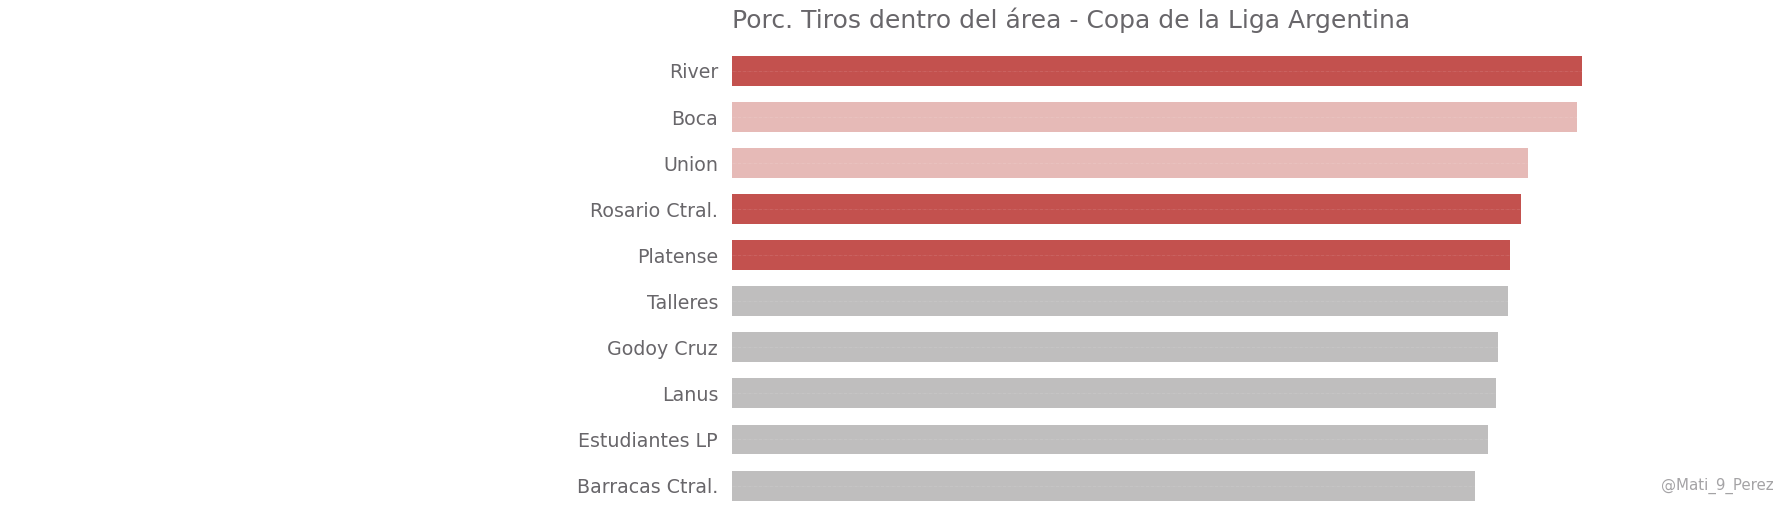

transData(0,0) = [144.  81.]


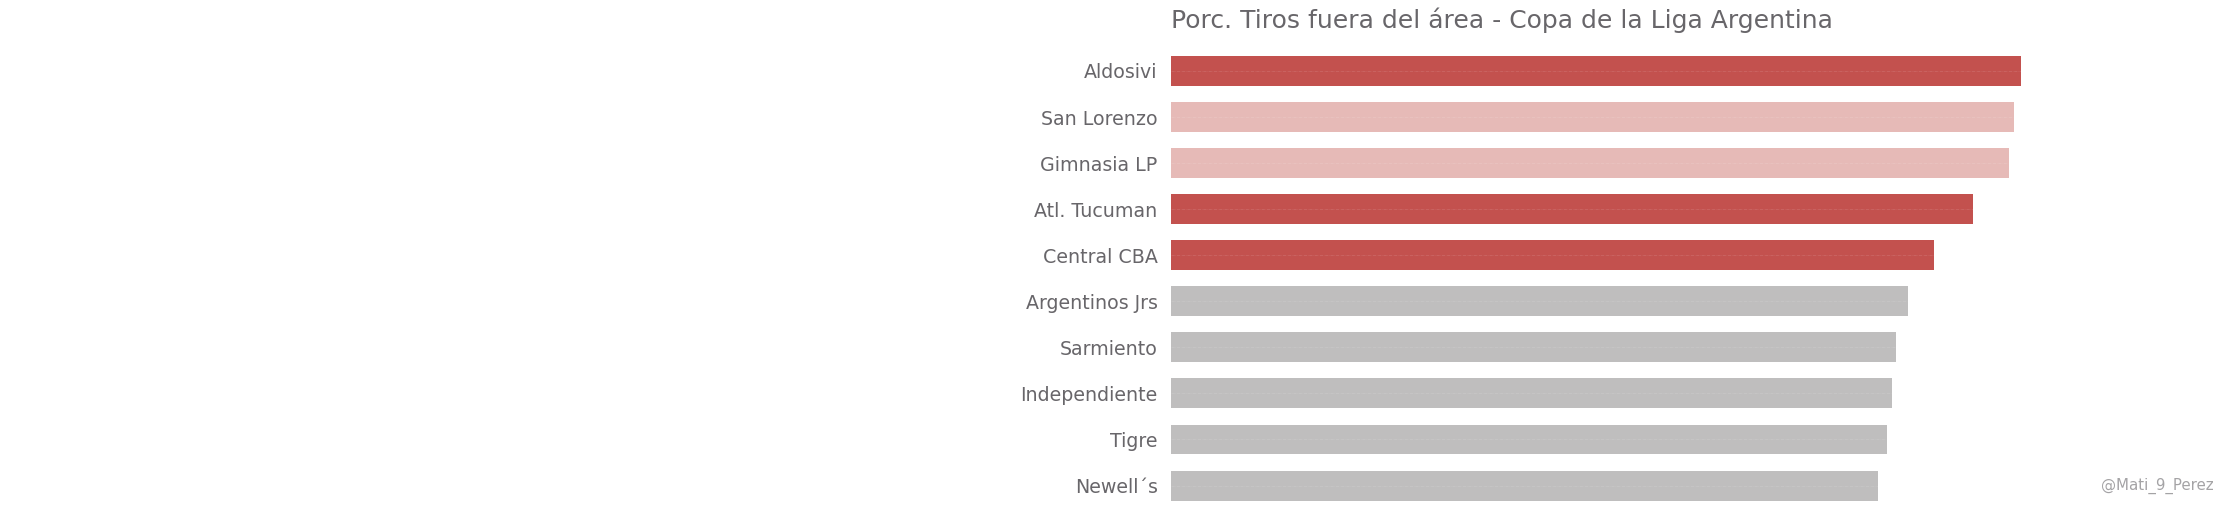

transData(0,0) = [144.  81.]


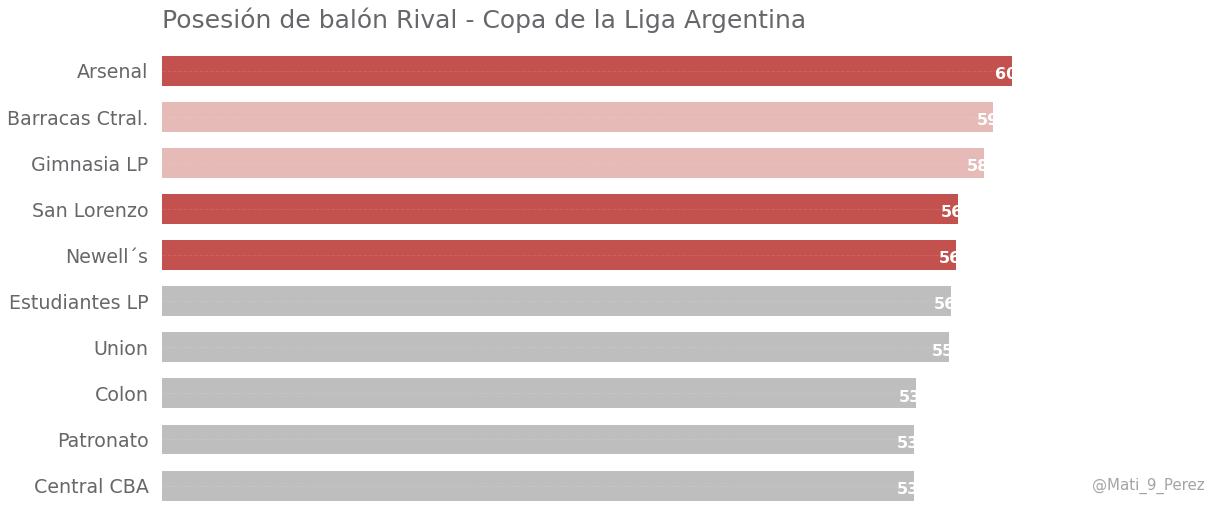

transData(0,0) = [144.  81.]


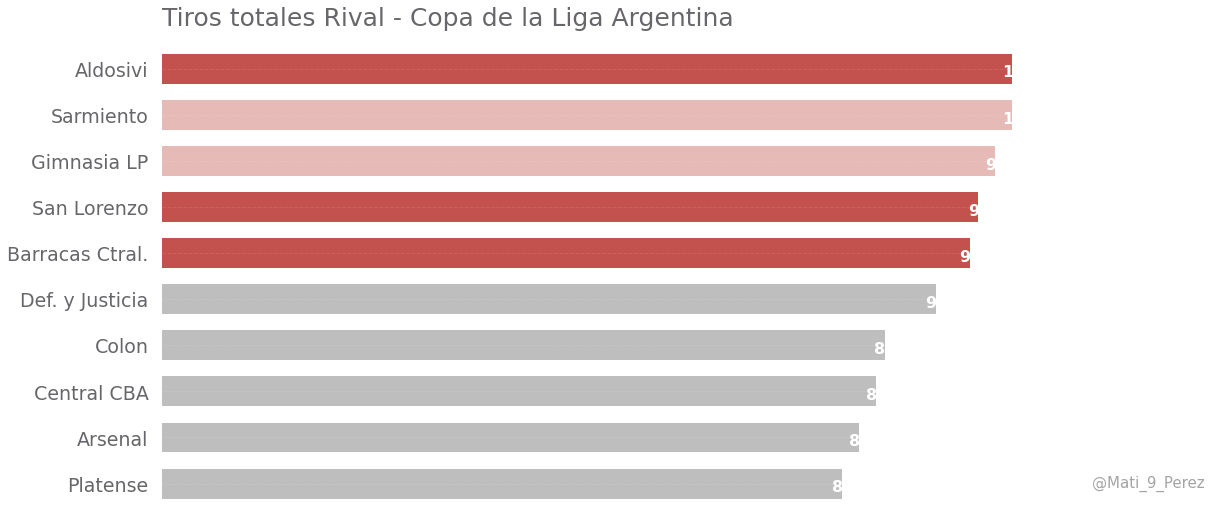

transData(0,0) = [144.  81.]


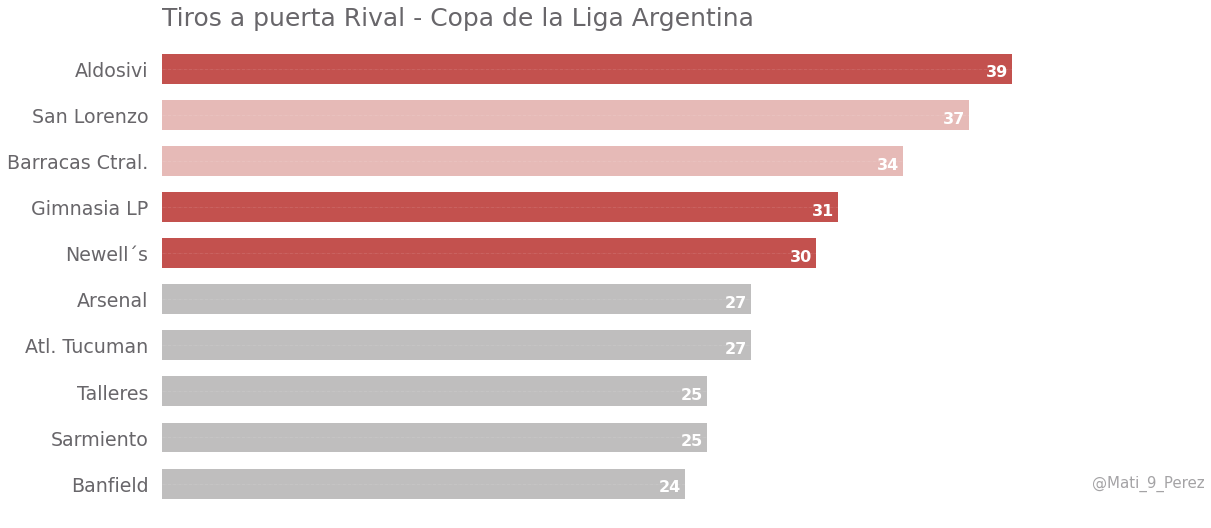

transData(0,0) = [144.  81.]


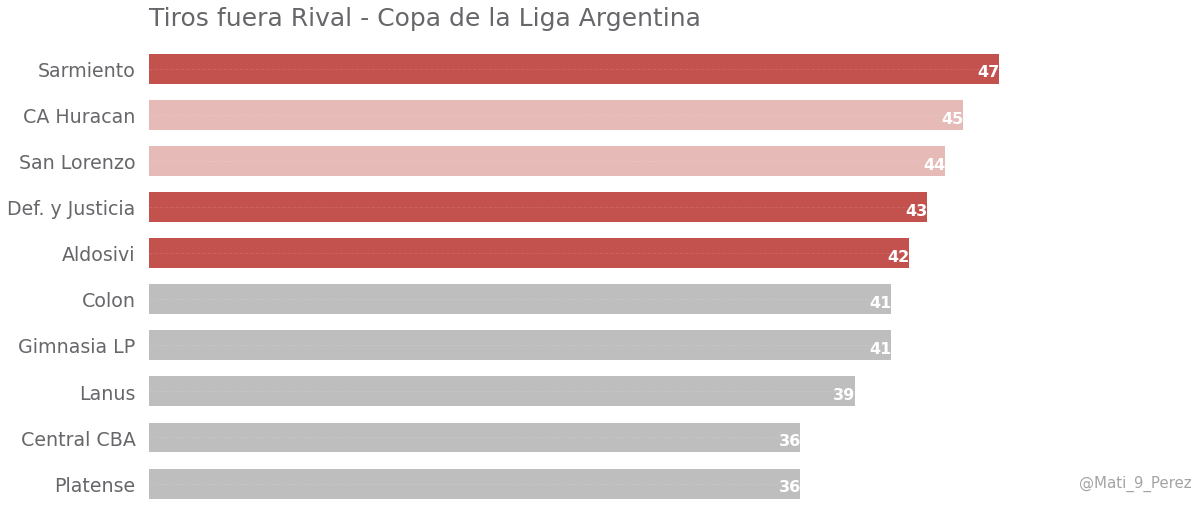

transData(0,0) = [144.  81.]


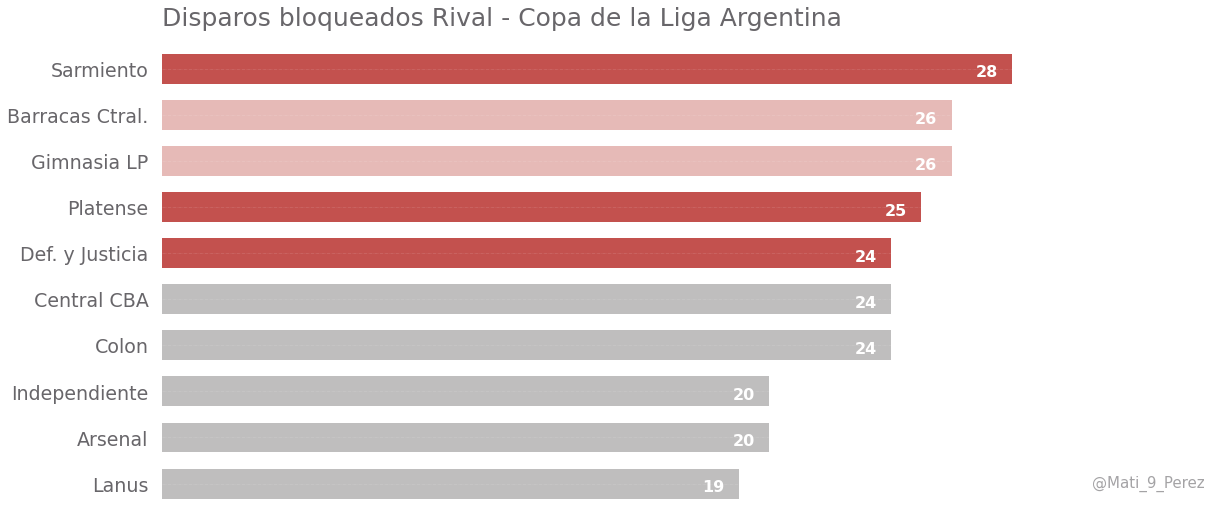

transData(0,0) = [144.  81.]


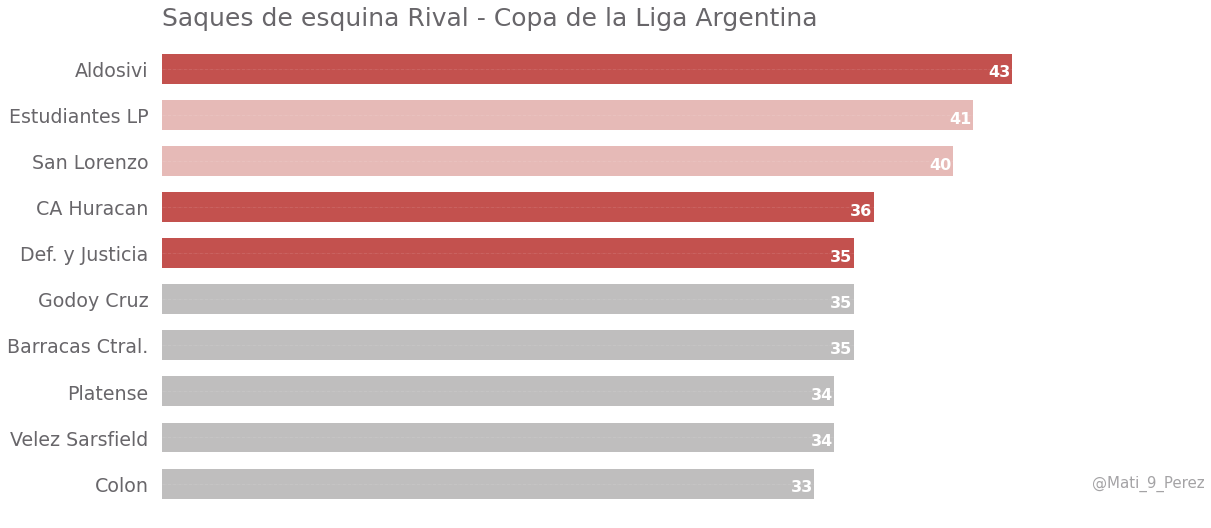

transData(0,0) = [144.  81.]


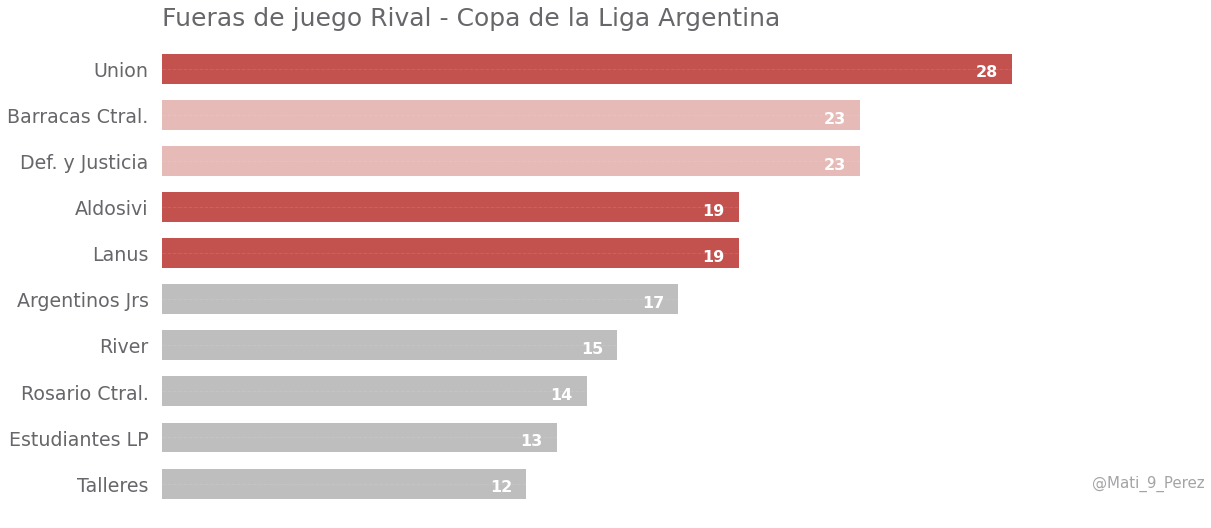

transData(0,0) = [144.  81.]


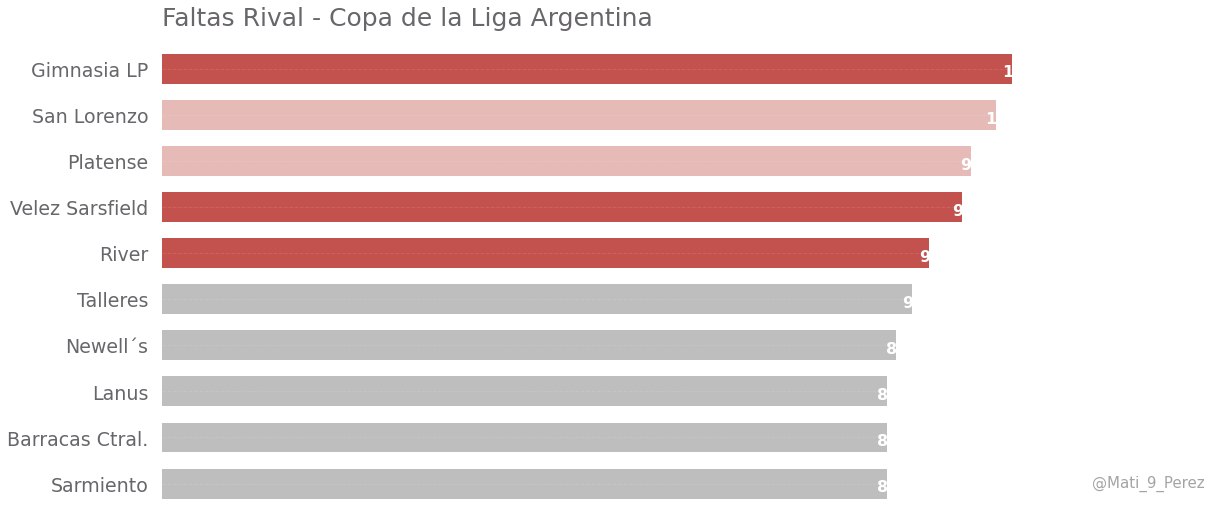

transData(0,0) = [144.  81.]


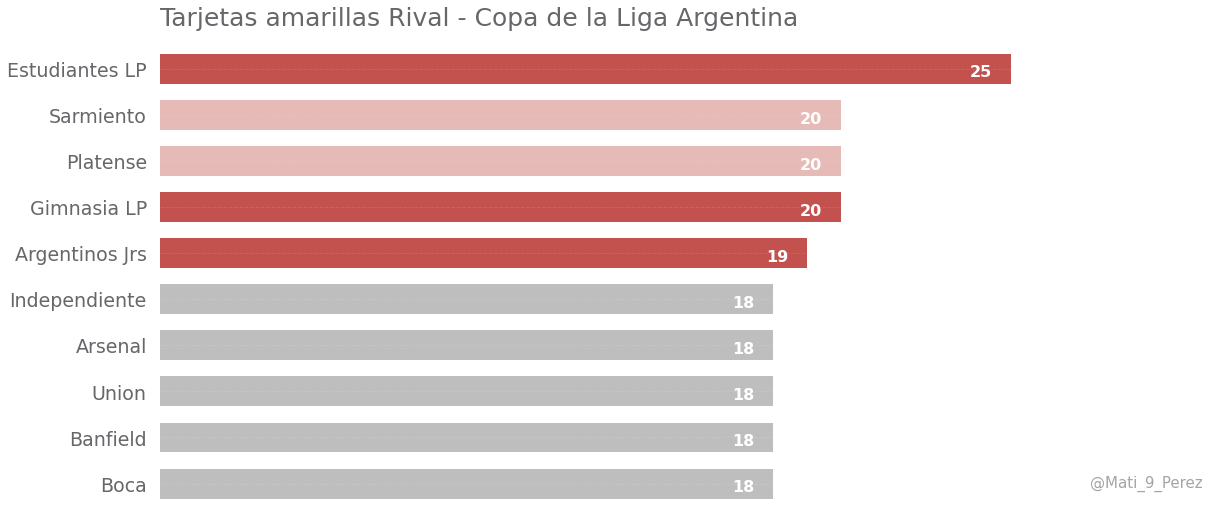

transData(0,0) = [144.  81.]


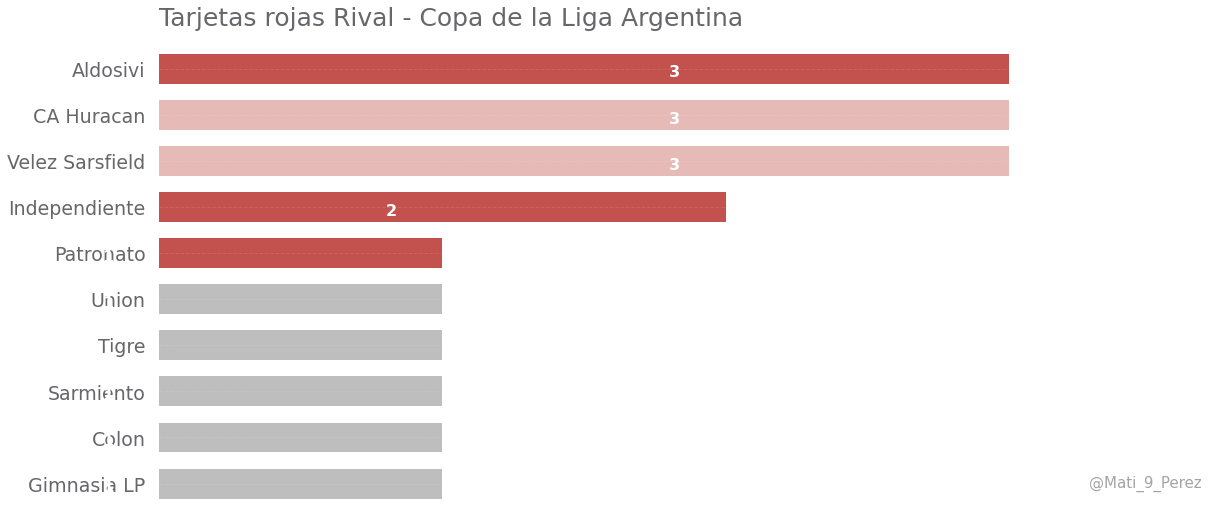

transData(0,0) = [144.  81.]


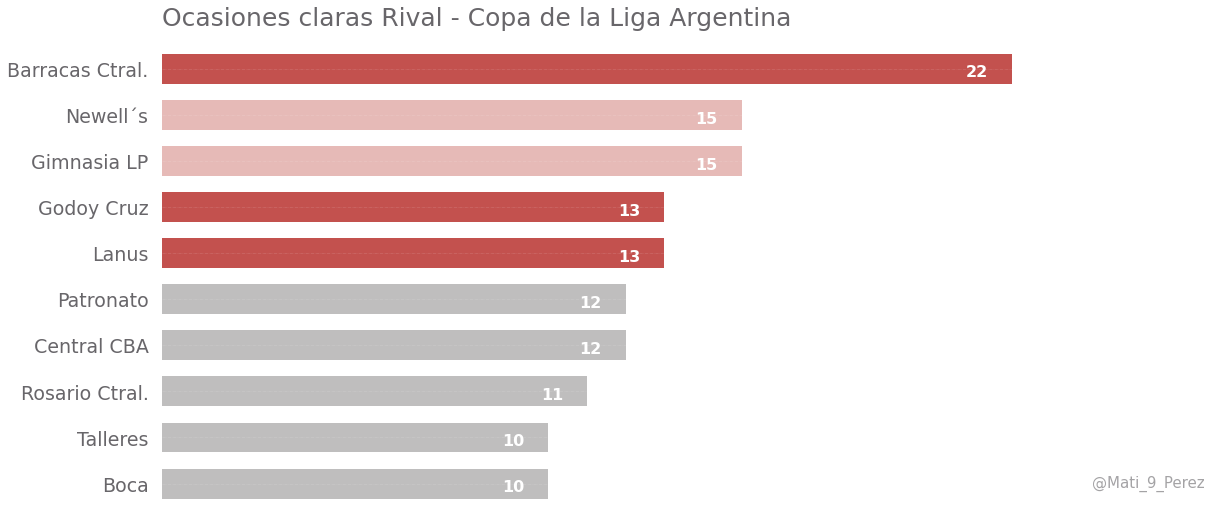

transData(0,0) = [144.  81.]


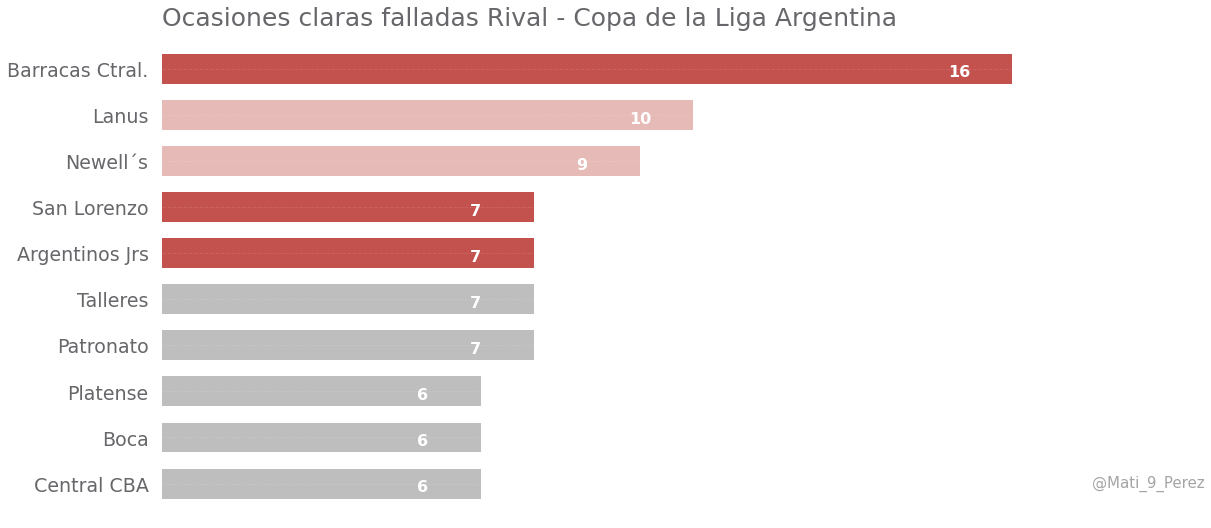

transData(0,0) = [144.  81.]


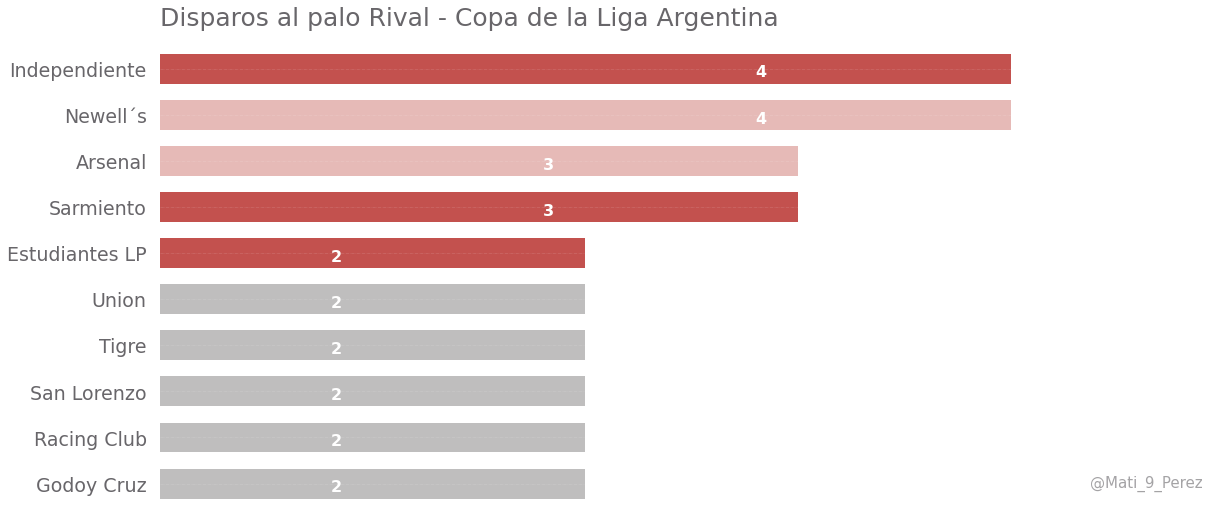

transData(0,0) = [144.  81.]


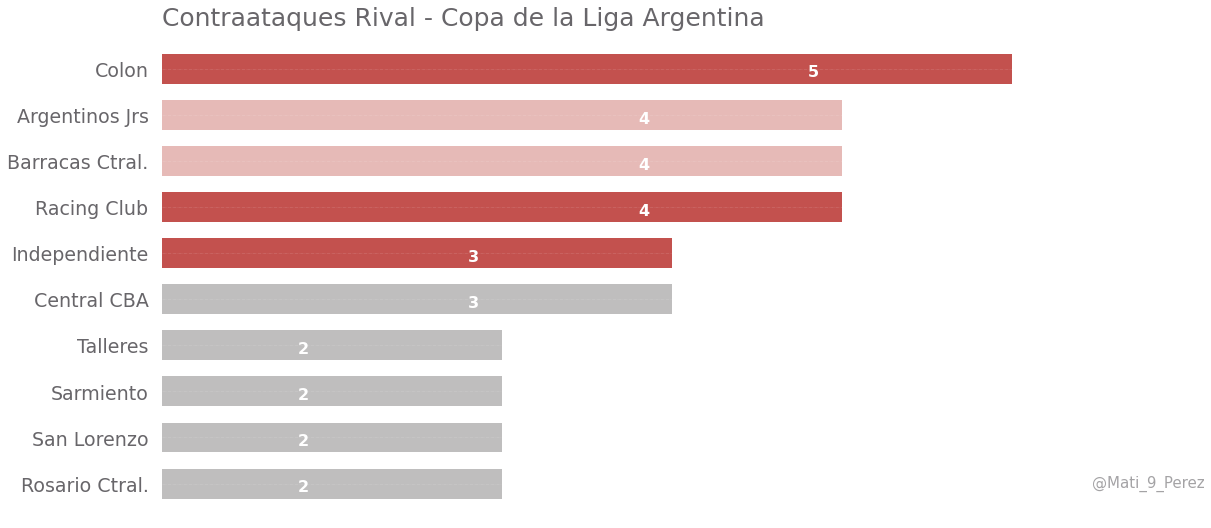

transData(0,0) = [144.  81.]


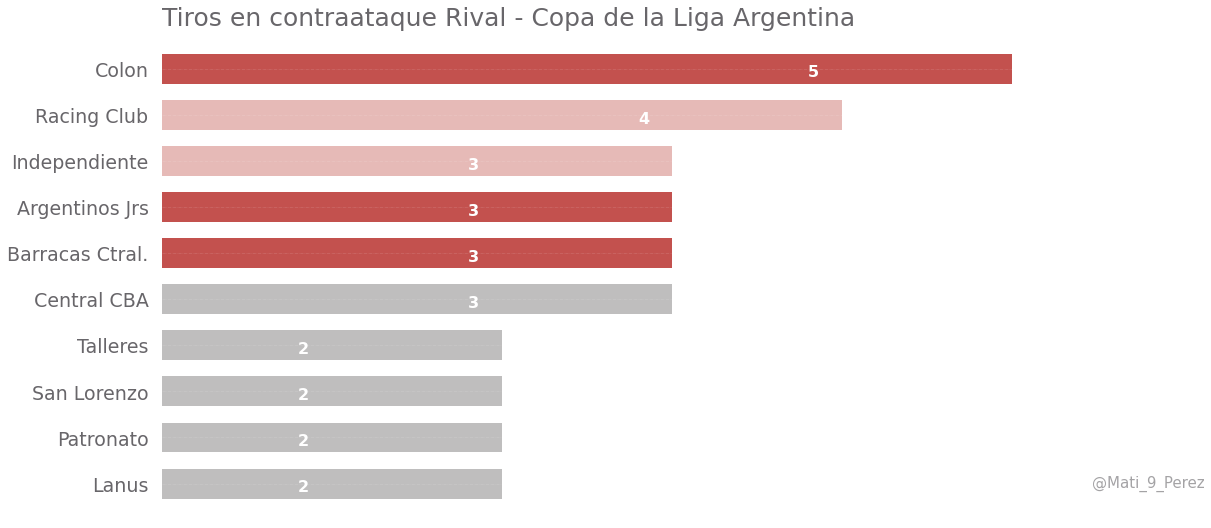

transData(0,0) = [144.  81.]


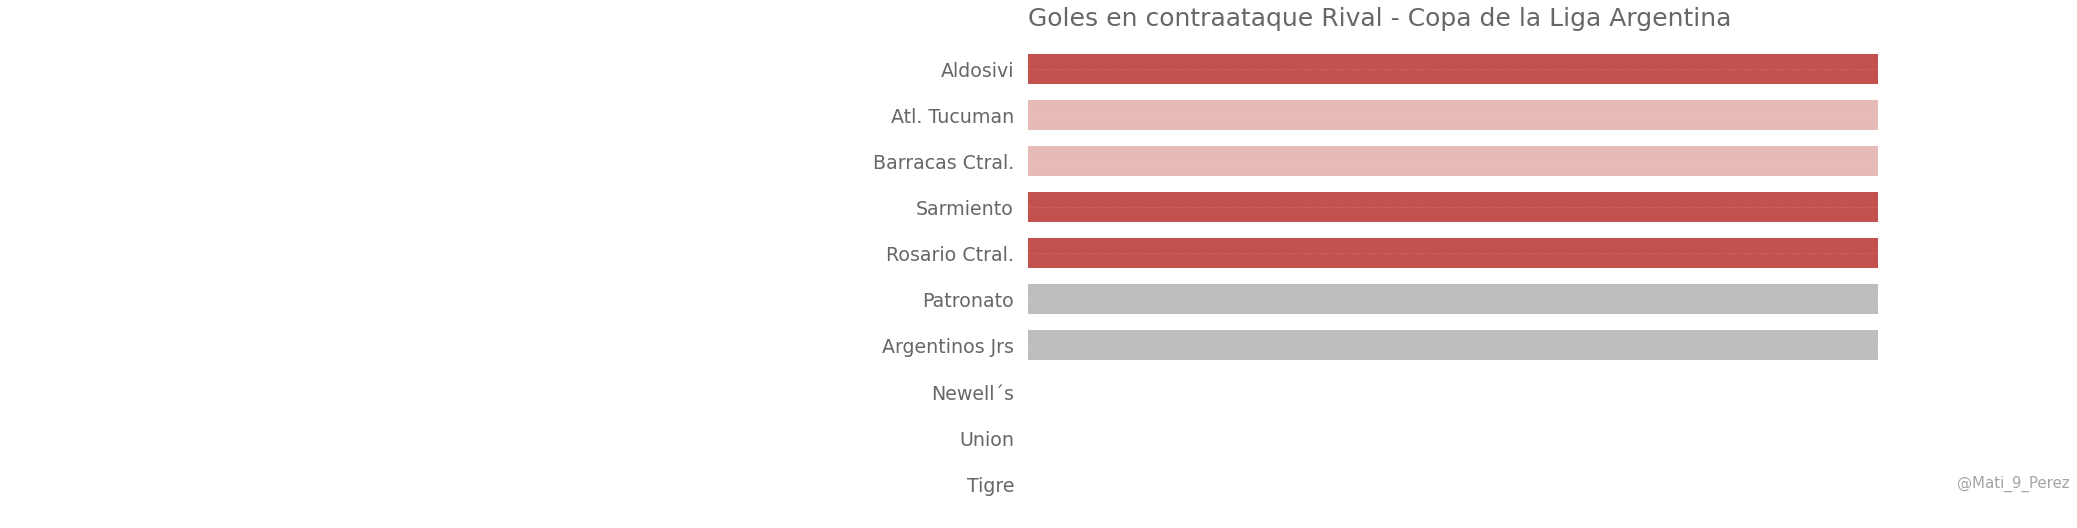

transData(0,0) = [144.  81.]


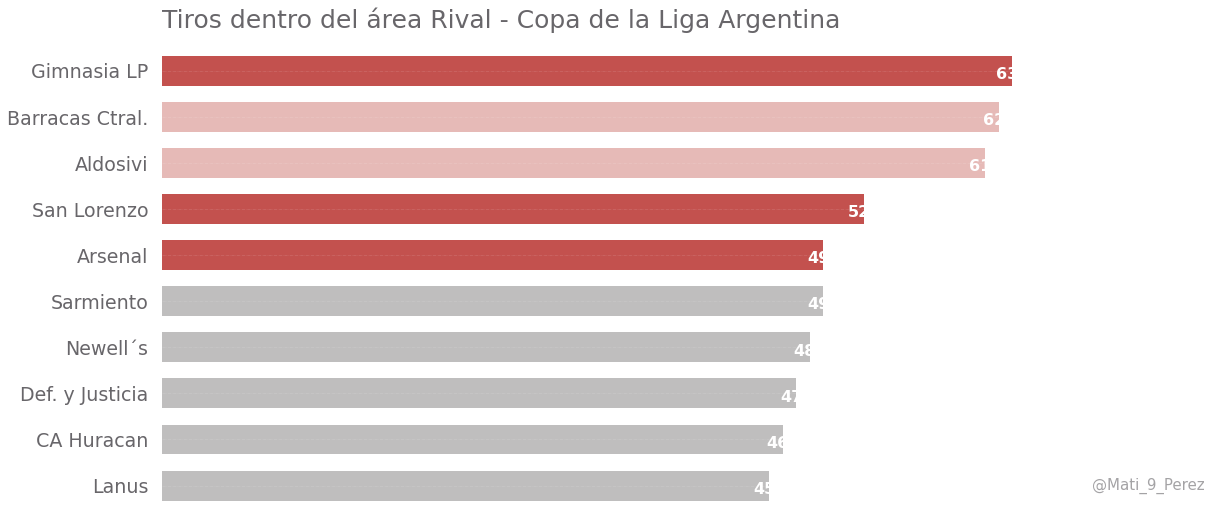

transData(0,0) = [144.  81.]


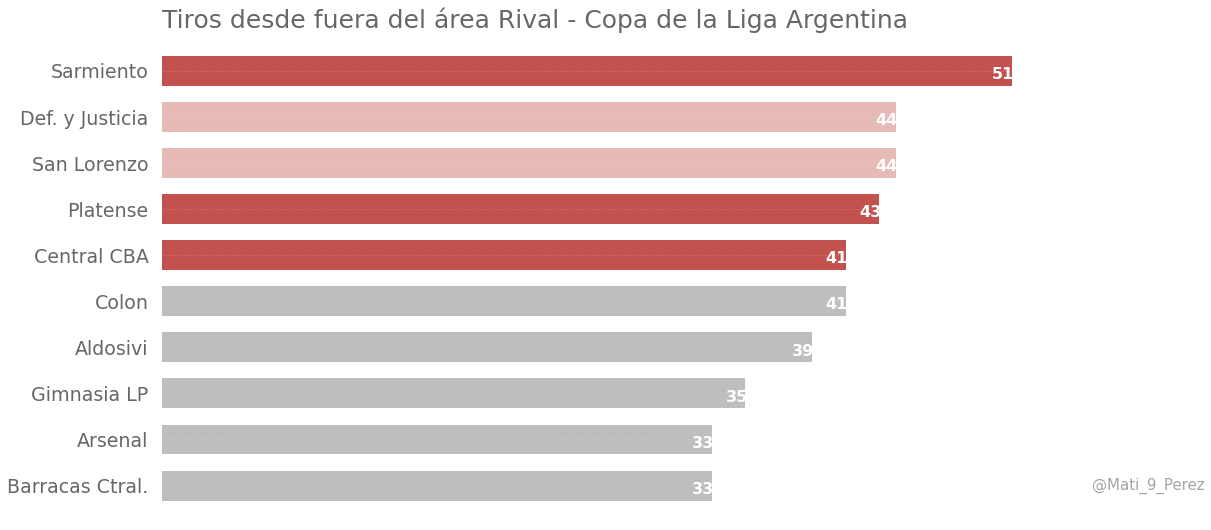

transData(0,0) = [144.  81.]


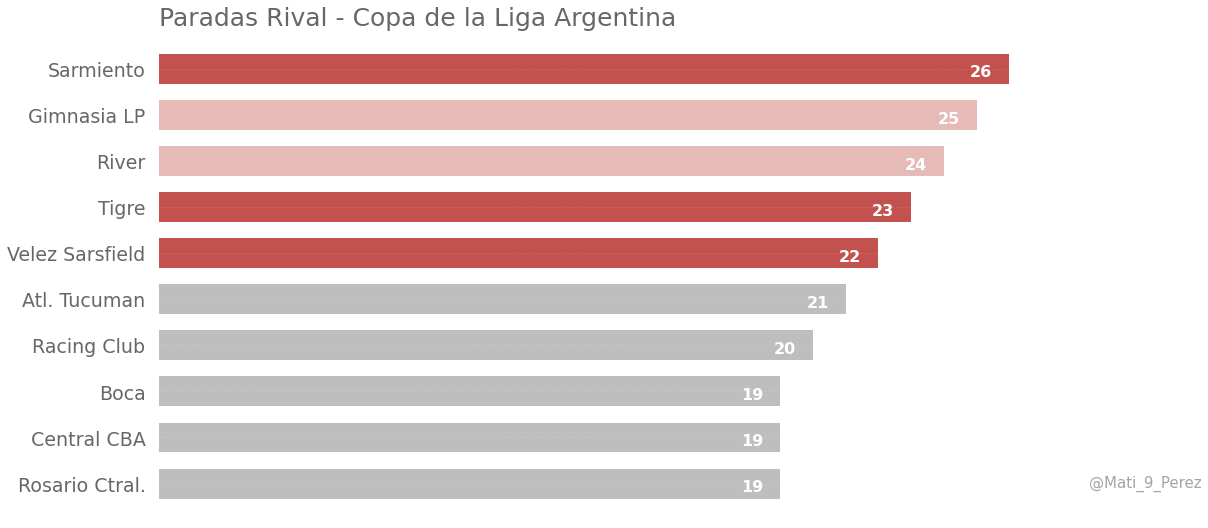

transData(0,0) = [144.  81.]


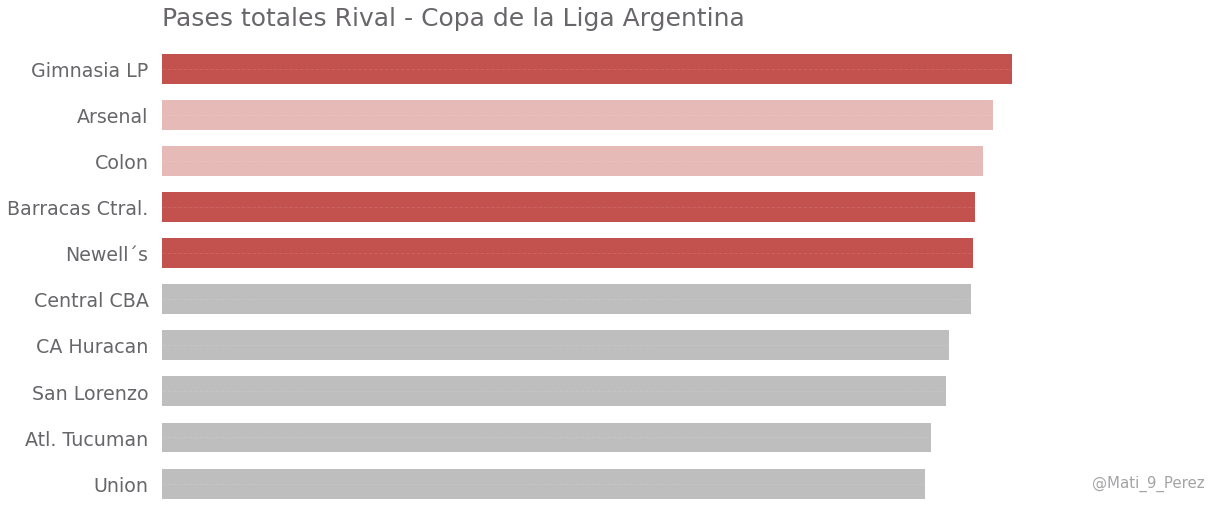

transData(0,0) = [144.  81.]


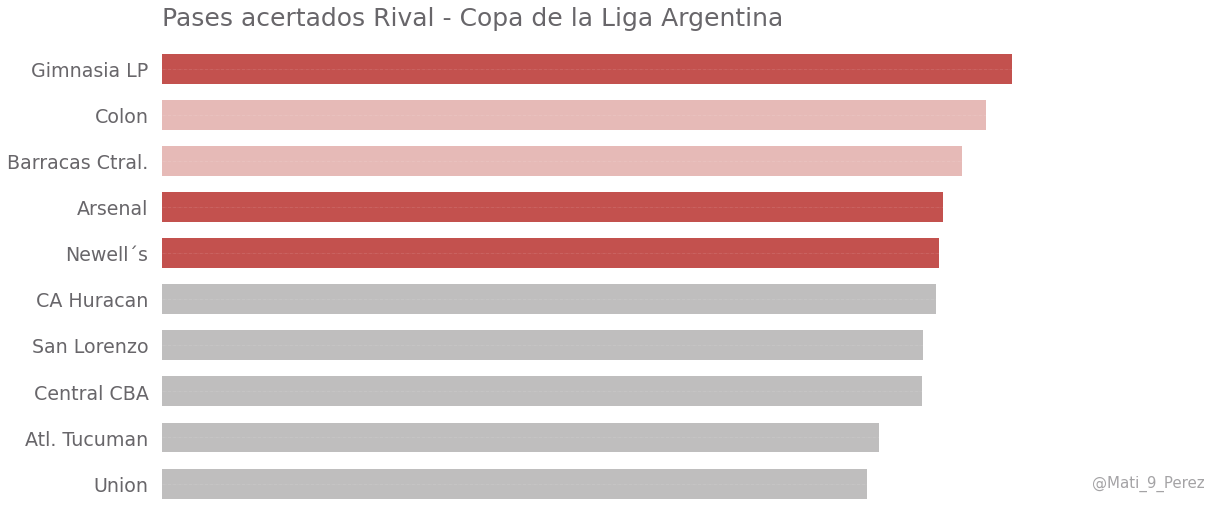

transData(0,0) = [144.  81.]


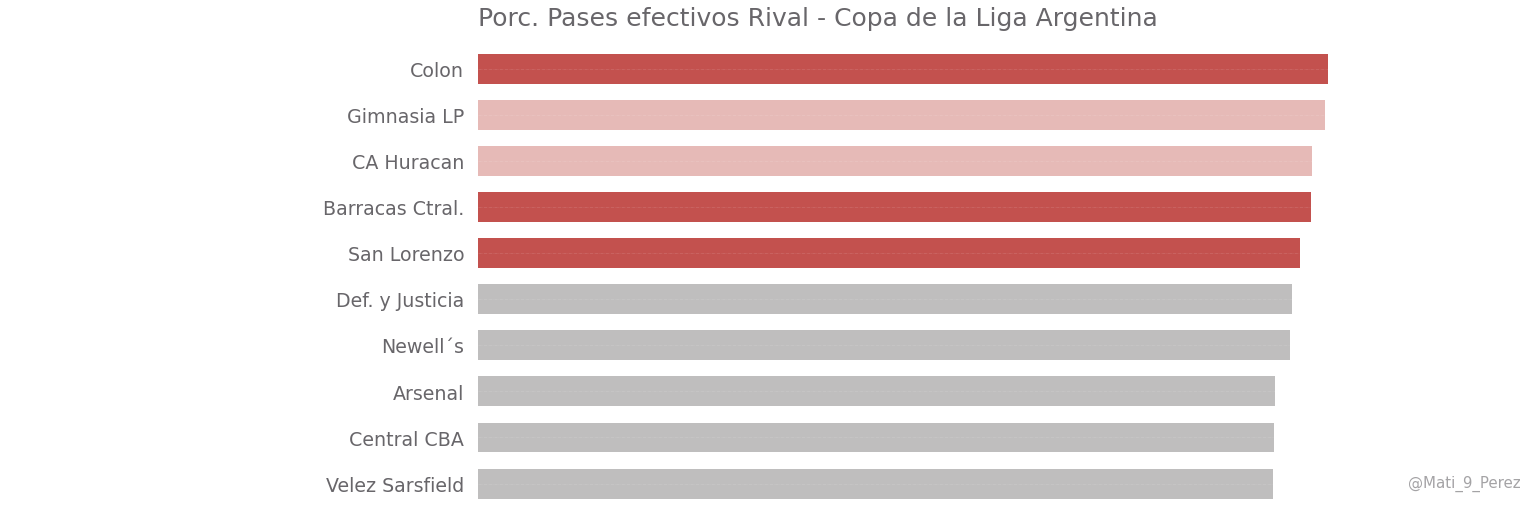

transData(0,0) = [144.  81.]


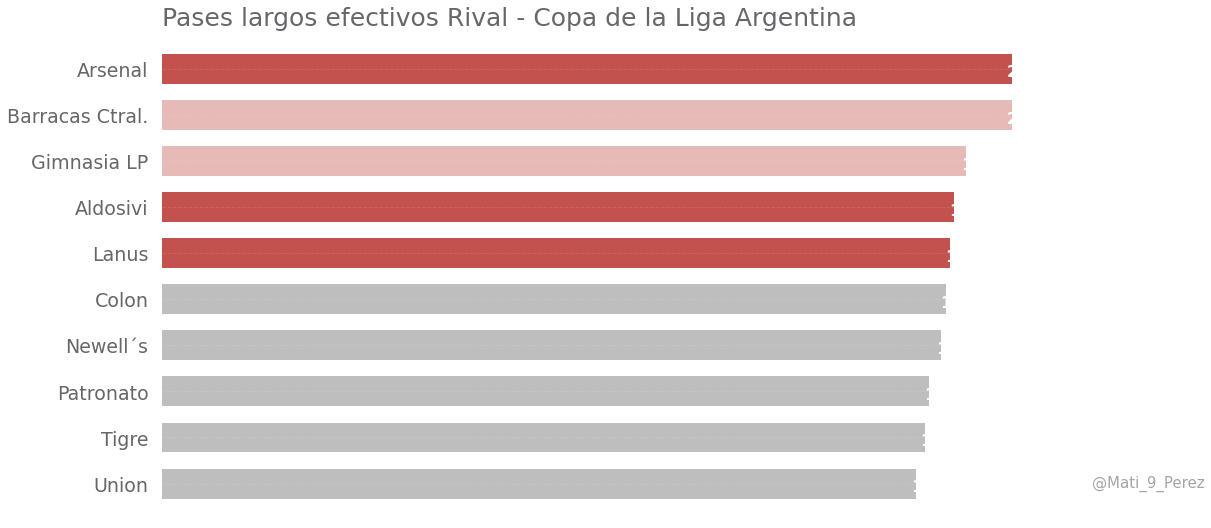

transData(0,0) = [144.  81.]


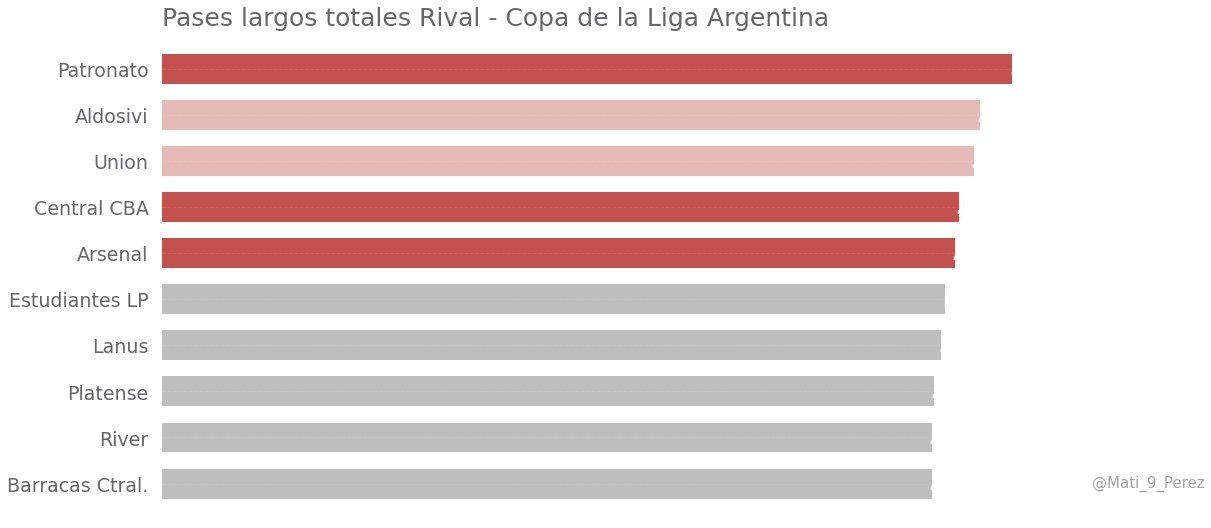

transData(0,0) = [144.  81.]


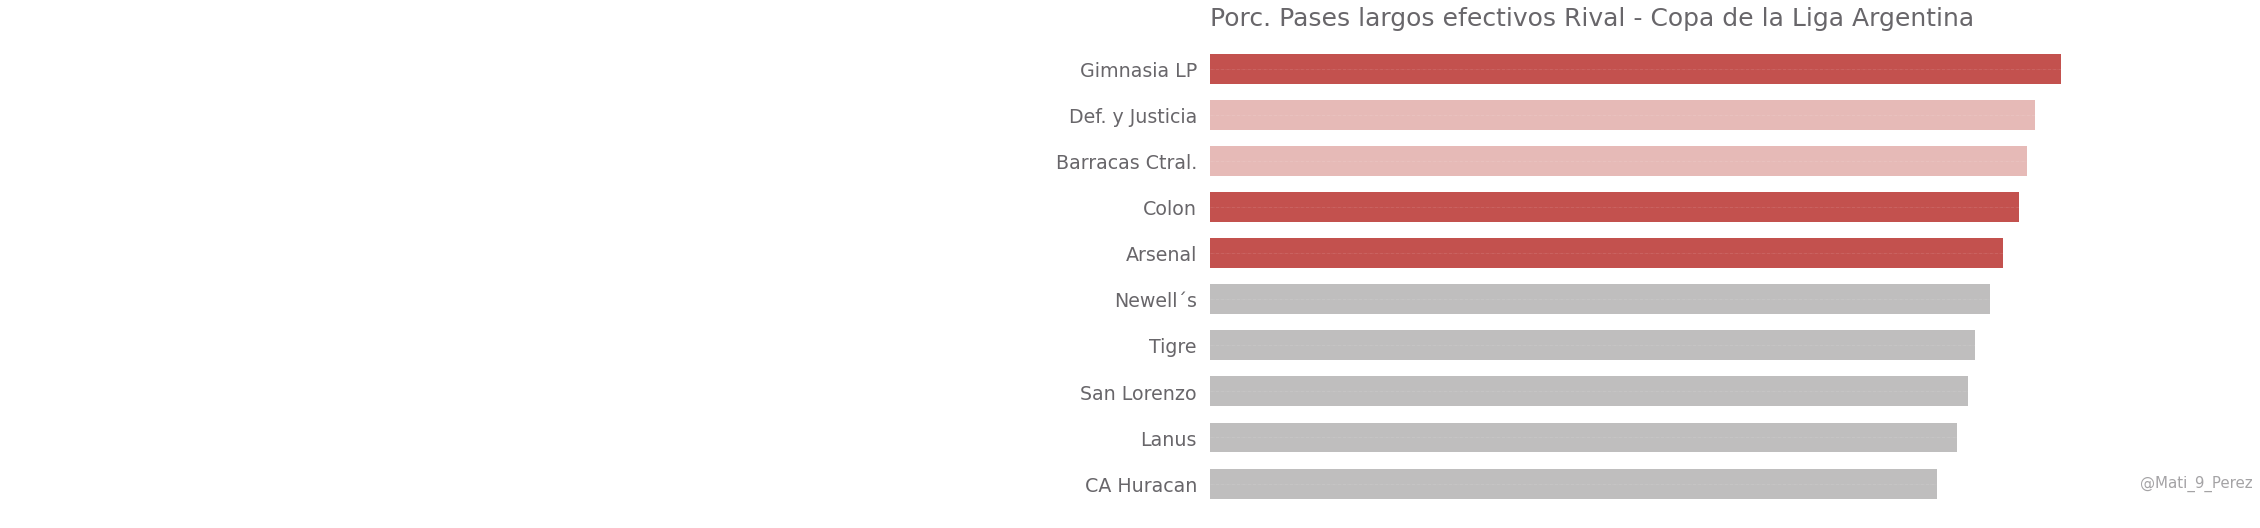

transData(0,0) = [144.  81.]


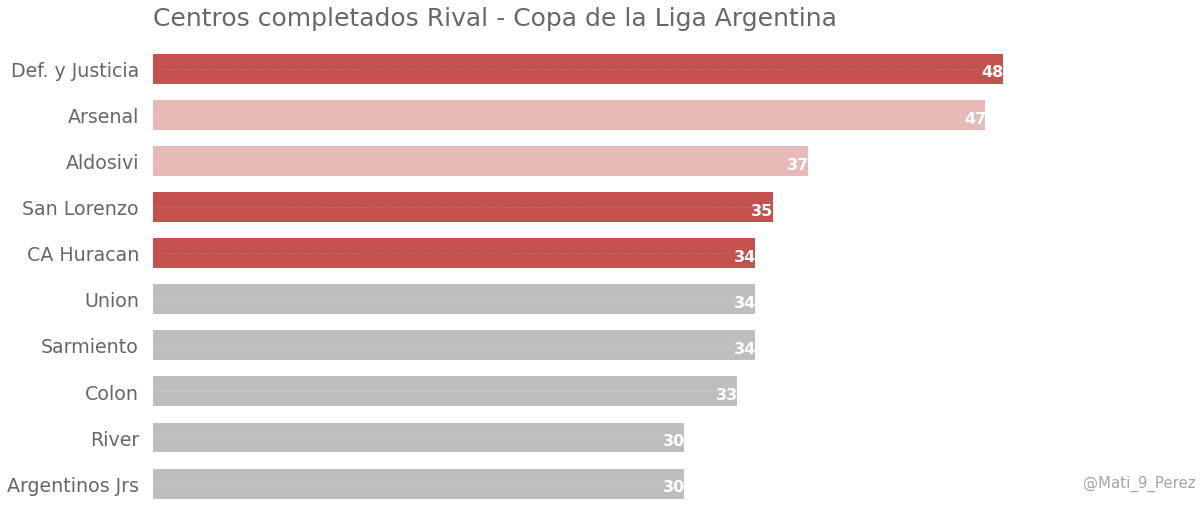

transData(0,0) = [144.  81.]


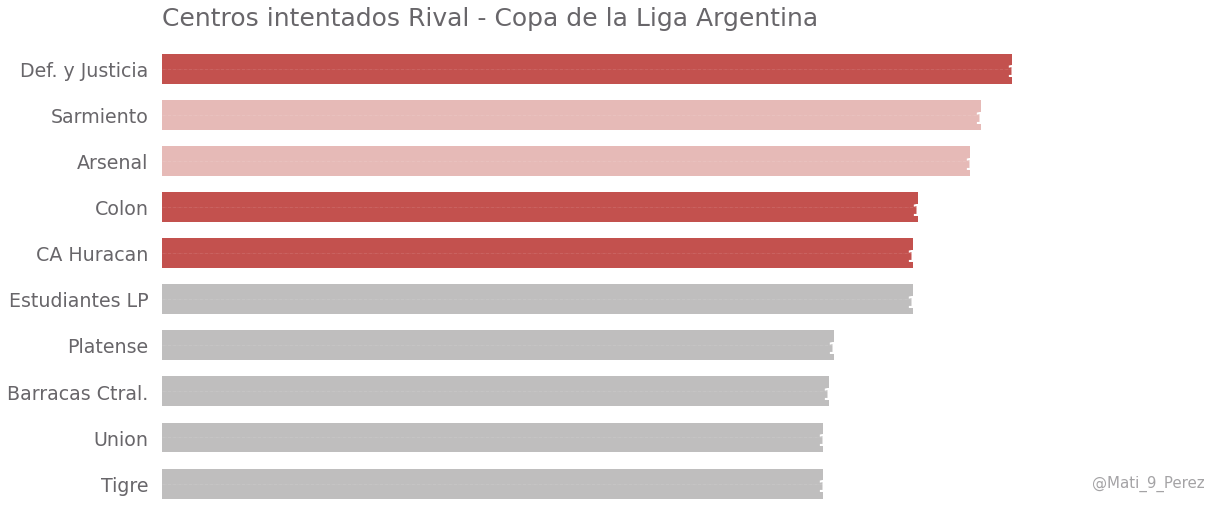

transData(0,0) = [144.  81.]


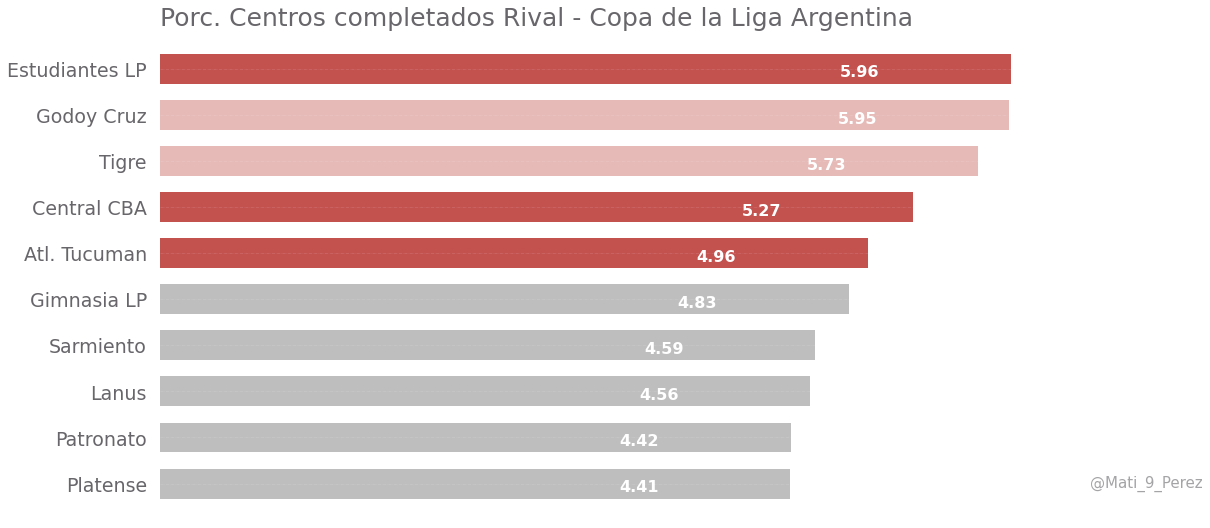

transData(0,0) = [144.  81.]


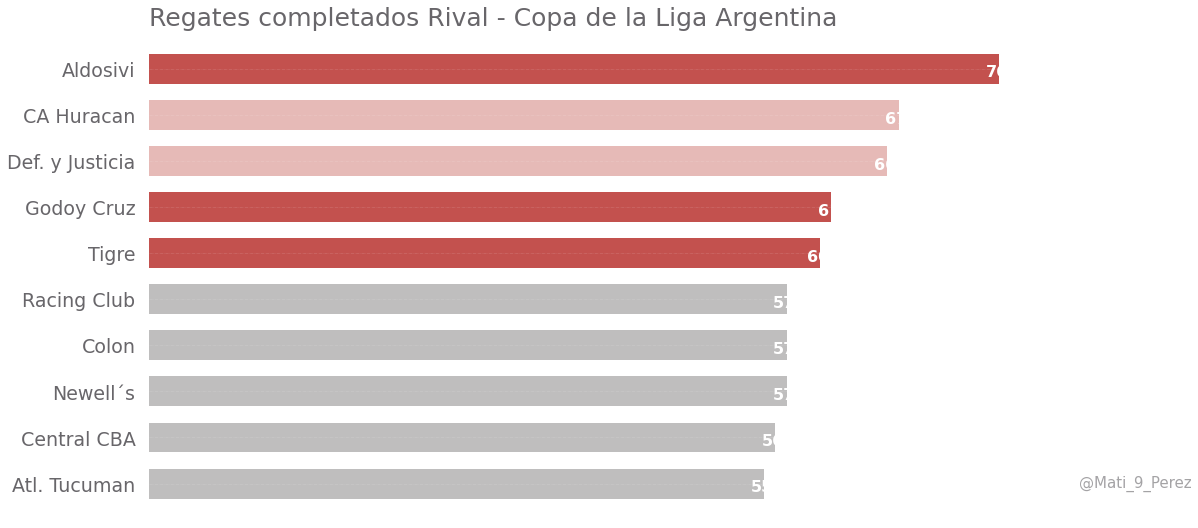

transData(0,0) = [144.  81.]


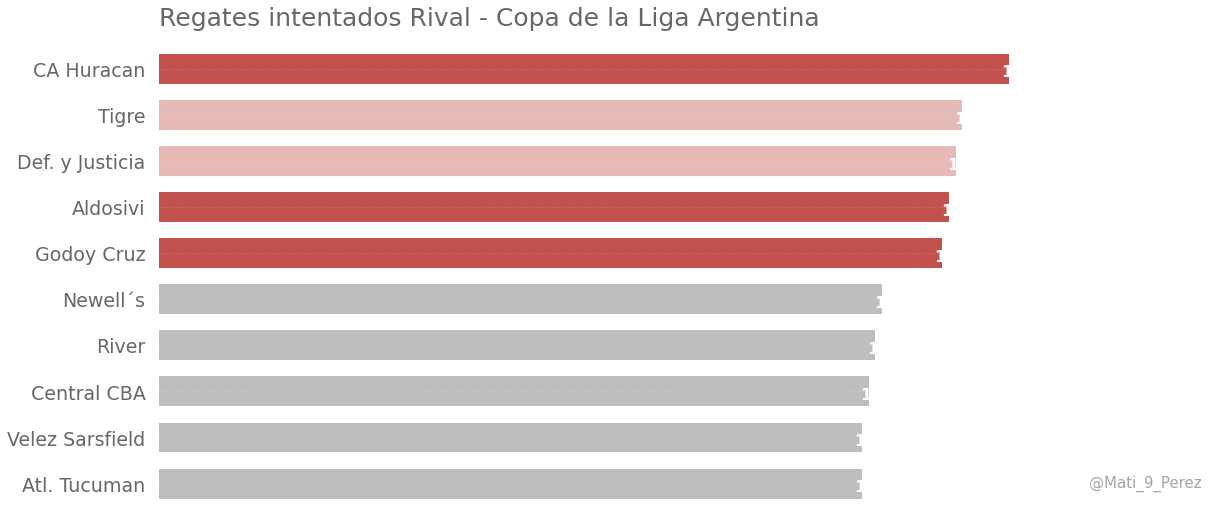

transData(0,0) = [144.  81.]


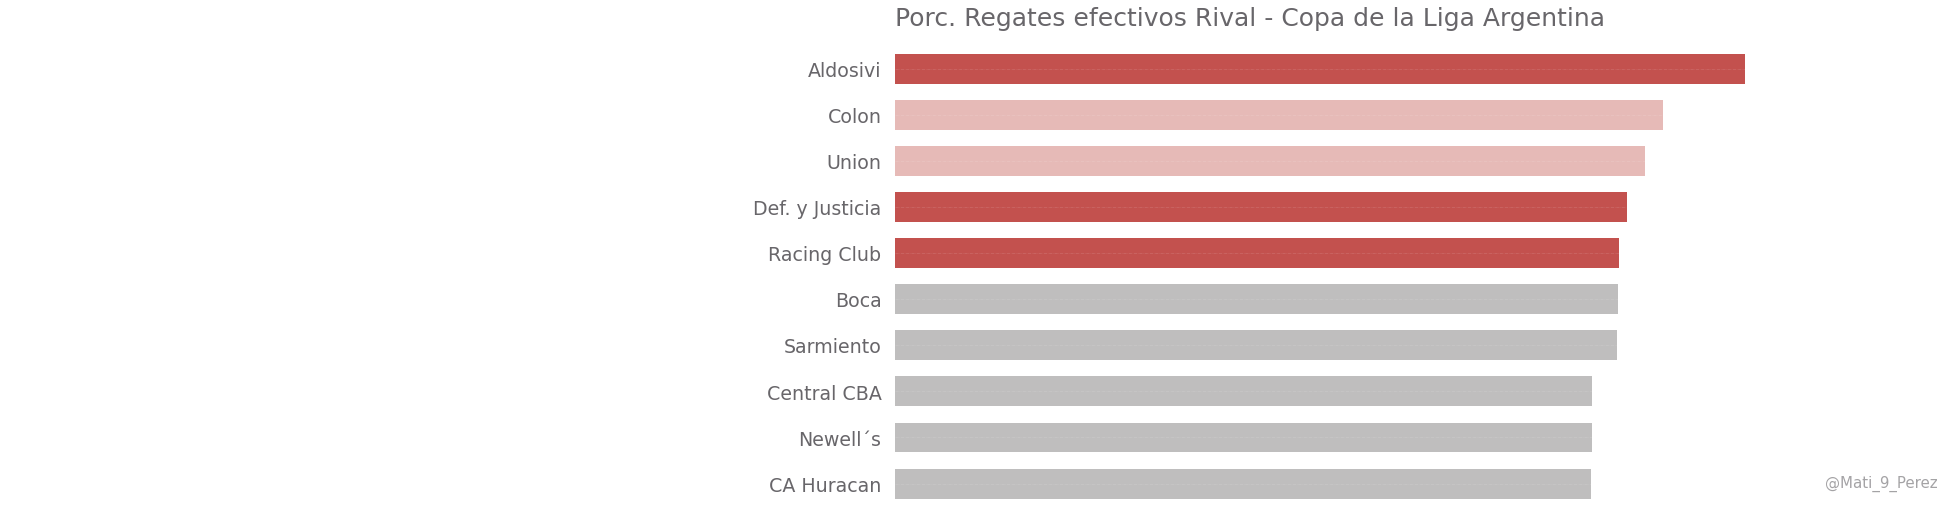

transData(0,0) = [144.  81.]


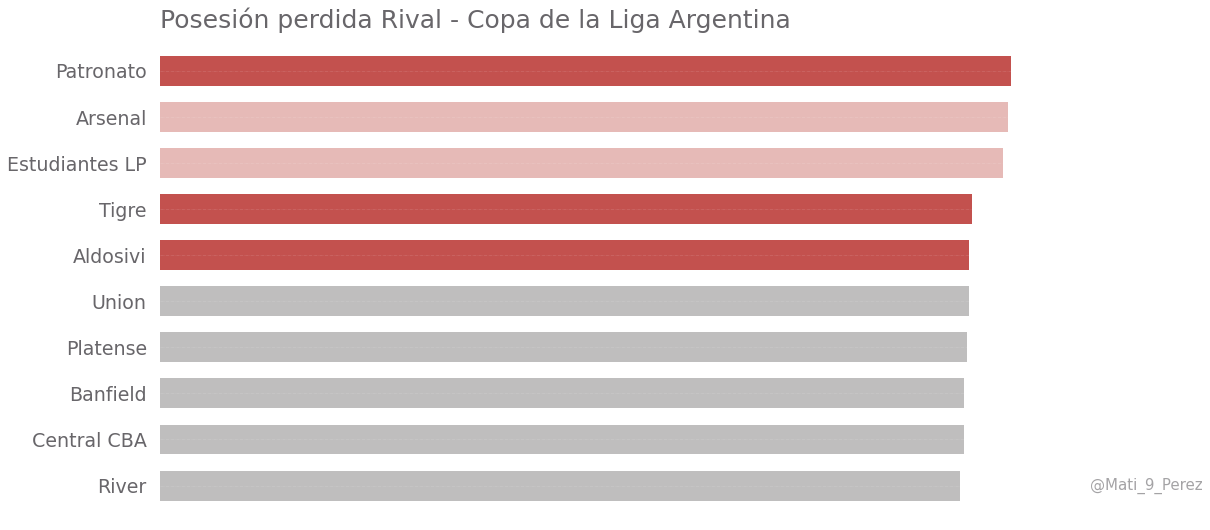

transData(0,0) = [144.  81.]


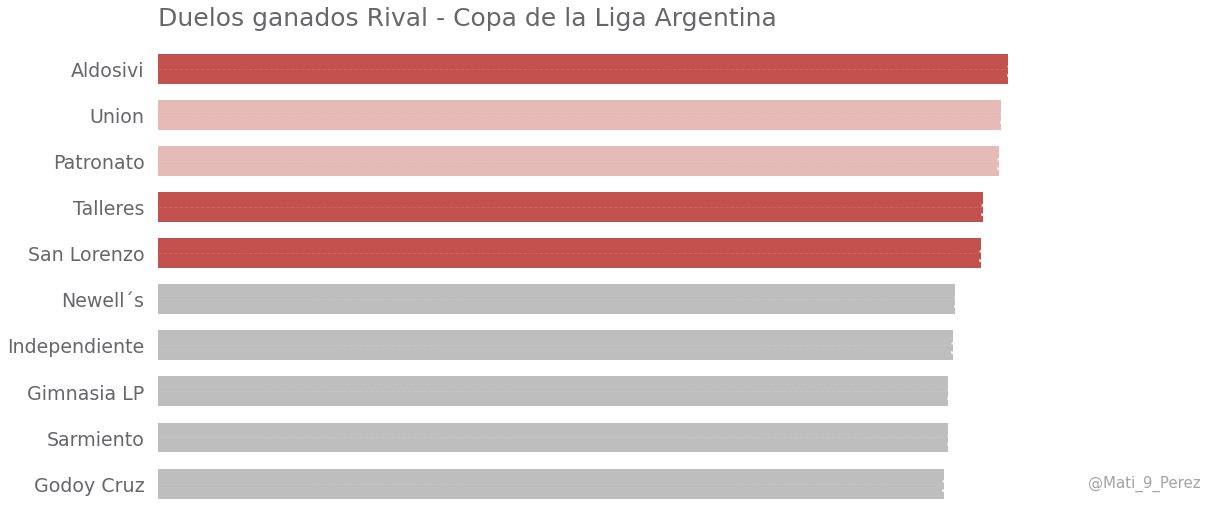

transData(0,0) = [144.  81.]


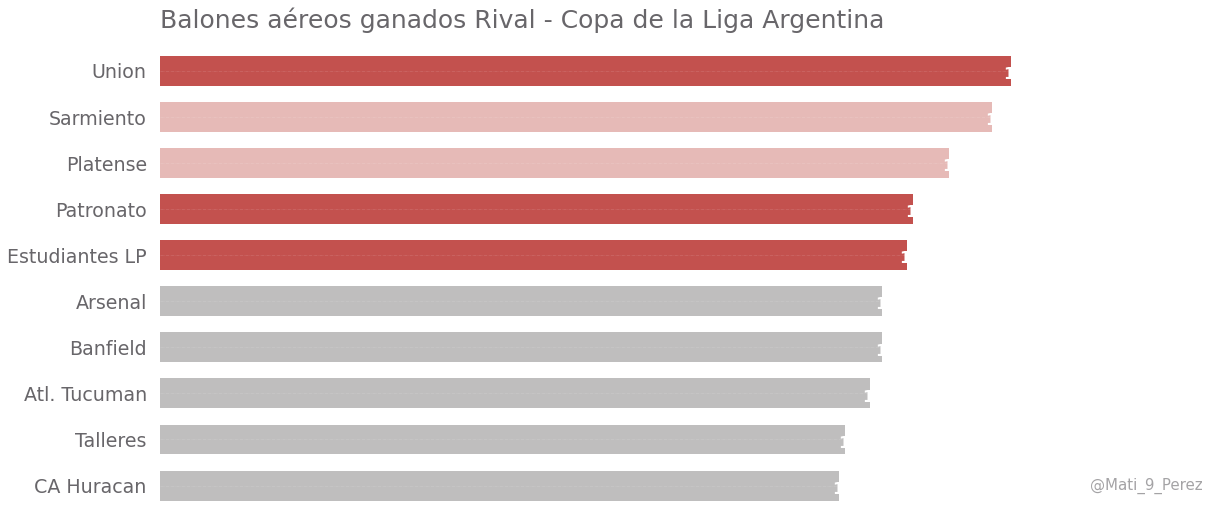

transData(0,0) = [144.  81.]


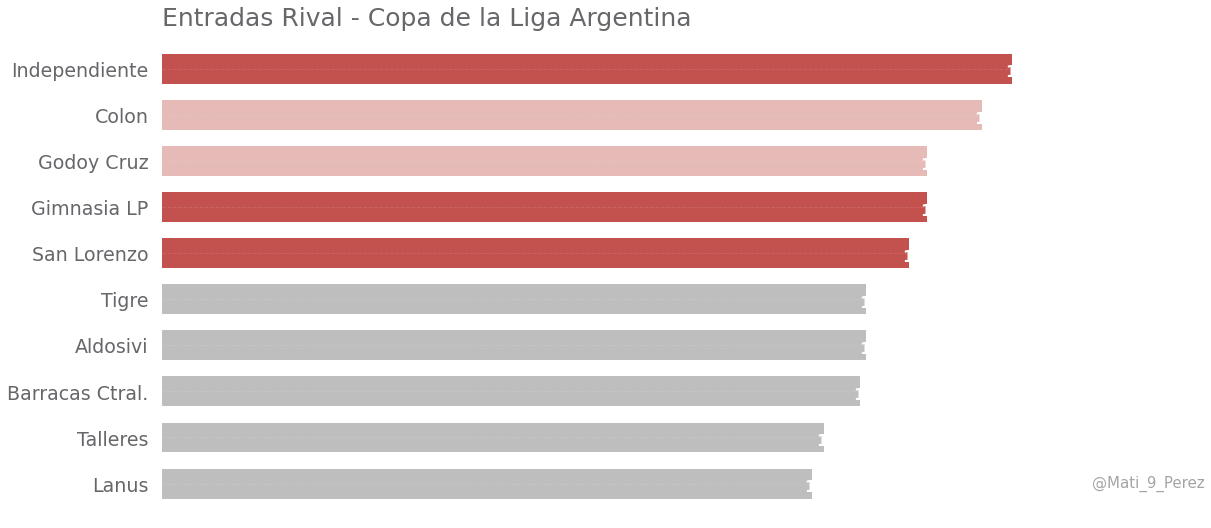

transData(0,0) = [144.  81.]


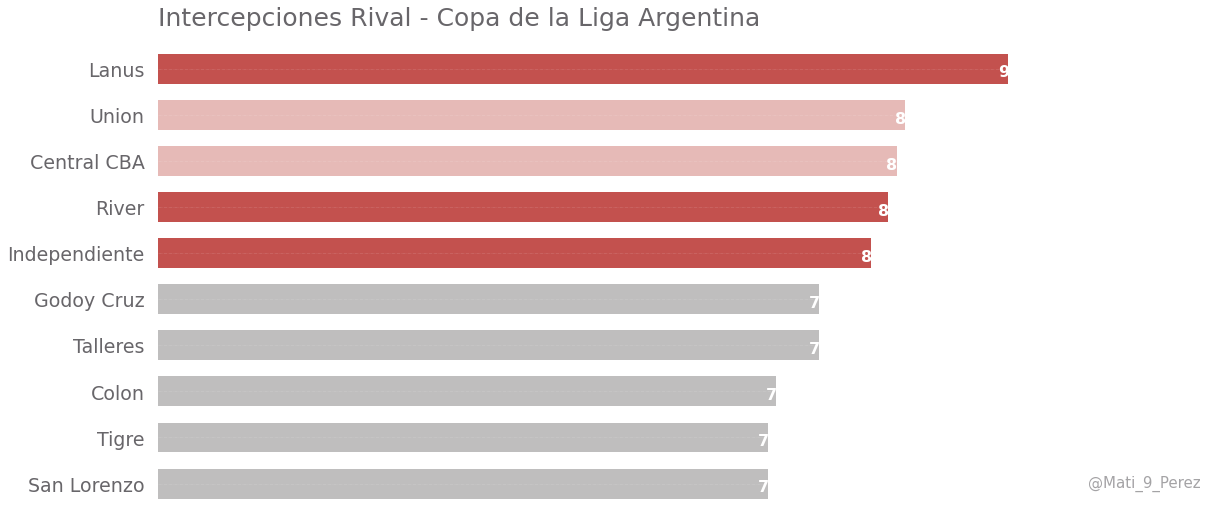

transData(0,0) = [144.  81.]


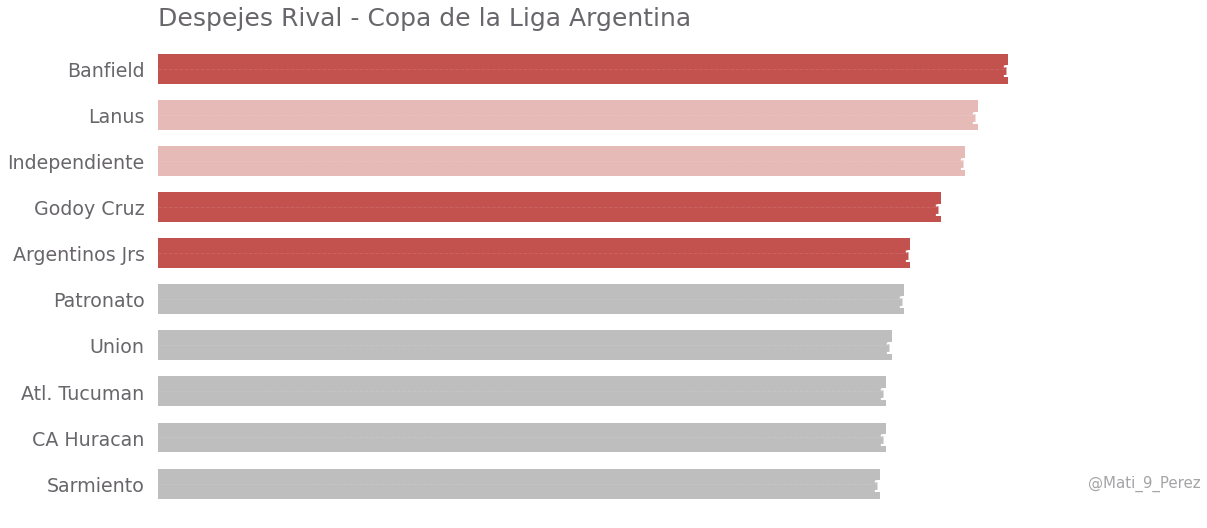

transData(0,0) = [144.  81.]


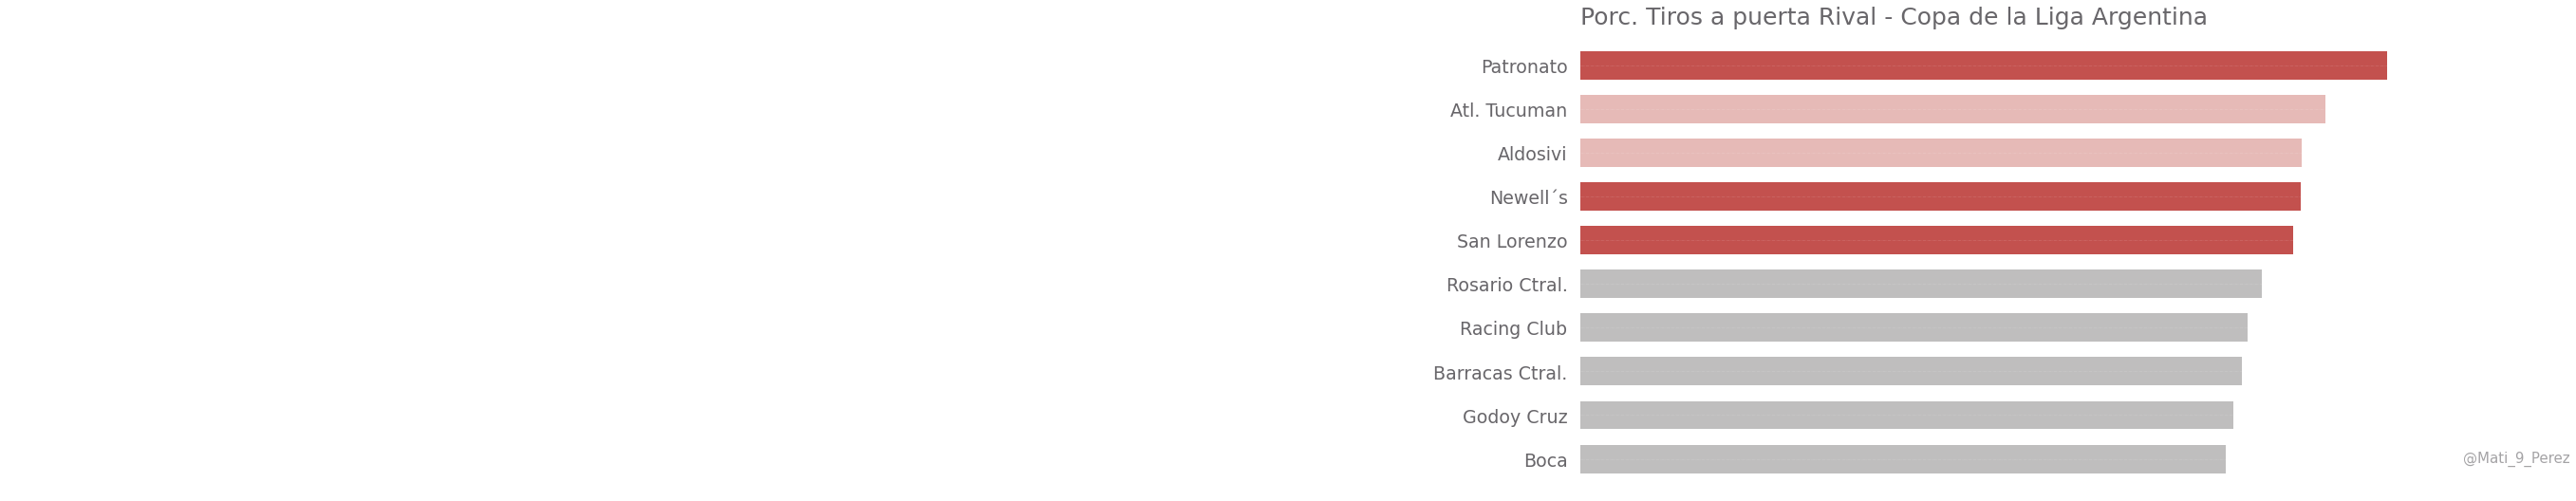

transData(0,0) = [144.  81.]


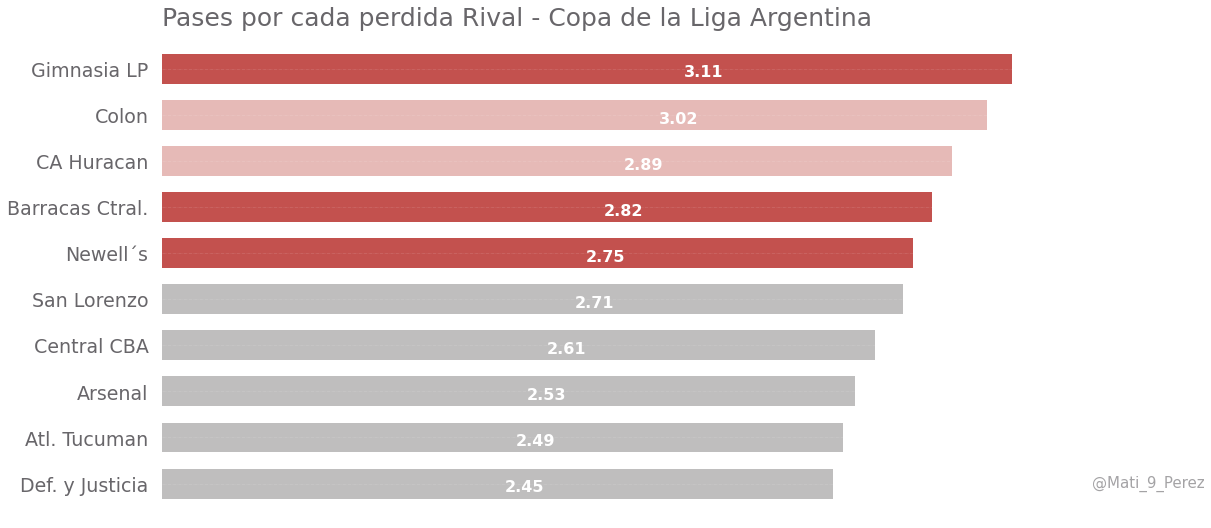

transData(0,0) = [144.  81.]


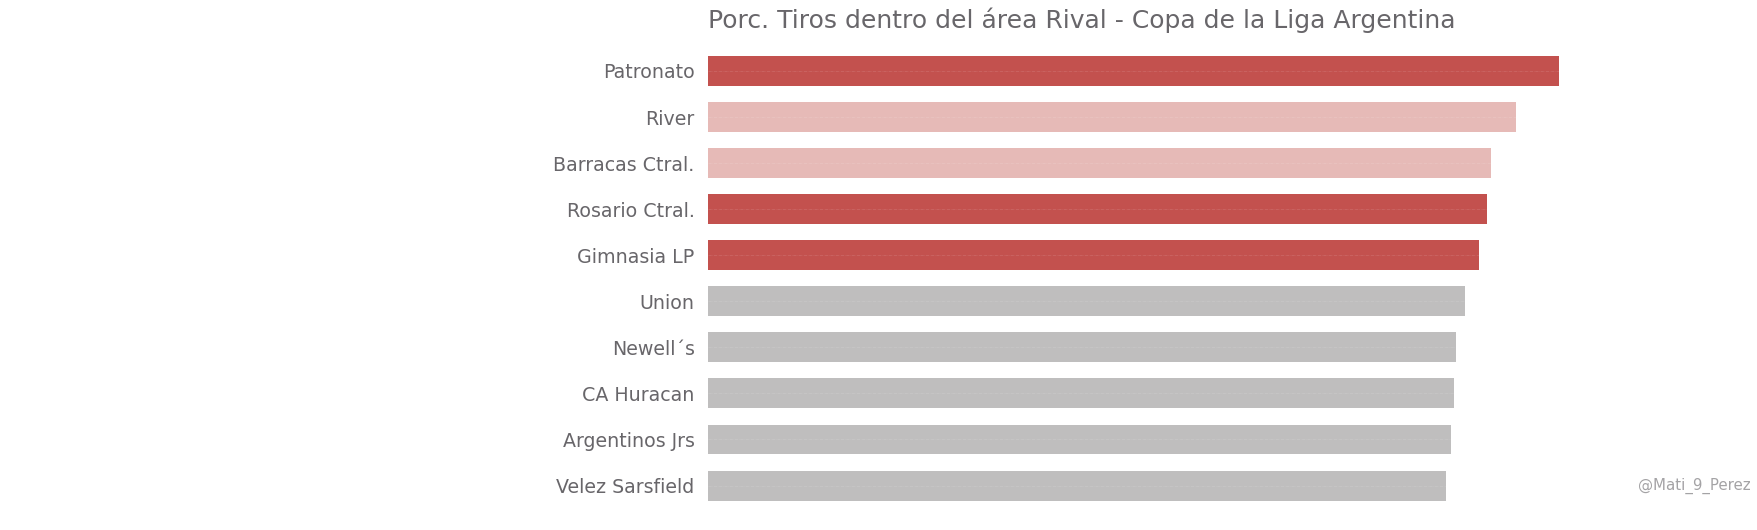

transData(0,0) = [144.  81.]


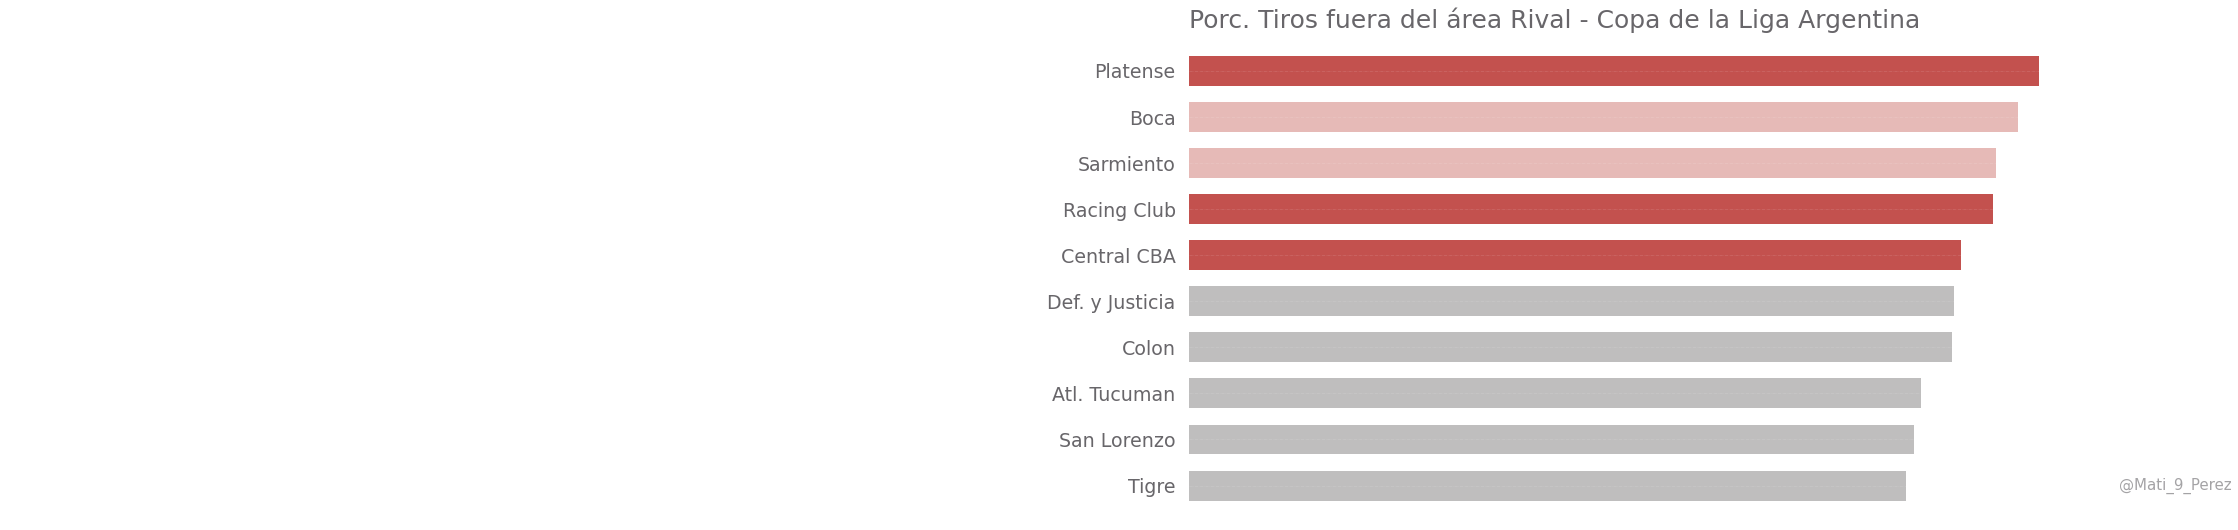

transData(0,0) = [144.  81.]


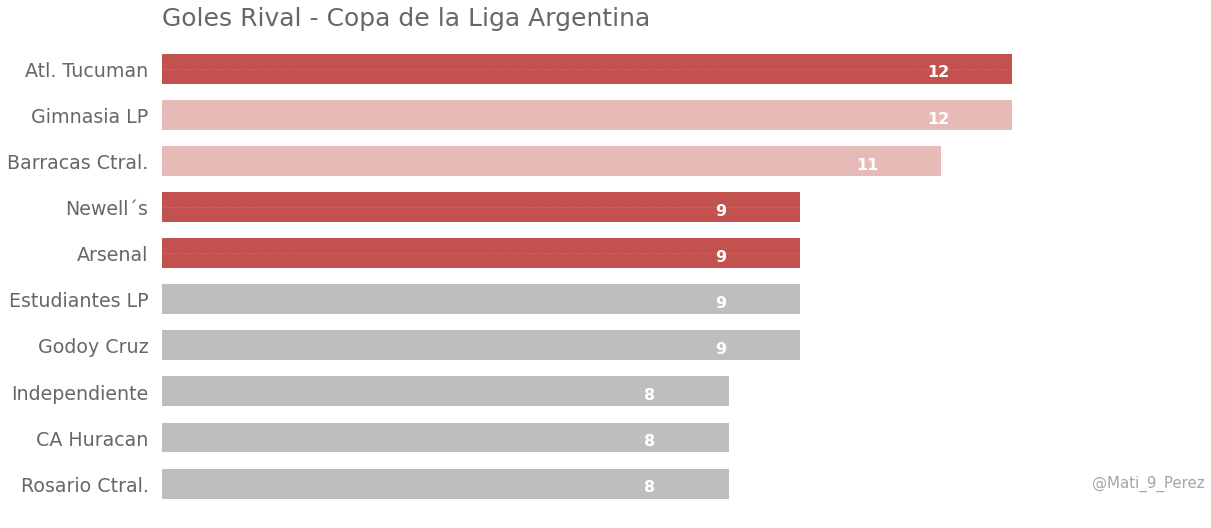

transData(0,0) = [144.  81.]


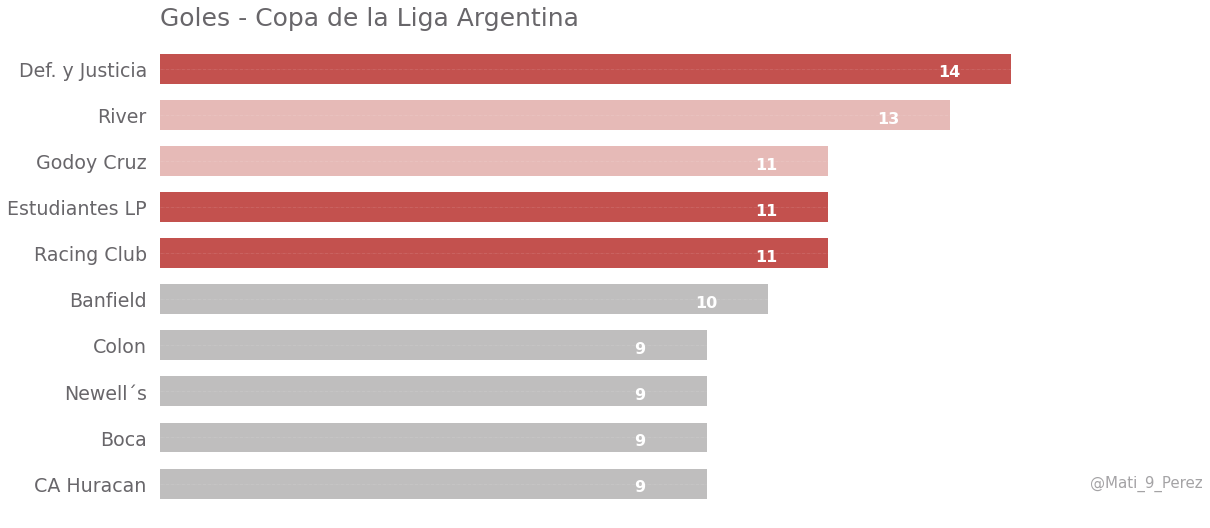

transData(0,0) = [144.  81.]


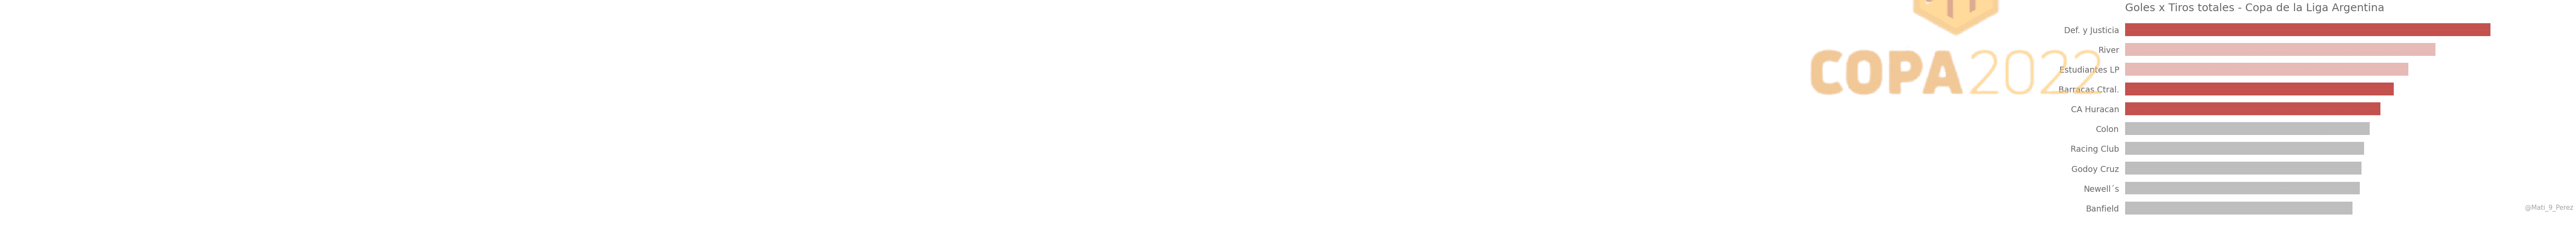

transData(0,0) = [144.  81.]


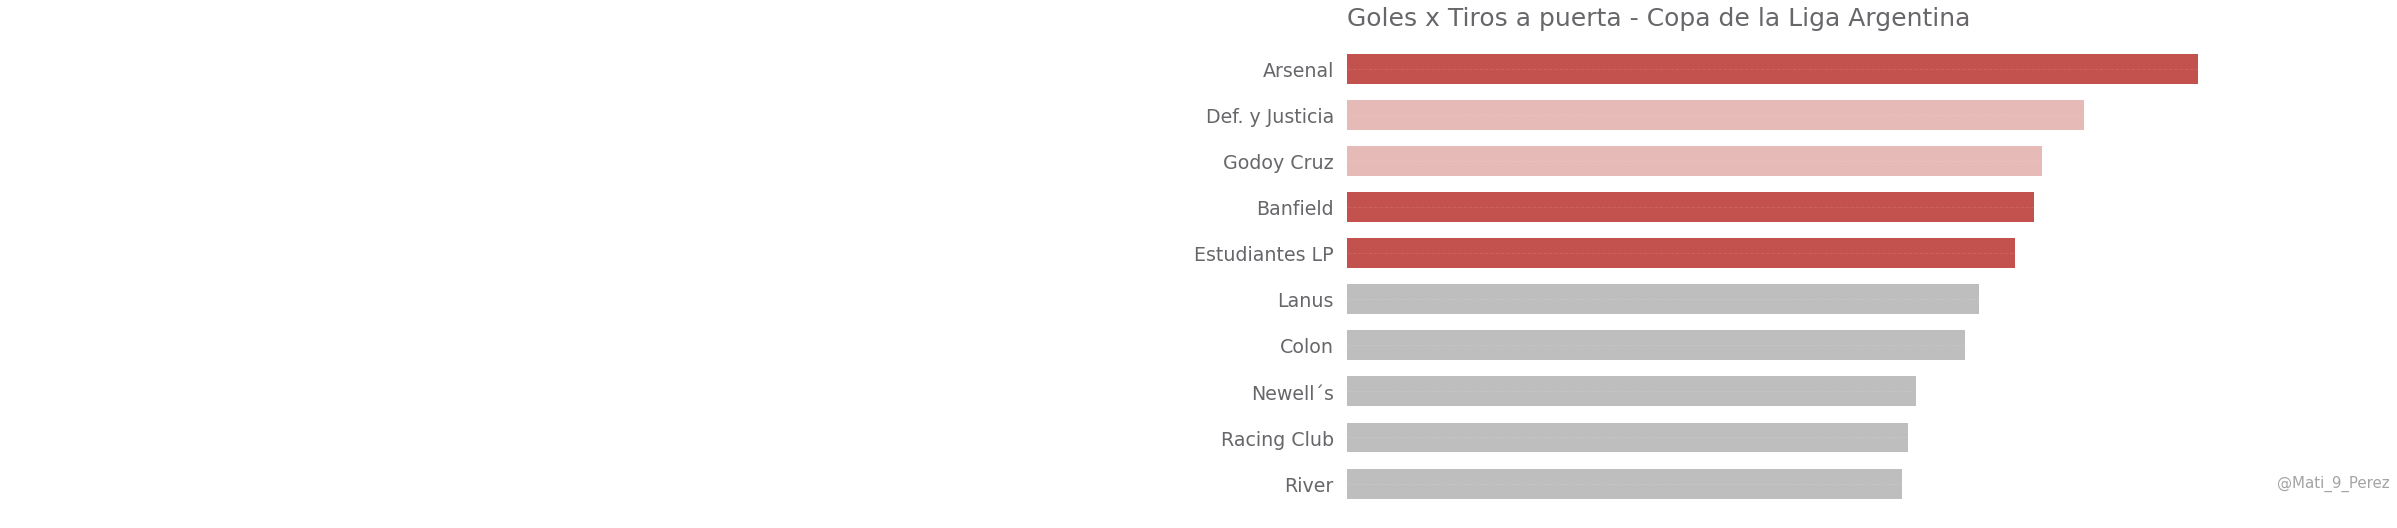

transData(0,0) = [144.  81.]


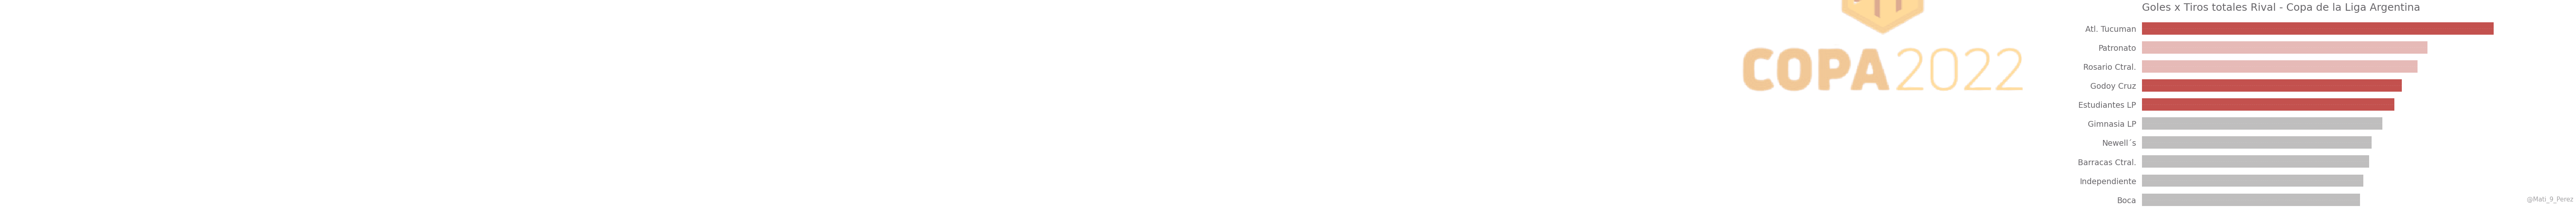

transData(0,0) = [144.  81.]


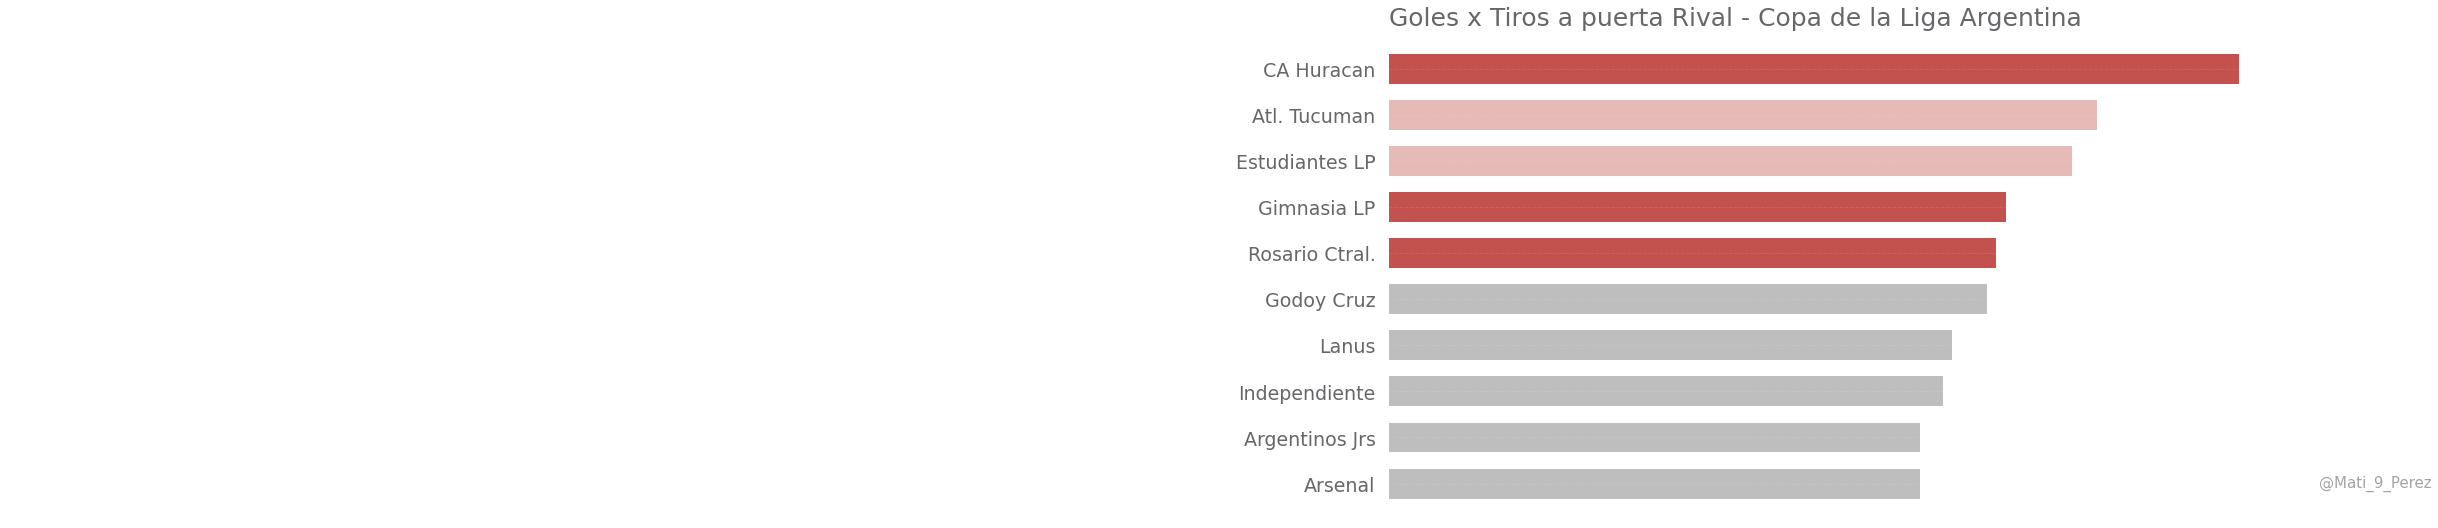

In [36]:
#Analisis de equipos TODAS LAS METRICAS
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.image as image
print(GLOBAL.columns)
listas=['Posesión perdida']
lista=['Posesión de balón', 'Tiros totales', 'Tiros a puerta', 'Tiros fuera',
       'Disparos bloqueados', 'Saques de esquina', 'Fueras de juego', 'Faltas',
       'Tarjetas amarillas', 'Tarjetas rojas', 'Ocasiones claras',
       'Ocasiones claras falladas', 'Disparos al Palo', 'Contraataques',
       'Tiros en contraataque', 'Goles en contraataque',
       'Tiros dentro del área', 'Tiros desde fuera del área', 'Paradas',
       'Pases', 'Pases totales', 'Porc. Pases efectivos',
       'Pases largos efectivos', 'Pases largos totales',
       'Porc. Pases largos efectivos', 'Centros completados',
       'Centros intentados', 'Porc. Centros completados',
       'Regates completados', 'Regates intentados', 'Porc. Regates efectivos',
       'Posesión perdida', 'Duelos ganados', 'Balones aéreos ganados',
       'Entradas', 'Intercepciones', 'Despejes']
for a in GLOBAL.columns: 
    #if a=='Pases acierte'or a=='Pases largos' or a=='Centros' or a=='Regates':
        #print('hola')
    #else:
        parametro=a
        #1equipo=GLOBAL.groupby(['equipo']).sum().sort_values(by=[parametro],ascending= False).head(10).index
        equipo=GLOBAL.sort_values(by=[parametro],ascending= False).head(10).index
        #1dato=GLOBAL.groupby(['equipo']).sum().sort_values(by=[parametro],ascending= False)[parametro].head(10)
        abscisa=equipo
        cantidad = GLOBAL.sort_values(by=[parametro],ascending= False)[parametro].head(10)
        #1if a=='Posesión de balón':
            #1cantidad = (GLOBAL.groupby(['equipo']).sum()/GLOBAL.groupby(['equipo']).count()).sort_values(by=['Posesión de balón'],ascending= False)['Posesión de balón'].head(10)
        #1else:
            #1cantidad = GLOBAL.groupby(['equipo']).sum().sort_values(by=[parametro],ascending= False)[parametro].head(10)
        #imput=input()
        #beto=imput+".png"
        
        def scale(im, nR, nC):
            """
            parameters
            im :image
            nR:row size
            nC:column size 
            Return: scaled image 
            """
            number_rows = len(im)     # source number of rows 
            number_columns = len(im[0])  # source number of columns 
            return [[ im[int(number_rows * r / nR)][int(number_columns * c / nC)]  
                         for c in range(nC)] for r in range(nR)]
        def watermark(ax,x0,y0):
            """
            adds image logo and positions it on the plot
            ax: figure object 
            x0: adds x 
            y0: adds y 
            """
            img = plt.imread('Copita.png')
            #scale Image
            img =scale(img, 800, 800)


            print('transData(0,0) = {}'.format(ax.transData.transform((0,0))))
            ax.figure.figimage(img, x0,y0, alpha=.65, zorder=1,origin="upper")

        #name = BIGDATA.sort_values(by=['Pases acertados'],ascending= False).head(12).index 
        # Figure Size
        fig, ax = plt.subplots(figsize =(16, 9))
        watermark(ax,4150,200)
        ax.barh(abscisa, cantidad,height=0.65 ,color=['#c3514e', '#e6bab7', '#e6bab7', '#c3514e', '#c3514e','#bfbebe', '#bfbebe', '#bfbebe', '#bfbebe', '#bfbebe'])
        #c3514e rojo oscuro
        #e6bab7 rosa
        #bfbebe gris
        #8a796e gris oscuro letra
        ################fig.patch.set_facecolor('xkcd:dark')
        ######################ax.set_facecolor('xkcd:dark')
        fig.patch.set_facecolor('w')
        ax.set_facecolor('w')
        # Remove axes splines
        for s in ['top', 'bottom', 'left', 'right']:
            ax.spines[s].set_visible(False)

        # Remove x, y Ticks
        ax.xaxis.set_ticks_position('none')
        ax.yaxis.set_ticks_position('none')

        # Add padding between axes and labels
        #ax.xaxis.set_tick_params(pad = 5,colors='linen')
        #################ax.yaxis.set_tick_params(pad = 10,colors='linen',labelsize=16)
        ax.yaxis.set_tick_params(pad = 10,colors='#68666a',labelsize=19)
        ax.axes.get_xaxis().set_visible(False)

        # Add x, y gridlines
        ax.grid(b = True, color ='w',
                linestyle ='-.', linewidth = 0.5,
                alpha = 0.2)

        # Show top values
        ax.invert_yaxis()

        # Add annotation to bars
        for i in ax.patches:
            plt.text(i.get_width()-1.2, i.get_y()+0.5,
                     str(round((i.get_width()), 2)),
                     fontsize = 16,fontweight ='bold',
                     color ='w')
        #fontweight ='bold',
        #ax.tick_params(axis='x', colors='red')
        #ax.tick_params(axis='y', colors='red') 
        # Add Plot Title
        #############ax.set_title(parametro+' - Copa de la Liga Argentina',
                     ####################loc ='left', color='linen',fontsize = 25)
        ax.set_title(parametro+' - Copa de la Liga Argentina',
                     loc ='left', color='#68666a',fontsize = 25)

        # Add Text watermark
        fig.text(1.03, 0.17, '@Mati_9_Perez', fontsize = 15,
                 color ='#68666a', ha ='right', va ='bottom',
                 alpha = 0.6)

        # Show Plot
        plt.show()
        #fig.savefig('myimage.svg', format='svg', dpi=1200)
        #plt.savefig('destination_path.eps', format='eps')
        #fig.savefig(parametro+' Equipos'+' F6.png', dpi = 300,bbox_inches="tight")
        #fig.savefig('plot_name1200.png', dpi = 1200)

In [6]:
GLOBALL = GLOBAL.rename_axis('equipo').reset_index()
#for n in GLOBALL['equipo']:
for m in GLOBALL.keys():
        #print(GLOBALL.sort_values(by=m,ascending=False).head(10)[m])
    print(m)
    print(GLOBALL.sort_values(by=m,ascending=False)[m].index)
    #.loc[GLOBALL[equipo]==n].index

equipo
Int64Index([27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11,
            10,  9,  8,  7,  6,  5,  4,  3,  2,  1,  0],
           dtype='int64')
Posesión de balón
Int64Index([20,  1, 15, 21, 14, 19, 10,  6,  3, 24, 13, 27,  0, 25,  7,  8, 17,
             9, 23, 18,  4, 11, 12, 26, 22,  5, 16,  2],
           dtype='int64')
Tiros totales
Int64Index([ 8, 19, 13,  4, 25, 12, 10, 23, 21, 17, 11, 16,  6,  2,  3,  1, 20,
            14,  9, 27,  7, 26, 18, 24,  0, 22, 15,  5],
           dtype='int64')
Tiros a puerta
Int64Index([12, 23, 10, 20,  6, 19, 16, 11, 21,  1, 25,  7, 13, 14, 27,  4,  3,
             9,  8,  5, 18, 26, 17, 24,  2,  0, 15, 22],
           dtype='int64')
Tiros fuera
Int64Index([ 8, 13,  4, 25,  2, 16, 19, 10,  1, 17,  6, 21, 20, 14, 26, 12, 23,
             9, 27, 11,  3, 18, 15,  7, 22, 24,  0,  5],
           dtype='int64')
Disparos bloqueados
Int64Index([17, 19,  3,  4, 25,  2,  0, 24, 11, 12, 23, 21, 13,  8, 18, 22, 14,
            10,  9,

In [41]:
#LO MEJOR 
for m in GLOBAL.index:
    print(m)
    print(' ')
    for a in GLOBAL.keys():
        for i in range(0,5):
            if GLOBAL.sort_values(by=a,ascending=False).index[i]==m:
                print('--> '+str(i+1)+'° en '+a+' ['+str(round(GLOBAL.sort_values(by=a,ascending=False)[a].iloc[i],2))+']')
    print('---------------------Fin equipo------------------------------------')
        


Aldosivi
 
--> 3° en Contraataques [2]
--> 3° en Tiros en contraataque [2]
--> 2° en Paradas [26]
--> 3° en Pases largos totales [371]
--> 1° en Porc. Centros completados [9.25]
--> 4° en Intercepciones [69]
--> 3° en Porc. Tiros fuera del área [0.54]
--> 2° en Tiros a puerta Rival [33]
--> 5° en Tiros fuera Rival [35]
--> 2° en Saques de esquina Rival [32]
--> 2° en Fueras de juego Rival [19]
--> 1° en Tarjetas rojas Rival [3]
--> 1° en Goles en contraataque Rival [1]
--> 2° en Tiros dentro del área Rival [48]
--> 3° en Pases largos totales Rival [363]
--> 5° en Centros completados Rival [28]
--> 1° en Porc. Regates efectivos Rival [0.59]
--> 2° en Porc. Tiros a puerta Rival [0.43]
--> 4° en Porc. Tiros dentro del área Rival [0.62]
---------------------Fin equipo------------------------------------
Argentinos Jrs
 
--> 2° en Posesión de balón [62.2]
--> 4° en Ocasiones claras [11]
--> 4° en Ocasiones claras falladas [8]
--> 4° en Tiros en contraataque [2]
--> 3° en Pases totales [2417

--> 4° en Entradas Rival [104]
--> 3° en Pases por cada perdida Rival [2.86]
--> 5° en Goles Rival [8]
---------------------Fin equipo------------------------------------
Godoy Cruz
 
--> 3° en Tiros totales [75]
--> 2° en Tiros fuera [38]
--> 5° en Saques de esquina [32]
--> 2° en Tarjetas rojas [3]
--> 5° en Ocasiones claras [11]
--> 2° en Contraataques [4]
--> 2° en Tiros en contraataque [3]
--> 5° en Goles en contraataque [1]
--> 3° en Tiros dentro del área [45]
--> 5° en Pases largos efectivos [173]
--> 4° en Porc. Pases largos efectivos [0.52]
--> 1° en Centros completados [32]
--> 1° en Regates completados [62]
--> 2° en Regates intentados [109]
--> 5° en Porc. Regates efectivos [0.57]
--> 4° en Disparos al palo Rival [2]
--> 1° en Porc. Centros completados Rival [7.33]
--> 3° en Regates completados Rival [54]
--> 3° en Regates intentados Rival [100]
--> 5° en Entradas Rival [102]
--> 2° en Despejes Rival [114]
--> 4° en Goles Rival [8]
--> 2° en Goles x Tiros totales Rival [0.1

--> 4° en Paradas Rival [17]
--> 5° en Pases totales Rival [2109]
--> 4° en Pases largos efectivos Rival [164]
--> 3° en Porc. Centros completados Rival [5.63]
--> 5° en Regates completados Rival [51]
--> 2° en Regates intentados Rival [102]
---------------------Fin equipo------------------------------------
Union
 
--> 5° en Tarjetas rojas [1]
--> 5° en Paradas [17]
--> 5° en Porc. Centros completados [5.28]
--> 3° en Regates completados [59]
--> 1° en Porc. Regates efectivos [0.65]
--> 4° en Porc. Tiros dentro del área [0.64]
--> 5° en Posesión de balón Rival [56.2]
--> 3° en Fueras de juego Rival [19]
--> 4° en Pases largos totales Rival [354]
--> 4° en Duelos ganados Rival [293]
--> 1° en Balones aéreos ganados Rival [115]
--> 4° en Intercepciones Rival [72]
---------------------Fin equipo------------------------------------
Velez Sarsfield
 
--> 3° en Tarjetas rojas [2]
--> 2° en Disparos al palo [3]
--> 5° en Porc. Pases efectivos [0.79]
--> 4° en Porc. Centros completados [5.42]

In [40]:
#Lo peor
for m in GLOBAL.index:
    print(m)
    print(' ')
    for a in GLOBAL.keys():
        for i in range(23,28):
            if GLOBAL.sort_values(by=a,ascending=False).index[i]==m:
                print('--> '+str(i+1)+'° en '+a+' ['+str(round(GLOBAL.sort_values(by=a,ascending=False)[a].iloc[i],2))+']')
    print('---------------------Fin equipo------------------------------------')

Aldosivi
 
--> 25° en Tiros totales [48]
--> 26° en Tiros a puerta [13]
--> 27° en Tiros fuera [18]
--> 28° en Saques de esquina [18]
--> 27° en Ocasiones claras falladas [1]
--> 27° en Tiros dentro del área [22]
--> 28° en Centros completados [8]
--> 27° en Centros intentados [74]
--> 26° en Duelos ganados [245]
--> 26° en Balones aéreos ganados [62]
--> 26° en Porc. Tiros dentro del área [0.46]
--> 26° en Disparos bloqueados Rival [9]
--> 28° en Tarjetas amarillas Rival [7]
--> 26° en Paradas Rival [9]
--> 25° en Porc. Tiros fuera del área Rival [0.38]
--> 24° en Goles x Tiros a puerta Rival [0.21]
---------------------Fin equipo------------------------------------
Argentinos Jrs
 
--> 24° en Fueras de juego [6]
--> 25° en Tarjetas rojas [0]
--> 24° en Pases largos totales [298]
--> 24° en Balones aéreos ganados [62]
--> 24° en Despejes [66]
--> 24° en Porc. Tiros dentro del área [0.5]
--> 27° en Posesión de balón Rival [37.8]
--> 26° en Saques de esquina Rival [19]
--> 27° en Pases 

--> 25° en Posesión perdida [723]
--> 24° en Intercepciones [47]
--> 27° en Porc. Tiros dentro del área [0.43]
--> 25° en Pases largos totales Rival [299]
--> 26° en Posesión perdida Rival [715]
--> 24° en Porc. Tiros a puerta Rival [0.26]
--> 24° en Goles x Tiros a puerta [0.17]
---------------------Fin equipo------------------------------------
Godoy Cruz
 
--> 24° en Faltas [59]
--> 28° en Tarjetas amarillas [7]
--> 24° en Porc. Centros completados [3.5]
--> 25° en Balones aéreos ganados [62]
--> 28° en Despejes [47]
--> 27° en Tiros fuera Rival [18]
--> 28° en Faltas Rival [46]
--> 24° en Tiros dentro del área Rival [29]
--> 28° en Centros completados Rival [12]
---------------------Fin equipo------------------------------------
Independiente
 
--> 26° en Paradas [10]
--> 26° en Pases largos totales [280]
--> 25° en Porc. Regates efectivos [0.45]
--> 27° en Saques de esquina Rival [19]
--> 25° en Pases totales Rival [1572]
--> 25° en Pases acertados Rival [1104]
--> 25° en Porc. Pa

--> 27° en Tiros a puerta Rival [12]
--> 25° en Disparos bloqueados Rival [9]
--> 24° en Faltas Rival [60]
--> 27° en Contraataques Rival [0]
--> 26° en Tiros en contraataque Rival [0]
--> 27° en Tiros dentro del área Rival [26]
--> 25° en Tiros desde fuera del área Rival [20]
--> 26° en Balones aéreos ganados Rival [68]
--> 25° en Despejes Rival [71]
--> 27° en Goles Rival [2]
--> 24° en Goles x Tiros totales [0.05]
--> 26° en Goles x Tiros totales Rival [0.04]
--> 27° en Goles x Tiros a puerta Rival [0.17]
---------------------Fin equipo------------------------------------
Union
 
--> 24° en Posesión de balón [43.8]
--> 24° en Disparos bloqueados [11]
--> 28° en Fueras de juego [3]
--> 24° en Tarjetas amarillas [10]
--> 27° en Contraataques [0]
--> 27° en Tiros en contraataque [0]
--> 24° en Tiros desde fuera del área [19]
--> 24° en Pases totales [1568]
--> 24° en Pases acertados [1069]
--> 24° en Porc. Pases efectivos [0.68]
--> 25° en Centros completados [18]
--> 25° en Entradas [

In [10]:
#asdaa
lista=['Goles', 'Asistencias','Pases acertados', 'Porc Efectividad pases','Duelos ganados','Duelos en el suelo ganados',
 'Duelos aereos ganados', 'Tiros a puerta','Regates completados',
 'Pases clave', 'Centros completados',  'Recibió falta']
listanegativa=[ 'Fueras de juego', 'Regateado', 'Tiros fuera','Posesion perdida']
Listado=[]
ListadoN=[]
Atributos=[]
atr=[1]
for a in GLOBAL.keys():
    l=list(GLOBAL.sort_values(by=a,ascending=False).head(5).index)
    Listado=Listado+l
for a in GLOBAL.keys():
    l=list(GLOBAL.sort_values(by=a,ascending=False).head(5).index)
    ListadoN=ListadoN+l
#print(Listado)
df=pd.DataFrame(columns=['Jugador','Cantidad'])
dfN=pd.DataFrame(columns=['JugadorN','CantidadN'])
df['Jugador']=Listado
df['Cantidad']=1
dfN['JugadorN']=ListadoN
dfN['CantidadN']=-1
print(df.groupby('Jugador').sum().sort_values(by='Cantidad',ascending=False).head(20))
print(dfN.groupby('JugadorN').sum().sort_values(by='CantidadN',ascending=True).head(20))
#GLOBAL.loc[GLOBAL['Nombre']==df.groupby('Jugador').sum().sort_values(by='Cantidad',ascending=False).index[0]]
for b in range(0,5) :
    for a in GLOBAL.keys():
        l=list(GLOBAL.sort_values(by=a,ascending=False).head(5).index)
        if df.groupby('Jugador').sum().sort_values(by='Cantidad',ascending=False).index[b] in l:
            atr[0]=a
            Atributos=Atributos+atr
    print(df.groupby('Jugador').sum().sort_values(by='Cantidad',ascending=False).index[b]+' '+ str(Atributos))
    print(' ')
    Atributos=[]

                 Cantidad
Jugador                  
Def. y Justicia        26
Godoy Cruz             24
San Lorenzo            22
River                  21
Barracas Ctral.        20
Sarmiento              20
Aldosivi               19
Tigre                  19
Newell´s               19
Arsenal                18
Gimnasia LP            18
Colon                  17
Central CBA            17
Patronato              16
Racing Club            16
Argentinos Jrs         15
Banfield               15
Estudiantes LP         14
Lanus                  14
CA Huracan             13
                 CantidadN
JugadorN                  
Def. y Justicia        -26
Godoy Cruz             -24
San Lorenzo            -22
River                  -21
Sarmiento              -20
Barracas Ctral.        -20
Tigre                  -19
Newell´s               -19
Aldosivi               -19
Gimnasia LP            -18
Arsenal                -18
Colon                  -17
Central CBA            -17
Patronato              